In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import random
from IPython.display import Image
from scipy.optimize import fsolve
import timeit
import decimal
from decimal import *
import sympy as smp
import mpmath as mp
from mpmath import *
from joblib import *
from IPython.display import Image
from scipy.optimize import fsolve
from scipy.optimize import minimize
import os
import itertools

In [2]:
from platform import python_version

print(python_version())
from qutip import *

3.8.13


In [3]:
rmmind = 1000000
rmmaxd = 100000000
rmind = rmmind*10**(-9)
rmaxd = rmmaxd*10**(-9)
Vold = 4/3*np.pi*(rmaxd**3-rmind**3)
nanzahld = 176*10**(27)
p1pd = 0.005 * 10**(-24)
TP1d = Vold*nanzahld*p1pd
int(TP1d)
#Vold


def positionsnodis(number):
    sta1 = np.vstack((createbathrnodis(number),createbathth(number),createbathphi(number)))       
    return sta1

def createbathrnodis(number):
    bounArray = []
    for i in range(number):
        #r1 = np.random.uniform(rmmin*10**(-9), rmmax*10**(-9))
        rmmax =  1000000*10**(-9) #80 for newbathcorrelation
        rmmin = 100000000 *10**(-9)
        lower = (rmmin/rmmax)**3
        r2 = (random.uniform(lower,1))
        bounArray.append(rmmax*r2**(1/3))
    return bounArray

In [4]:
#MAC  ###NO DISSIPATION #####
#pos = positionsnodis(numberofspins)
#posArray = []

#fig = plt.figure(figsize=(4,4))
#ax = fig.add_subplot(111, projection='3d')
#for i in range(numberofspins):
#    rb1 = pos[0][i]
#    theta1 = pos[1][i]  
#    phi1 =  pos[2][i] 
##    rxx1 = rb1*np.sin(theta1)*np.cos(phi1)
#    ryy1 = rb1*np.sin(theta1)*np.sin(phi1)
##    rzz1 = rb1*np.cos(theta1)
#    posArray.append([rxx1,ryy1,rzz1])
#    ax.scatter(rxx1,ryy1,rzz1)
    

#posd = posArray
#posdata = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/posno.txt"
#np.savetxt(posdata , posd) 
#posdatasphere = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/posspno.txt"
#np.savetxt(posdatasphere , pos) 
#posd


In [5]:
rmmind = 10
rmmaxd = 30
rmind = rmmind*10**(-9)
rmaxd = rmmaxd*10**(-9)
Vold = 4/3*np.pi*(rmaxd**3-rmind**3)
nanzahld = 176*10**(27)
p1pd = 500 * 10**(-9)
TP1d = Vold*nanzahld*p1pd
int(TP1d)


9

In [35]:
pathUni = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/"
pathMC = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/"


#define the complex number
j = complex(0,1)

#define all the basic matrices
Is = Qobj([[1,0],[0,1]])  # NV Spin
Ib = Qobj([[1,0],[0,1]])  # C13 Spin
Ib2 = Qobj([[1,0],[0,1]]) # P1 Impurity (electron spin)

Sx = 1/np.sqrt(2) * Qobj([[0,1],[1,0]])
Sy = 1/(np.sqrt(2)*j)*Qobj([[0,1],[-1,0]])
Sz = Qobj([[0,0],[0,-1]])
Sz2 =Qobj([[0,0],[0,1]])

Ix = 1/2*Qobj([[0,1],[1,0]])
Iy = 1/(2.0*j)*Qobj([[0,1],[-1,0]])
Iz = 1/2.0 * Qobj([[1,0],[0,-1]])

# Define pauli matrices
sigx = Qobj([[0,1],[1,0]])
sigy = Qobj([[0,-j],[j,0]])
target3 = Qobj([[1/2,0,0,1/2],[0,0,0,0],[0,0,0,0],[1/2,0,0,1/2]])
#mp.dps = 60

#p=mpmathify(2)
#position of the C13
def r(r,th,phi):
    r = [r*np.sin(th)*np.cos(phi),r*np.sin(th)*np.sin(phi),r*np.cos(th)]
    r0 = np.array(r)
    return r0
#rxx

In [7]:
#define summation
def summ(s1,e1):
    for uu in range(len(s1)):
        for ii in range(4):
            if np.real(s1[uu][ii])>=0:
                s1[uu][ii] = s1[uu][ii]+e1
            elif np.real(s1[uu][ii]) <0:
                s1[uu][ii] = s1[uu][ii]-e1
    return s1

#GEOMETRY OF THE SYSTEM



#Calculate Spin Bath
numberofspins = 9 #number of results for the action
#rb = np.linspace(0,numberofspins-1,numberofspins)
#rxx = np.linspace(0,numberofspins-1,numberofspins)
#ryy = np.linspace(0,numberofspins-1,numberofspins)
#rzz = np.linspace(0,numberofspins-1,numberofspins)
#dis = np.linspace(0,numberofspins-1,numberofspins)
#theta = np.linspace(0,numberofspins-1,numberofspins)
#phi = np.linspace(0,numberofspins-1,numberofspins)

def createbathr(number):
    bounArray = []
    for i in range(number):
        #r1 = np.random.uniform(rmmin*10**(-9), rmmax*10**(-9))
        rmmax = 30*10**(-9) #80 for newbathcorrelation
        rmmin = 13 *10**(-9)
        lower = (rmmin/rmmax)**3
        r2 = (random.uniform(lower,1))
        bounArray.append(rmmax*r2**(1/3))
    return bounArray


def createbathth(number):
    bounArray = []
    for i in range(number):
        th1 = (random.uniform(0,np.pi))
        bounArray.append(th1)
    return bounArray

def createbathphi(number):
    bounArray = []
    for i in range(number):
        phi1 = (random.uniform(0,2*np.pi))
        bounArray.append(phi1)
    return bounArray

# Contains the positions of all bath spins
def positions(number):
    sta1 = np.vstack((createbathr(number),createbathth(number),createbathphi(number)))       
    return sta1

#infinite Temperature state
def bathstate(number):
    return random.choices([-1/2,1/2], k=number) #Adjust to finite temperature

def p1state(number,test,test2):
    if test =='yes':
        stateNit = random.choices([1,0,-1], k=number)
        elstate = random.choices([114*10**(6),86*10**(6),86*10**(6),86*10**(6)],k=number)
    else:
        stateNit = random.choices([0,0,0], k=number)
        elstate = random.choices([0,0,0,0],k=number)
    if test2 == 'yes':
        flag = 1
    else:
        flag = 0
    return [stateNit,elstate,flag]

#From here on the positions of bath spins are fixed!


#Load old bath from files#########
#pos = np.loadtxt('/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/posbest.txt')

#load bath from file

pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Newbathscorr-DD-2/possp.txt') ###MAC
#p1state(numberofspins,'yes','yes')[2]

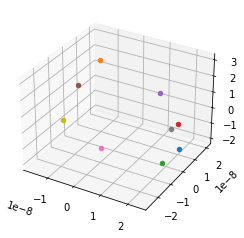

In [8]:
pathUni = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/"
pathMC = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/"
#pos = positions(numberofspins)

#pos = positions(numberofspins)
#pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Newbathscorr/possp.txt')

posArray = []
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
for i in range(numberofspins):
    rb1 = pos[0][i]
    theta1 = pos[1][i]  
    phi1 =  pos[2][i] 
    rxx1 = rb1*np.sin(theta1)*np.cos(phi1)
    ryy1 = rb1*np.sin(theta1)*np.sin(phi1)
    rzz1 = rb1*np.cos(theta1)
    posArray.append([rxx1,ryy1,rzz1])
    ax.scatter(rxx1,ryy1,rzz1)
    

#MAC    
posd = posArray
posdata = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/pos.txt"
np.savetxt(posdata , posd) 
posdatasphere = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/possp.txt"
np.savetxt(posdatasphere , pos) 
posd


#UNI    
#posd = posArray
#posdata = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/pos.txt"
#np.savetxt(posdata , posd) 
#posdatasphere = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/possp.txt"
#np.savetxt(posdatasphere , pos) 





plt.show()

In [9]:
#Initialization

In [10]:
#initialize different stages of the CCE!

def initialize(CCE):
    global sigx2,sigy2,Szf,Syf,Sxf,Sz12,Sz2f,I1x,I1y,I1z,IPx,IPy,IPz,int1xx,int1xy,int1xz,int1yx,int1yy,int1yz,int1zx,int1zy,int1zz,IPx2,IPy2,IPz2
    global intpcxx,intpcxy,intpcxz,intpcyx,intpcyy,intpcyz,intpczx,intpczy,intpczz
    global intnpxx,intnpxy,intnpxz,intnpyx,intnpyy,intnpyz,intnpzx,intnpzy,intnpzz
    global intnp2xx,intnp2xy,intnp2xz,intnp2yx,intnp2yy,intnp2yz,intnp2zx,intnp2zy,intnp2zz
    global intppxx,intppxy,intppxz,intppyx,intppyy,intppyz,intppzx,intppzy,intppzz
    global intp2cxx,intp2cxy,intp2cxz,intp2cyx,intp2cyy,intp2cyz,intp2czx,intp2czy,intp2czz
    if CCE == 2:
        sigx2 = tensor(sigx,tensor(tensor(Ib,Ib),Ib)) 
        sigy2 = tensor(sigy,tensor(tensor(Ib,Ib),Ib))
        Szf = tensor(tensor(tensor(Sz,Ib),Ib),Ib)
        Syf = tensor(tensor(tensor(Sy,Ib),Ib),Ib)
        Sxf = tensor(tensor(tensor(Sx,Ib),Ib),Ib)
        Szf.dims = [[16],[16]]
        Syf.dims = [[16],[16]]
        Sxf.dims = [[16],[16]]
        Sz12 = tensor(tensor(tensor(Sz,Ib),Ib),Ib)
        Sz12.dims = [[16],[16]]
        Sz2f = tensor(tensor(tensor(Sz2,Ib),Ib),Ib)
        Sz2f.dims = [[16],[16]]            
        I1x = tensor(tensor(tensor(Is,Ix),Ib),Ib)
        I1y = tensor(tensor(tensor(Is,Iy),Ib),Ib)
        I1z = tensor(tensor(tensor(Is,Iz),Ib),Ib)
        I1x.dims = [[16],[16]]
        I1y.dims = [[16],[16]]
        I1z.dims = [[16],[16]]                    
        IPx = tensor(tensor(tensor(Is,Ib),Ix),Ib)
        IPy = tensor(tensor(tensor(Is,Ib),Iy),Ib)
        IPz = tensor(tensor(tensor(Is,Ib),Iz),Ib)
        IPx.dims = [[16],[16]]
        IPy.dims = [[16],[16]]
        IPz.dims = [[16],[16]]
        IPx2 = tensor(tensor(tensor(Is,Ib),Ib),Ix)
        IPy2 = tensor(tensor(tensor(Is,Ib),Ib),Iy)
        IPz2 = tensor(tensor(tensor(Is,Ib),Ib),Iz)
        IPx2.dims = [[16],[16]]
        IPy2.dims = [[16],[16]]
        IPz2.dims = [[16],[16]]
        #Interaction C13 with NV-Center
        int1xx = tensor(tensor(tensor(Sx,Ix),Ib),Ib)
        int1xy = tensor(tensor(tensor(Sx,Iy),Ib),Ib)
        int1xz = tensor(tensor(tensor(Sx,Iz),Ib),Ib)
        int1yx = tensor(tensor(tensor(Sy,Ix),Ib),Ib)
        int1yy = tensor(tensor(tensor(Sy,Iy),Ib),Ib)
        int1yz = tensor(tensor(tensor(Sy,Iz),Ib),Ib)
        int1zx = tensor(tensor(tensor(Sz,Ix),Ib),Ib)
        int1zy = tensor(tensor(tensor(Sz,Iy),Ib),Ib)
        int1zz = tensor(tensor(tensor(Sz,Iz),Ib),Ib)
        int1xx.dims = [[16],[16]]
        int1xy.dims = [[16],[16]]
        int1xz.dims = [[16],[16]]
        int1yx.dims = [[16],[16]]
        int1yy.dims = [[16],[16]]
        int1yz.dims = [[16],[16]]
        int1zx.dims = [[16],[16]]
        int1zy.dims = [[16],[16]]
        int1zz.dims = [[16],[16]]
        #Interaction P1-Impurtiy with C13 
        intpcxx = tensor(tensor(Is,tensor(Ix,Ix)),Ib)
        intpcxy = tensor(tensor(Is,tensor(Ix,Iy)),Ib)
        intpcxz = tensor(tensor(Is,tensor(Ix,Iz)),Ib)
        intpcyx = tensor(tensor(Is,tensor(Iy,Ix)),Ib)
        intpcyy = tensor(tensor(Is,tensor(Iy,Iy)),Ib)
        intpcyz = tensor(tensor(Is,tensor(Iy,Iz)),Ib)
        intpczx = tensor(tensor(Is,tensor(Iz,Ix)),Ib)
        intpczy = tensor(tensor(Is,tensor(Iz,Iy)),Ib)
        intpczz = tensor(tensor(Is,tensor(Iz,Iz)),Ib)
        intpcxx.dims = [[16],[16]]
        intpcxy.dims = [[16],[16]]
        intpcxz.dims = [[16],[16]]
        intpcyx.dims = [[16],[16]]
        intpcyy.dims = [[16],[16]]
        intpcyz.dims = [[16],[16]]
        intpczx.dims = [[16],[16]]
        intpczy.dims = [[16],[16]]
        intpczz.dims = [[16],[16]]
        #Interaction first P1-Impurity with NV-Center
        intnpxx = tensor(tensor(tensor(Sx,Ib),Ix),Ib)
        intnpxy = tensor(tensor(tensor(Sx,Ib),Iy),Ib)
        intnpxz = tensor(tensor(tensor(Sx,Ib),Iz),Ib)
        intnpyx = tensor(tensor(tensor(Sy,Ib),Ix),Ib)
        intnpyy = tensor(tensor(tensor(Sy,Ib),Iy),Ib)
        intnpyz = tensor(tensor(tensor(Sy,Ib),Iz),Ib)
        intnpzx = tensor(tensor(tensor(Sz,Ib),Ix),Ib)
        intnpzy = tensor(tensor(tensor(Sz,Ib),Iy),Ib)
        intnpzz = tensor(tensor(tensor(Sz,Ib),Iz),Ib)
        intnpxx.dims = [[16],[16]]
        intnpxy.dims = [[16],[16]]
        intnpxz.dims = [[16],[16]]
        intnpyx.dims = [[16],[16]]
        intnpyy.dims = [[16],[16]]
        intnpyz.dims = [[16],[16]]
        intnpzx.dims = [[16],[16]]
        intnpzy.dims = [[16],[16]]
        intnpzz.dims = [[16],[16]] 
        #Interaction second P1-Impurity with NV-Center
        intnp2xx = tensor(tensor(tensor(Sx,Ib),Ib),Ix)
        intnp2xy = tensor(tensor(tensor(Sx,Ib),Ib),Iy)
        intnp2xz = tensor(tensor(tensor(Sx,Ib),Ib),Iz)
        intnp2yx = tensor(tensor(tensor(Sy,Ib),Ib),Ix)
        intnp2yy = tensor(tensor(tensor(Sy,Ib),Ib),Iy)
        intnp2yz = tensor(tensor(tensor(Sy,Ib),Ib),Iz)
        intnp2zx = tensor(tensor(tensor(Sz,Ib),Ib),Ix)
        intnp2zy = tensor(tensor(tensor(Sz,Ib),Ib),Iy)
        intnp2zz = tensor(tensor(tensor(Sz,Ib),Ib),Iz)
        intnp2xx.dims = [[16],[16]]
        intnp2xy.dims = [[16],[16]]
        intnp2xz.dims = [[16],[16]]
        intnp2yx.dims = [[16],[16]]
        intnp2yy.dims = [[16],[16]]
        intnp2yz.dims = [[16],[16]]
        intnp2zx.dims = [[16],[16]]
        intnp2zy.dims = [[16],[16]]
        intnp2zz.dims = [[16],[16]] 
        #Interaction second P1-Impurity with C13
        intp2cxx = tensor(tensor(Is,tensor(Ix,Ib)),Ix)
        intp2cxy = tensor(tensor(Is,tensor(Ix,Ib)),Iy)
        intp2cxz = tensor(tensor(Is,tensor(Ix,Ib)),Iz)
        intp2cyx = tensor(tensor(Is,tensor(Iy,Ib)),Ix)
        intp2cyy = tensor(tensor(Is,tensor(Iy,Ib)),Iy)
        intp2cyz = tensor(tensor(Is,tensor(Iy,Ib)),Iz)
        intp2czx = tensor(tensor(Is,tensor(Iz,Ib)),Ix)
        intp2czy = tensor(tensor(Is,tensor(Iz,Ib)),Iy)
        intp2czz = tensor(tensor(Is,tensor(Iz,Ib)),Iz)
        intp2cxx.dims = [[16],[16]]
        intp2cxy.dims = [[16],[16]]
        intp2cxz.dims = [[16],[16]]
        intp2cyx.dims = [[16],[16]]
        intp2cyy.dims = [[16],[16]]
        intp2cyz.dims = [[16],[16]]
        intp2czx.dims = [[16],[16]]
        intp2czy.dims = [[16],[16]]
        intp2czz.dims = [[16],[16]]
        #Interaction second P1-Impurity with first P1-Impurity
        intppxx = tensor(tensor(Is,tensor(Ib,Ix)),Ix)
        intppxy = tensor(tensor(Is,tensor(Ib,Ix)),Iy)
        intppxz = tensor(tensor(Is,tensor(Ib,Ix)),Iz)
        intppyx = tensor(tensor(Is,tensor(Ib,Iy)),Ix)
        intppyy = tensor(tensor(Is,tensor(Ib,Iy)),Iy)
        intppyz = tensor(tensor(Is,tensor(Ib,Iy)),Iz)
        intppzx = tensor(tensor(Is,tensor(Ib,Iz)),Ix)
        intppzy = tensor(tensor(Is,tensor(Ib,Iz)),Iy)
        intppzz = tensor(tensor(Is,tensor(Ib,Iz)),Iz)
        intppxx.dims = [[16],[16]]
        intppxy.dims = [[16],[16]]
        intppxz.dims = [[16],[16]]
        intppyx.dims = [[16],[16]]
        intppyy.dims = [[16],[16]]
        intppyz.dims = [[16],[16]]
        intppzx.dims = [[16],[16]]
        intppzy.dims = [[16],[16]]
        intppzz.dims = [[16],[16]]        
    elif CCE == 1:     
        sigx2 = tensor(sigx,tensor(Ib,Ib)) 
        sigy2 = tensor(sigy,tensor(Ib,Ib))
        Szf = tensor(tensor(Sz,Ib),Ib)
        Syf = tensor(tensor(Sy,Ib),Ib)
        Sxf = tensor(tensor(Sx,Ib),Ib)
        Szf.dims = [[8],[8]]
        Syf.dims = [[8],[8]]
        Sxf.dims = [[8],[8]]
        Sz12 = tensor(tensor(Sz,Ib),Ib)
        Sz12.dims = [[8],[8]]
        Sz2f = tensor(tensor(Sz2,Ib),Ib)
        Sz2f.dims = [[8],[8]]            
        I1x = tensor(tensor(Is,Ix),Ib)
        I1y = tensor(tensor(Is,Iy),Ib)
        I1z = tensor(tensor(Is,Iz),Ib)
        I1x.dims = [[8],[8]]
        I1y.dims = [[8],[8]]
        I1z.dims = [[8],[8]]                    
        IPx = tensor(tensor(Is,Ib),Ix)
        IPy = tensor(tensor(Is,Ib),Iy)
        IPz = tensor(tensor(Is,Ib),Iz)
        IPx.dims = [[8],[8]]
        IPy.dims = [[8],[8]]
        IPz.dims = [[8],[8]]
        #Interaction C13 with NV-Center
        int1xx = tensor(tensor(Sx,Ix),Ib)
        int1xy = tensor(tensor(Sx,Iy),Ib)
        int1xz = tensor(tensor(Sx,Iz),Ib)
        int1yx = tensor(tensor(Sy,Ix),Ib)
        int1yy = tensor(tensor(Sy,Iy),Ib)
        int1yz = tensor(tensor(Sy,Iz),Ib)
        int1zx = tensor(tensor(Sz,Ix),Ib)
        int1zy = tensor(tensor(Sz,Iy),Ib)
        int1zz = tensor(tensor(Sz,Iz),Ib)
        int1xx.dims = [[8],[8]]
        int1xy.dims = [[8],[8]]
        int1xz.dims = [[8],[8]]
        int1yx.dims = [[8],[8]]
        int1yy.dims = [[8],[8]]
        int1yz.dims = [[8],[8]]
        int1zx.dims = [[8],[8]]
        int1zy.dims = [[8],[8]]
        int1zz.dims = [[8],[8]]
        #Interaction P1-Impurtiy with C13 
        intpcxx = tensor(Is,tensor(Ix,Ix))
        intpcxy = tensor(Is,tensor(Ix,Iy))
        intpcxz = tensor(Is,tensor(Ix,Iz))
        intpcyx = tensor(Is,tensor(Iy,Ix))
        intpcyy = tensor(Is,tensor(Iy,Iy))
        intpcyz = tensor(Is,tensor(Iy,Iz))
        intpczx = tensor(Is,tensor(Iz,Ix))
        intpczy = tensor(Is,tensor(Iz,Iy))
        intpczz = tensor(Is,tensor(Iz,Iz))
        intpcxx.dims = [[8],[8]]
        intpcxy.dims = [[8],[8]]
        intpcxz.dims = [[8],[8]]
        intpcyx.dims = [[8],[8]]
        intpcyy.dims = [[8],[8]]
        intpcyz.dims = [[8],[8]]
        intpczx.dims = [[8],[8]]
        intpczy.dims = [[8],[8]]
        intpczz.dims = [[8],[8]]
        #Interaction P1-Impurity with NV-Center
        intnpxx = tensor(tensor(Sx,Ib),Ix)
        intnpxy = tensor(tensor(Sx,Ib),Iy)
        intnpxz = tensor(tensor(Sx,Ib),Iz)
        intnpyx = tensor(tensor(Sy,Ib),Ix)
        intnpyy = tensor(tensor(Sy,Ib),Iy)
        intnpyz = tensor(tensor(Sy,Ib),Iz)
        intnpzx = tensor(tensor(Sz,Ib),Ix)
        intnpzy = tensor(tensor(Sz,Ib),Iy)
        intnpzz = tensor(tensor(Sz,Ib),Iz)
        intnpxx.dims = [[8],[8]]
        intnpxy.dims = [[8],[8]]
        intnpxz.dims = [[8],[8]]
        intnpyx.dims = [[8],[8]]
        intnpyy.dims = [[8],[8]]
        intnpyz.dims = [[8],[8]]
        intnpzx.dims = [[8],[8]]
        intnpzy.dims = [[8],[8]]
        intnpzz.dims = [[8],[8]]        
    elif CCE == 0 :        
        sigx2 = tensor(sigx,Ib)
        sigy2 = tensor(sigy,Ib)
        Szf = tensor(Sz,Ib)
        Syf = tensor(Sy,Ib)
        Sxf = tensor(Sx,Ib)
        Sz12 = tensor(Sz,Ib)
        Sz2f = tensor(Sz2,Ib)
        Sz2f.dims = [[4],[4]]
        Szf.dims = [[4],[4]]
        Syf.dims = [[4],[4]]
        Sxf.dims = [[4],[4]]
        I1x = tensor(Is,Ix)
        I1y = tensor(Is,Iy)
        I1z = tensor(Is,Iz)
        I1x.dims = [[4],[4]]
        I1y.dims = [[4],[4]]
        I1z.dims = [[4],[4]]
        #Interaction C13 with NV-Center
        int1xx = tensor(Sx,Ix)
        int1xy = tensor(Sx,Iy)
        int1xz = tensor(Sx,Iz)
        int1yx = tensor(Sy,Ix)
        int1yy = tensor(Sy,Iy)
        int1yz = tensor(Sy,Iz)
        int1zx = tensor(Sz,Ix)
        int1zy = tensor(Sz,Iy)
        int1zz = tensor(Sz,Iz)  
        int1xx.dims = [[4],[4]]
        int1xy.dims = [[4],[4]]
        int1xz.dims = [[4],[4]]
        int1yx.dims = [[4],[4]]
        int1yy.dims = [[4],[4]]
        int1yz.dims = [[4],[4]]
        int1zx.dims = [[4],[4]]
        int1zy.dims = [[4],[4]]
        int1zz.dims = [[4],[4]] 
    return


In [11]:
#Parameters
##BzC2 = 400.84#
#enc = gc * BzC2
#en =Dgs- ge*Bz
#en-1.76*10**6
#enc/10**(3)

In [12]:
#Temperature of P1 Zeemann splitting##############
kb= 1.380*10**(-23)
en = ge*Bz
h*en/kb
#########################


NameError: name 'ge' is not defined

In [13]:
# Implement dipolar interaction directly
# define "ortsvector"
#define all the parameters
Dgs = 2.88 * 10**9#zero field splitting in Hz
ge = 2.803 * 10**6 # gyromagnetic ratio for electron spin (Gauss) correct??
gc = 1.071 * 10**3  #gyromagnetic ratio for nuclear spin (Gauss)
Bz = 148# In Gauss
An = 1.76*10**6 # Hyperfine to NV-Spin see Reference of Daniel Urban!
h = 6.626*10**(-34)
mu0 = 4*np.pi *10**(-7)
gye = -1.761*10**(11)
gyc = 6.728*10**(7)
t1 = 2.47003048e-06
t2 = 1.48375065e-06 #mpmathify(6225.48375065e-06)

#Temperature of P1 Zeemann splitting##############
kb= 1.380*10**(-23)
en = ge*Bz
h*2.88*10**(9)/kb
#########################



#Define position of C13 spin!
r0 = 0.8924*10**(-9)#0.8924*10**(-9)
rv1 = r(r0,1.3613,0)

# Define the "strongly coupled" - Spins!
def rv2(kl):
    r2 = pos[0][kl]
    th2 = pos[1][kl]
    phi2 = pos[2][kl]
    rv22 = r(r2,th2,phi2)
    return rv22

# Define the "strongly coupled" - Spins!
def rv2f(kl):
    r2 = pos[0][kl]
    th2 = pos[1][kl]
    phi2 = pos[2][kl]
    rv22 = r(r2,th2,phi2)
    return rv22



#"mean field" Hyperfine interaction between the NV and the P1-Bath
def Nzz_NV(number,kl,km):
    NzArray = []
    if CCE == 2:
        sh = iter(range(number))
        for i in range(number):
            if i == kl:
                next(sh) 
            elif i == km:
                next(sh)
            else:
                dis = pos[0][i]
                theta = pos[1][i]  
                phi =  pos[2][i] 
                Nzz =  (- mu0/(4*np.pi) * (gye*gye*h)/(dis)**3  * (3 * np.cos(theta)**2-1) )
                NzArray.append(Nzz)
    elif CCE == 1:
        sh =iter(range(number))
        for i in range(number):
            if i == kl:
                next(sh) 
            else:
                dis = pos[0][i]
                theta = pos[1][i]  
                phi =  pos[2][i] 
                Nzz =  (- mu0/(4*np.pi) * (gye*gye*h)/(dis)**3  * (3 * np.cos(theta)**2-1) )
                NzArray.append(Nzz)
    else:
        for i in range(number):
            dis = pos[0][i]
            theta = pos[1][i]  
            phi =  pos[2][i] 
            Nzz =  (- mu0/(4*np.pi) * (gye*gye*h)/(dis)**3  * (3 * np.cos(theta)**2-1) )
            NzArray.append(Nzz)  
    return NzArray



#"mean field" Hyperfine interaction between the C13 and the P1-Bath without the first and the second P1!
def Nzz_C13(r00,number,kl,km):
    NzC13Array = []
    if CCE == 2:
        sh = iter(range(number))
        for i in range(number):
            if i == kl:
                next(sh)
            elif i == km:
                next(sh)
            else:
                rb = pos[0][i]
                theta = pos[1][i]  
                phi =  pos[2][i] 
                rxx = rb*np.sin(theta)*np.cos(phi)
                ryy = rb*np.sin(theta)*np.sin(phi)
                rzz = rb*np.cos(theta)
                dis = np.sqrt((r00[0]-rxx)**2+(r00[1]-ryy)**2+(r00[2]-rzz)**2)
                NzzC13 =  - mu0/(4*np.pi) * (gye*gyc*h)/(dis)**3  * (3 * (1/dis)**2*(rb*np.cos(theta) - r00[2])**2-1) 
                NzC13Array.append(NzzC13)        
    elif CCE == 1:
        sh =iter(range(number))
        for i in range(number):
            if i == kl:
                next(sh)
            else:
                rb = pos[0][i]
                theta = pos[1][i]  
                phi =  pos[2][i] 
                rxx = rb*np.sin(theta)*np.cos(phi)
                ryy = rb*np.sin(theta)*np.sin(phi)
                rzz = rb*np.cos(theta)
                dis = np.sqrt((r00[0]-rxx)**2+(r00[1]-ryy)**2+(r00[2]-rzz)**2)
                NzzC13 =  - mu0/(4*np.pi) * (gye*gyc*h)/(dis)**3  * (3 * (1/dis)**2*(rb*np.cos(theta) - r00[2])**2-1) 
                NzC13Array.append(NzzC13)
    elif CCE ==0:
        for i in range(number):
            rb = pos[0][i]
            theta = pos[1][i]  
            phi =  pos[2][i] 
            rxx = rb*np.sin(theta)*np.cos(phi)
            ryy = rb*np.sin(theta)*np.sin(phi)
            rzz = rb*np.cos(theta)
            dis = np.sqrt((r00[0]-rxx)**2+(r00[1]-ryy)**2+(r00[2]-rzz)**2)
            NzzC13 =  - mu0/(4*np.pi) * (gye*gyc*h)/(dis)**3  * (3 * (1/dis)**2*(rb*np.cos(theta) - r00[2])**2-1) #CHECK ALL OF THIS! 
            NzC13Array.append(NzzC13)     
    return NzC13Array


#"mean field" Hyperfine interaction between the first P1 and the P1-Bath without the second P1
def Lzz_P1(r11,number,kl,km):  #r11 is the position of the "strongly coupled"-P1 spin
    LzP1Array = []
    sh =iter(range(number))
    if CCE == 2:
        for i in range(number):
            if i == kl:
                next(sh)
            elif i == km:
                next(sh)
            else:
                rb = pos[0][i]   
                theta = pos[1][i]  
                phi =  pos[2][i] 
                rxx = rb*np.sin(theta)*np.cos(phi)
                ryy = rb*np.sin(theta)*np.sin(phi)
                rzz = rb*np.cos(theta)
                dis = np.sqrt((r11[0]-rxx)**2+(r11[1]-ryy)**2+(r11[2]-rzz)**2)
                LzP1 =  - mu0/(4*np.pi) * (gye*gye*h)/(dis)**3  * (3 * (1/dis)**2*(rb*np.cos(theta) - r11[2])**2-1) 
                LzP1Array.append(LzP1)
    else:
        for i in range(number):
            if i == kl:
                next(sh)
            else:
                rb = pos[0][i]   
                theta = pos[1][i]  
                phi =  pos[2][i] 
                rxx = rb*np.sin(theta)*np.cos(phi)
                ryy = rb*np.sin(theta)*np.sin(phi)
                rzz = rb*np.cos(theta)
                dis = np.sqrt((r11[0]-rxx)**2+(r11[1]-ryy)**2+(r11[2]-rzz)**2)
                LzP1 =  - mu0/(4*np.pi) * (gye*gye*h)/(dis)**3  * (3 * (1/dis)**2*(rb*np.cos(theta) - r11[2])**2-1) 
                LzP1Array.append(LzP1)        
    return LzP1Array

#"mean field" Hyperfine interaction between the second P1 and the P1-Bath without the first P1
def Lzz_P2(r22,number,kl,km):  #r11 is the position of the "strongly coupled"-P1 spin
    LzP2Array = []
    sh =iter(range(number))
    for i in range(number):
        if i == kl:
            next(sh)
        elif i == km:
            next(sh)
        else:
            rb = pos[0][i]   
            theta = pos[1][i]  
            phi =  pos[2][i] 
            rxx = rb*np.sin(theta)*np.cos(phi)
            ryy = rb*np.sin(theta)*np.sin(phi)
            rzz = rb*np.cos(theta)
            dis = np.sqrt((r22[0]-rxx)**2+(r22[1]-ryy)**2+(r22[2]-rzz)**2)
            LzP2 =  - mu0/(4*np.pi) * (gye*gye*h)/(dis)**3  * (3 * (1/dis)**2*(rb*np.cos(theta) - r22[2])**2-1) 
            LzP2Array.append(LzP2)
    return LzP2Array



#Mean field interaction is ready! Start to work here!
#len(Nzz)
#Ez = bathstate(10)
#[len(Ez),len(Nzz)]
#bathint(Nzz,10,Ez[0],0,1)

In [26]:
#en

In [14]:
#Newbathint
def bathint(Nzz,number,Ez,kl,km):    
    fullint = 0
    if CCE == 2:
        NEzz = Ez.copy()
        inputList = NEzz
        givenIndices = [kl,km]          # Entering the indices list at which the items are to be deleted
        indicesList = sorted(givenIndices, reverse=True)        # Reversing Indices List
        for indx in indicesList:          # Traversing in the indices list
            if indx < len(inputList):          # checking whether the corresponding iterator index is less than the list length
                inputList.pop(indx)           # removing element by index using pop() function
        NewEzz = inputList.copy()
        for o in range(number-2):  #Nzz now only has numberofspins-2 spins!
            fullinter = fullint + Nzz[o]*NewEzz[o]  #The zeroth Ez always corresponds to the "strongly coupled spin"
            fullint = fullinter
    elif CCE == 1:
        NEzz = Ez.copy()
        inputList = NEzz
        givenIndices = [kl]          # Entering the indices list at which the items are to be deleted
        indicesList = sorted(givenIndices, reverse=True)        # Reversing Indices List
        for indx in indicesList:          # Traversing in the indices list
            if indx < len(inputList):          # checking whether the corresponding iterator index is less than the list length
                inputList.pop(indx)           # removing element by index using pop() function
        NewEzz = inputList.copy()
        for o in range(number-1):
            fullinter = fullint + Nzz[o]*NewEzz[o]  #The zeroth Ez always corresponds to the "strongly coupled spin"
            fullint = fullinter
    elif CCE == 0:
        NewEzz = Ez.copy()
        for o in range(number):
            fullinter = fullint + Nzz[o]*NewEzz[o]  #The zeroth Ez always corresponds to the "strongly coupled spin"
            fullint = fullinter
    return fullint



#Sum of hyperfine interactions depending on state of the bath acting on C13 (mean field)
def bathintC13(NzzC13,number,Ez,kl,km):   
    #global CCE
    fullint = 0
    if CCE == 2:
        NEzz = Ez.copy()
        inputList = NEzz
        givenIndices = [kl,km]          # Entering the indices list at which the items are to be deleted
        indicesList = sorted(givenIndices, reverse=True)        # Reversing Indices List
        for indx in indicesList:          # Traversing in the indices list
            if indx < len(inputList):          # checking whether the corresponding iterator index is less than the list length
                inputList.pop(indx)           # removing element by index using pop() function
        NewEzz = inputList.copy()
        for o in range(number-2):  #Nzz now only has numberofspins-2 spins!
            fullinter = fullint + NzzC13[o]*NewEzz[o]
            fullint = fullinter
    if CCE == 1:
        NEzz = Ez.copy()
        inputList = NEzz
        givenIndices = [kl]          # Entering the indices list at which the items are to be deleted
        indicesList = sorted(givenIndices, reverse=True)        # Reversing Indices List
        for indx in indicesList:          # Traversing in the indices list
            if indx < len(inputList):          # checking whether the corresponding iterator index is less than the list length
                inputList.pop(indx)           # removing element by index using pop() function
        NewEzz = inputList.copy()
        for o in range(number-1):
            fullinter = fullint + NzzC13[o]*NewEzz[o]   
            fullint = fullinter
    elif CCE == 0:
        NewEzz = Ez.copy()
        for o in range(number):
            fullinter = fullint + NzzC13[o]*NewEzz[o] 
            fullint = fullinter
    return fullint




#Sum of Hyperfine interactions depending on the state of the bath acting on the first "strongly coupled" P1 spin 
def bathintP(LzzP,number,Ez,kl,km):   # Lzzp \in {LzzP1,LzzP2} depending on strongly coupled bath spin!
    fullint = 0
    if CCE == 2:
        NEzz = Ez.copy()
        inputList = NEzz
        givenIndices = [kl,km]          # Entering the indices list at which the items are to be deleted
        indicesList = sorted(givenIndices, reverse=True)        # Reversing Indices List
        for indx in indicesList:          # Traversing in the indices list
            if indx < len(inputList):          # checking whether the corresponding iterator index is less than the list length
                inputList.pop(indx)           # removing element by index using pop() function
        NewEzz = inputList.copy()
        for o in range(number-2):
            fullinter = fullint + LzzP[o]*NewEzz[o]
            fullint = fullinter
    elif CCE == 1:
        NEzz = Ez.copy()
        inputList = NEzz
        givenIndices = [kl]          # Entering the indices list at which the items are to be deleted
        indicesList = sorted(givenIndices, reverse=True)        # Reversing Indices List
        for indx in indicesList:          # Traversing in the indices list
            if indx < len(inputList):          # checking whether the corresponding iterator index is less than the list length
                inputList.pop(indx)           # removing element by index using pop() function
        NewEzz = inputList.copy()
        for o in range(number-1):
                fullinter = fullint + LzzP[o]*NewEzz[o]   
                fullint = fullinter
    return fullint


In [15]:
#dipole interaction NV - C13
def HNVC13(r):
    rd = np.sqrt(r[0]**2+r[1]**2+r[2]**2)
    nd = r/rd
    b = - mu0/(4*np.pi) * (gye*gyc*h)/rd**3
    hnvc13d = b * (int1xx * (3*nd[0]**2 - 1) + int1yy * (3 * nd[1]**2 - 1) + int1zz *(3 * nd[2]**2 - 1))
    hnvc13of = b * 3* ((int1yx + int1xy) * nd[0] * nd[1] + (int1zx + int1xz) * nd[0] * nd[2] + (int1yz + int1zy) * nd[1] * nd[2])  
    return hnvc13d + hnvc13of

    


#NV-Hamiltonian including mean field bath and Hyperfine coupling to the N nuclear spin
def HsNV(Nzz,number, Ez,kl,km):
    HsNVc = (Dgs *2*np.pi *Sz2f +(ge * Bz *2*np.pi + An *2*np.pi + bathint(Nzz,number,Ez,kl,km) )*Szf) 
    #HsNVc = (Dgs *Sz2f +(ge * Bz + An  )*Szf)*2*np.pi 
    return HsNVc

 
#C13 Hamiltonian including mean field interaction!
def HsC13(r00,Nzz,number, Ez,kl,km):
    HsNVc = (- gc * Bz * 2 * np.pi  + bathintC13(NzzC13,number,Ez,kl,km)) * I1z  
    #HsNVc = (- gc * Bz ) * I1z * 2 * np.pi  
    return HsNVc


#dipole interaction NV - P1 (first)
def HNVP1(r11):
    rd = np.sqrt(r11[0]**2+r11[1]**2+r11[2]**2)
    nd = r11/rd
    b = - mu0/(4*np.pi) * (gye*gye*h)/rd**3
    hnvp1d = b * (intnpxx * (3*nd[0]**2 - 1) + intnpyy * (3 * nd[1]**2 - 1) + intnpzz *(3 * nd[2]**2 - 1))
    hnvp1of = b * 3* ((intnpyx + intnpxy) * nd[0] * nd[1] + (intnpzx + intnpxz) * nd[0] * nd[2] + (intnpyz + intnpzy) * nd[1] * nd[2])  
    return (hnvp1d + hnvp1of)#*2*np.pi  ##Check all the dipole interactions!


#dipole interaction NV - P1 (second)
def HNVP2(r22):
    rd = np.sqrt(r22[0]**2+r22[1]**2+r22[2]**2)
    nd = r22/rd
    b = - mu0/(4*np.pi) * (gye*gye*h)/rd**3
    hnvp1d = b * (intnp2xx * (3*nd[0]**2 - 1) + intnp2yy * (3 * nd[1]**2 - 1) + intnp2zz *(3 * nd[2]**2 - 1))
    hnvp1of = b * 3* ((intnp2yx + intnp2xy) * nd[0] * nd[1] + (intnp2zx + intnp2xz) * nd[0] * nd[2] + (intnp2yz + intnp2zy) * nd[1] * nd[2])  
    return (hnvp1d + hnvp1of)#*2*np.pi  ##Check all the dipole interactions!


#dipole interaction NV - P1 first
def HP1C13(r00,r11):
    rd = np.sqrt((r00[0]-r11[0])**2+(r00[1]-r11[1])**2+(r00[2]-r11[2])**2)
    nd = (r00-r11)/rd
    b = - mu0/(4*np.pi) * (gye*gyc*h)/rd**3
    hp1c13d = b * (intpcxx * (3*nd[0]**2 - 1) + intpcyy * (3 * nd[1]**2 - 1) + intpczz *(3 * nd[2]**2 - 1))
    hp1c13of = b * 3* ((intpcyx + intpcxy) * nd[0] * nd[1] + (intpczx + intpcxz) * nd[0] * nd[2] + (intpcyz + intpczy) * nd[1] * nd[2])  
    return (hp1c13d  + hp1c13of)#*2*np.pi ##Check all the dipole interactions!

#dipole interaction NV - P1 second
def HP2C13(r00,r22):
    rd = np.sqrt((r00[0]-r22[0])**2+(r00[1]-r22[1])**2+(r00[2]-r22[2])**2)
    nd = (r00-r22)/rd
    b = - mu0/(4*np.pi) * (gye*gyc*h)/rd**3
    hp2c13d = b * (intp2cxx * (3*nd[0]**2 - 1) + intp2cyy * (3 * nd[1]**2 - 1) + intp2czz *(3 * nd[2]**2 - 1))
    hp2c13of = b * 3* ((intp2cyx + intp2cxy) * nd[0] * nd[1] + (intp2czx + intp2cxz) * nd[0] * nd[2] + (intp2cyz + intp2czy) * nd[1] * nd[2])  
    return (hp2c13d  + hp2c13of)#*2*np.pi 


#P1 Hamiltonan with dipole interaction between "mean field" environment and "strongly coupled" - P1 spin (first)
def HP1P1(r11,LzzP1,number,Ez,kl,km,Ez2): #r11 is the position of the strongly coupled P1 spin
    n1state = Ez2[0][kl]
    n1elpos = Ez2[1][kl]
    n1bx = Ez2[2]
    Hpp11 = (ge * Bz * 2*np.pi + bathintP(LzzP1, number, Ez,kl,km)) * IPz + (n1state*n1elpos)*IPz*2*np.pi +  n1bx * 30 *10**(6) * IPx*2*np.pi
    #Hpp11 = (ge * Bz ) * IPz
    return Hpp11


#P1 Hamiltonan with dipole interaction between "mean field" environment and "strongly coupled" - P1 spin (second)
def HP2P1(r22,LzzP2,number,Ez,kl,km,Ez2): #r22 is the position of the second strongly coupled P1 spin
    n1state = Ez2[0][km]
    n1elpos = Ez2[1][km]
    n1bx = Ez2[2]
    Hpp11 = (ge * Bz *2*np.pi+ bathintP(LzzP2, number, Ez,kl,km)) * IPz2 + (n1state*n1elpos)*IPz2 *2*np.pi +  n1bx * 30 *10**(6)* IPx2*2*np.pi
    #Hpp11 = (ge * Bz ) * IPz2
    return Hpp11

#Full interaction between P2 and P1 !
def HP2P1full(r11,r22):
    rd = np.sqrt((r11[0]-r22[0])**2+(r11[1]-r22[1])**2+(r11[2]-r22[2])**2)
    nd = (r11-r22)/rd
    b = - mu0/(4*np.pi) * (gye*gye*h)/rd**3
    hp1p2d = b * (intppxx * (3*nd[0]**2 - 1) + intppyy * (3 * nd[1]**2 - 1) + intppzz *(3 * nd[2]**2 - 1))
    hp1p2of = b * 3* ((intppyx + intppxy) * nd[0] * nd[1] + (intppzx + intppxz) * nd[0] * nd[2] + (intppyz + intppzy) * nd[1] * nd[2])  
    return (hp1p2d  + hp1p2of)#*2*np.pi ##Check all the dipole interactions!


#The total Hamiltonian!
def Htot(r00,r11,r22,number, E,kl,km,E2):
    if CCE == 2:
        ht = ((HsNV(Nzz,number,E,kl,km) + HsC13(r00,NzzC13,number,E,kl,km) + HNVC13(r00) + HP1C13(r00,r11) + HP2C13(r00,r22) + HNVP1(r11) +
               HNVP2(r22) + HP1P1(r11,LzzP1,number,E,kl,km,E2) + HP2P1(r22,LzzP2,number,E,kl,km,E2)+HP2P1full(r11,r22)))#.tidyup(atol=1e-7))
        ht.dims = [[16],[16]]
    elif CCE == 1:
        ht = (HsNV(Nzz,number,E,kl,km) + HsC13(r00,NzzC13,number,E,kl,km) + HNVC13(r00) + HP1C13(r00,r11) + HNVP1(r11) + HP1P1(r11,LzzP1,number,E,kl,km,E2))#.tidyup(atol=1e-7)
        ht.dims = [[8],[8]]
    elif CCE == 0 :
        ht = (HsNV(Nzz,number,E,kl,km) + HsC13(r00,NzzC13,number,E,kl,km) + HNVC13(r00) )#.tidyup(atol=1e-7)
        ht.dims = [[4],[4]]      
    return  ht  # r00 is the vectorpostion of the C13. r11 is the position of the "strongly coupled" P1-Spin

#define driving Hamiltonian
def Hd(phi):
    H = ome1 * (np.cos(phi) * sigx2 + np.sin(phi) * sigy2)
    return H


def IntCheckLz(numberofspins,thres):
    CCE = 0
    initialize(CCE)
    checkArray = []
    finArray = []
    for l in range(numberofspins):
        LzCheck = Lzz_P1(rv2(l),numberofspins,l,m+l)
        for i in range(numberofspins-1):
            if np.abs(LzCheck[i]) > thres : 
                checkArray.append(np.abs(LzCheck[i])) 
    li = sorted(checkArray)
    lii = len(li)
    #for i in range(0,lii,2):
     #    finArray.append(li[i])
    return list(set(li)) #finArray  

initialize(0)
r0 = 0.8924*10**(-9)
rv1 = r(r0,1.3613,0)
HNVC13(rv1)/np.pi

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[      0.               0.           75864.50068157  356814.72689752]
 [      0.               0.          108184.90724916  -75864.50068157]
 [  75864.50068157  108184.90724916  152996.56307583 -107288.60576654]
 [ 356814.72689752  -75864.50068157 -107288.60576654 -152996.56307583]]

In [29]:
#%%time
#to = 1*10**(-6)
#diag = HP1(Bz).eigenstates()
#en = diag[0]
#st = diag[1]

#Unun = (np.exp(-j*en[0]*to)*st[0]*st[0].dag() + np.exp(-j*en[1]*to)*st[1]*st[1].dag()
#    + np.exp(-j*en[2]*to)*st[2]*st[2].dag() +np.exp(-j*en[3]*to)*st[3]*st[3].dag() 
#       +np.exp(-j*en[4]*to)*st[4]*st[4].dag() +np.exp(-j*en[5]*to)*st[5]*st[5].dag())

#Unit = Qobj(Unun)

#np.exp(-i*en[0]*to)
#Unun#-Unun2

In [71]:
#%%time
#Unun2 = (-j*HP1(Bz)*to).expm()
#Unun2

In [16]:
#Test for true P1-center Hamiltionian


IxN = 1/np.sqrt(2)*Qobj([[0,1,0],[1,0,1],[0,1,0]])
IyN = 1/(np.sqrt(2)*j)*Qobj([[0,1,0],[-1,0,1],[0,-1,0]])
IzN = Qobj([[1,0,0],[0,0,0],[0,0,1]])

IbN = Qobj([[1,0,0],[0,1,0],[0,0,1]])

IPPz = tensor(Iz,IbN)
IPPx = tensor(Ix,IbN)
IPPy = tensor(Iy,IbN)

INPz = tensor(Is,IzN)
INPx = tensor(Is,IxN)
INPy = tensor(Is,IyN)

def HP1(Bzz): #r11 is the position of the strongly coupled P1 spin
    Azzz= 114 * 2* np.pi *10**(6)
    Axxx = 81.3 *2* np.pi *10**(6)
    Pnew = - 4*2* np.pi  *10**(6)
    Hpp11 = (ge * Bzz * 2*np.pi ) * IPPz + Azzz * IPPz * INPz +  Axxx * (IPPx * INPx + IPPy * INPy) - Pnew*(INPz)*2  -INPz* gc * Bzz * 2 * np.pi
    #Hpp11 = (ge * Bz ) * IPz
    return Hpp11

def HP1test(Bzz,Bxx): #r11 is the position of the strongly coupled P1 spin
    Azzz= 114 * 2* np.pi *10**(6)
    Axxx = 81.3 *2* np.pi *10**(6)
    Pnew = - 4*2* np.pi  *10**(6)
    Hpp11 =( (ge * Bzz * 2*np.pi ) * IPPz + Azzz * IPPz * INPz 
        - Pnew*(INPz)*2  -INPz* gc * Bzz * 2 * np.pi + IPPx* ge * Bxx* 2 * np.pi)
    #Hpp11 = (ge * Bz ) * IPz
    return Hpp11

#initialnewP1 = tensor(basis(2,0),basis(3,0))

def timeevoOp(t,Bzz):
    tevo = (-j*HP1(Bzz)*t).expm()
    return tevo

def timeevolutionOtest(t,Bzz,Bxx):
    tevo = (-j*HP1test(Bzz,Bxx)*t).expm()
    initialel = basis(2,0) #1/np.sqrt(2)*( basis(2,0)  + basis(2,1))
    initialN = basis(3,2) #1/np.sqrt(2)*( basis(3,0)  + basis(3,2))
    initialnewP1 = tensor(initialel,initialN)
    indens = initialnewP1*initialnewP1.dag()
    result = tevo * indens *tevo.dag()
    return result

def timeevolutionO(t,Bzz):
    tevo = (-j*HP1(Bzz)*t).expm()
    initialel = basis(2,0) #1/np.sqrt(2)*( basis(2,0)  + basis(2,1))
    initialN = basis(3,2) #1/np.sqrt(2)*( basis(3,0)  + basis(3,2))
    initialnewP1 = tensor(initialel,initialN)
    indens = initialnewP1*initialnewP1.dag()
    result = tevo * indens *tevo.dag()
    return result

#unit = (-j*d*t).expm()
#HP1(500)/(2*np.pi)
#basis(3,0)
timespacenewP1 = 0.005*10**(-6)#(pent[0]+pent[1]+pent[2]+pent[3])*5#38*10**(-6)
#(pent[0]+pent[1]+pent[2]+pent[3])
timepointsnewP1 = 400
tii = np.linspace(0,timespacenewP1,timepointsnewP1)

def timearraynewP1test(tt,Bzz,Bxx): #CHECK WHETHER IT IS NEEDED!
    tArray = []
    for i in range(timepointsnewP1):
        finDM = timeevolutionOtest(tt[i],Bzz,Bxx)##NON DIAGONALIZED VERSION
        Izel = (IPPz*finDM).tr()
        tArray.append(Izel)
    return  tArray

def timearraynewP1(tt,Bzz): #CHECK WHETHER IT IS NEEDED!
    tArray = []
    for i in range(timepointsnewP1):
        finDM = timeevolutionO(tt[i],Bzz)##NON DIAGONALIZED VERSION
        Izel = (IPPz*finDM).tr()
        tArray.append(Izel)
    return  tArray

fres1 = timearraynewP1(tii,148)
fres2 = timearraynewP1test(tii,148,45.2)
#fres3 = timearraynewP1(tii,300,40.3)


NameError: name 'ax' is not defined

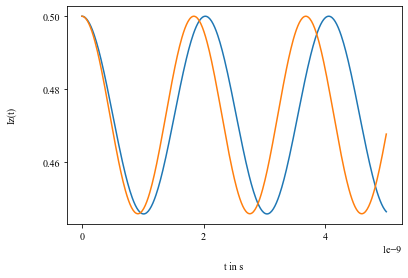

In [73]:
plt.plot(tii,fres1,label='B = 10')
plt.plot(tii,fres2,label='B = 148')
#plt.plot(tii,fres3,label='B = 300')

plt.rcParams.update({'font.family':'Times New Roman'})
plt.xlabel("t in s",labelpad=20)
plt.ylabel("Iz(t)",labelpad=25)
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 24})
ax.tick_params(axis='y', which='major', pad=-5)


In [17]:
###Test interaction between C13 and NV

xgate = [ 3.39150387e+00*10**(-6),  2.38576121e+00*10**(-6),  4.15070375e+00*10**(-6),  2.74889007e+00*10**(-6),
        3.14252395e+00,  3.14095970e+00, -3.19023404e-04, -1.39617460e-01,
       -1.57458794e+00, -4.43764057e+00,  8.02153030e+00,  6.96130767e+00]

xtime = 3.39150387e+00*10**(-6) + 2.38576121e+00*10**(-6) + 4.15070375e+00*10**(-6) + 2.74889007e+00*10**(-6)


initialize(0)




def HNVC13t(r):
    rd = np.sqrt(r[0]**2+r[1]**2+r[2]**2)
    nd = r/rd
    b = - mu0/(4*np.pi) * (gye*gyc*h)/rd**3
    hnvc13d = b * (int1xx * (3*nd[0]**2 - 1) + int1yy * (3 * nd[1]**2 - 1) + int1zz *(3 * nd[2]**2 - 1))
    hnvc13of = b * 3* ((int1yx + int1xy) * nd[0] * nd[1] + (int1zx + int1xz) * nd[0] * nd[2] + (int1yz + int1zy) * nd[1] * nd[2])  
    return hnvc13d + hnvc13of

#NV-Hamiltonian including mean field bath and Hyperfine coupling to the N nuclear spin
def HsNVt(Bz):
    HsNVc = (Dgs *2*np.pi *Sz2f +(ge * Bz *2*np.pi + An *2*np.pi)*Szf) 
    #HsNVc = (Dgs *Sz2f +(ge * Bz + An  )*Szf)*2*np.pi 
    return HsNVc

 
#C13 Hamiltonian including mean field interaction!
def HsC13t(r00,Bz):
    HsNVc = (- gc * Bz * 2 * np.pi ) * I1z  
    #HsNVc = (- gc * Bz ) * I1z * 2 * np.pi  
    return HsNVc


def timeevoOpt(t,Bzz):
    H = HNVC13t(rv1)+HsNVt(Bzz)+ HsC13t(rv1,Bzz)
    tevo = (-j*H*t).expm()
    return tevo



def timeevolutionOtsys(t,Bzz):
    H = HNVC13t(rv1)+HsNVt(Bzz)+ HsC13t(rv1,Bzz)
    tevo = (-j*H*t).expm()
    initialel = 1/np.sqrt(2)*(basis(2,1)+basis(2,0)) #1/np.sqrt(2)*( basis(2,0)  + basis(2,1))
    initialC = basis(2,0) #1/np.sqrt(2)*( basis(3,0)  + basis(3,2))
    initialnewC = tensor(initialel,initialC)
    indens = initialnewC*initialnewC.dag()
    indens.dims=[[4],[4]]
    result = tevo * indens *tevo.dag()
    return result

#unit = (-j*d*t).expm()
#HP1(500)/(2*np.pi)
#basis(3,0)
timespacenewP1 = 10*10**(-6)#(pent[0]+pent[1]+pent[2]+pent[3])*5#38*10**(-6)
#(pent[0]+pent[1]+pent[2]+pent[3])
timepointsnewP1 = 400
tii = np.linspace(0,timespacenewP1,timepointsnewP1)

def timearraynewSys(tt,Bzz): #CHECK WHETHER IT IS NEEDED!
    tArray = []
    for i in range(timepointsnewP1):
        finDM =  timeevolutionOtsys(tt[i],Bzz)##NON DIAGONALIZED VERSION
        
        Izel = (I1z*finDM).tr()
        tArray.append(Izel)
    return  tArray

#fres1Sys = timearraynewSys(tii,10)
#fres2Sys = timearraynewSys(tii,148)
#fres3Sys = timearraynewSys(tii,300)


In [22]:
plt.plot(tii,fres1Sys,label='B = 10')
plt.plot(tii,fres2Sys,label='B = 148')
plt.plot(tii,fres3Sys,label='B = 340')

plt.rcParams.update({'font.family':'Times New Roman'})
plt.xlabel("t in s",labelpad=20)
plt.ylabel("Iz(t)",labelpad=25)
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 24})
ax.tick_params(axis='y', which='major', pad=-5)

NameError: name 'fres1Sys' is not defined

In [ ]:
Ez2no = p1state(numberofspins,'no')
Hno = (HP1P1(pos[0],LzzP1,numberofspins,Ezz,0,1,Ez2no))[0][0][0]/(2*np.pi)

In [23]:
Ez2 = p1state(numberofspins,'yes','no')
Hyes=(HP2P1(pos[0],LzzP1,numberofspins,Ezz,0,1,Ez2))[0][0][0]/(2*np.pi)-Hno
Hyes

NameError: name 'LzzP1' is not defined

In [24]:
Bz0 = 244
Azx = 0.11*10**(6)
Azz = -0.152 *10**(6)
nuc = gc * Bz0
kappa = np.arctan(Azx/(Azz+nuc))
nu = np.sqrt(Azx**2 + (nuc + Azz)**2)
time = 1/(np.pi*nu)*np.arcsin(1/(np.sqrt(2)*np.sin(kappa)))
#nuc
#kappa
time

3.0631966642982292e-06

In [25]:
timeevolutionO(100*10**(-6),700)

Quantum object: dims = [[2, 3], [2, 3]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  9.99935793e-01+0.j         0.00000000e+00+0.j
  1.13159496e-03-0.00793236j 0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  1.13159496e-03+0.00793236j 0.00000000e+00+0.j
  6.42069476e-05+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00

In [26]:
HP1(100)/(2*np.pi)

Quantum object: dims = [[2, 3], [2, 3]], shape = (6, 6), type = oper, isherm = True
Qobj data =
[[ 2.05042900e+08  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.40150000e+08  0.00000000e+00  5.74877813e+07
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.05042900e+08  0.00000000e+00
   5.74877813e+07  0.00000000e+00]
 [ 0.00000000e+00  5.74877813e+07  0.00000000e+00 -1.89257100e+08
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  5.74877813e+07  0.00000000e+00
  -1.40150000e+08  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.89257100e+08]]

In [27]:
10**{19}

TypeError: unsupported operand type(s) for ** or pow(): 'int' and 'set'

In [28]:
Nzz_NV(numberofspins,0,1)

NameError: name 'CCE' is not defined

In [29]:
#bathcheck

In [18]:
def IntCheckNz(numberofspins,thres):
    CCE = 0
    initialize(CCE)
    checkArray = []
    finArray = []
    for l in range(numberofspins):
        NzCheck = Nzz_NV(numberofspins,l,m+l)
        for i in range(numberofspins-1):
            if np.abs(NzCheck[i]) > thres : 
                checkArray.append(np.abs(NzCheck[i]))
    li = sorted(checkArray)
    lii = len(li)
    #for i in range(0,lii,2):
     #    finArray.append(li[i])
    return list(set(li)) #finArray  
    
def bathcheck(numberofspins,pos,n1,n2):
    CCE = 2
    initialize(CCE)
    Arraydis = []
    Arrayl = []
    Arraym = []
    for l in range(numberofspins):
        for m in range(1,numberofspins-l):
            r2 = pos[0][l]
            th2 = pos[1][l]
            phi2 = pos[2][l]
            rv2 = r(r2,th2,phi2)
            r3 = pos[0][l+m]
            th3 = pos[1][l+m]
            phi3 = pos[2][l+m]
            rv3 = r(r3,th3,phi3)
            distancee= np.sqrt((rv2[0]-rv3[0])**2+(rv2[1]-rv3[1])**2+(rv2[2]-rv3[2])**2)
            disNzzl = np.sqrt((rv2[0])**2+(rv2[1])**2+(rv2[2])**2)
            disNzzm = np.sqrt((rv3[0])**2+(rv3[1])**2+(rv3[2])**2)
            disnorm = n1*10**(-9)
            disnorm2  =n2*10**(-9)
            if distancee < disnorm  and (disNzzl < disnorm2 or disNzzm <  disnorm2):
                Arraydis.append(distancee)
                Arraydis.append(disNzzl)
                Arraydis.append(disNzzm)
                Arraydis.append(l)
                Arraydis.append(m+l)
                Arraydis.append(np.max(np.abs(HP2P1full(rv2,rv3).full())))
                Arraydis.append(np.max(np.abs(HNVP1(rv2).full())))
                Arraydis.append(np.max(np.abs(HNVP1(rv3).full())))
                Arraydis.append('-')
    return Arraydis#len(Arraydis)/4


def Lzz_test(r,theta):  #r11 is the position of the "strongly coupled"-P1 spin
    LzP1 =  - mu0/(4*np.pi) * (gye*gye*h)/(r)**3  * (3 * np.cos(theta)**2-1) 
    return LzP1


#pos = positions(numberofspins)

#len(bathcheck(numberofspins,pos,55,65))/9

#bathcheck(numberofspins,pos,55,65)

def bathchecknewCCE1(numberofspins,pos,n1,n2):
    CCE = 2
    initialize(CCE)
    Arraydis = []
    Arrayl = []
    Arraym = []
    for l in range(numberofspins):
        for m in range(1,numberofspins-l):
            r2 = pos[0][l]
            th2 = pos[1][l]
            phi2 = pos[2][l]
            rv2 = r(r2,th2,phi2)
            r3 = pos[0][l+m]
            th3 = pos[1][l+m]
            phi3 = pos[2][l+m]
            rv3 = r(r3,th3,phi3)
            distancee= np.sqrt((rv2[0]-rv3[0])**2+(rv2[1]-rv3[1])**2+(rv2[2]-rv3[2])**2)
            disNzzl = np.sqrt((rv2[0])**2+(rv2[1])**2+(rv2[2])**2)
            disNzzm = np.sqrt((rv3[0])**2+(rv3[1])**2+(rv3[2])**2)
            disnorm = n1*10**(-9)
            disnorm2  =n2*10**(-9)
            if distancee < disnorm  and (disNzzl < disnorm2 or disNzzm <  disnorm2):
                Arraydis.append(l)
                Arraydis.append(m+l)
                #Arraydis.append('-')
            Arraydisnew = list(dict.fromkeys(Arraydis))
    return Arraydisnew#len(Arraydis)/4


def bathchecknewCCE2(number,pos,n1,n2):
    CCE = 2
    initialize(CCE)
    Arraydis = []
    Arrayl = []
    Arraym = []
    for l in range(number - 1):          
        for m in range(l+1,number):

            r2 = pos[0][l]
            th2 = pos[1][l]
            phi2 = pos[2][l]
            rv2 = r(r2,th2,phi2)
            r3 = pos[0][m]
            th3 = pos[1][m]
            phi3 = pos[2][m]
            rv3 = r(r3,th3,phi3)
                
            distance = np.sqrt((rv2[0] - rv3[0])**2+(rv2[1] - rv3[1])**2+(rv2[2] - rv3[2])**2)
            disNzzl = np.sqrt((rv2[0])**2+(rv2[1])**2+(rv2[2])**2)
            disNzzm = np.sqrt((rv3[0])**2+(rv3[1])**2+(rv3[2])**2)
            disnorm = n1*10**(-9)
            disnorm2  =n2*10**(-9)
            if distance < disnorm  and (disNzzl < disnorm2 or disNzzm <  disnorm2):
                #lis = [l,m+1]
                Arraydis.append([l,m])
               # Arraydis.append(m+l)
                #Arraydis.append('-')
           # Arraydisnew = list(dict.fromkeys(Arraydis))
    return Arraydis#len(Arraydis)/4

        

In [19]:
#bathchecknewCCE2(numberofspins,pos,22,25)




In [20]:
#Initial states1
initialNV = Qobj(basis(2,0)) 
initialC13 = Qobj(basis(2,0))


def initialP1(a):#initial state of the P1 depends on a
    if a == 0.5:
        bas = Qobj(basis(2,0))
    elif a == -0.5:
        bas = Qobj(basis(2,1))
    return bas


#for obtaining the second element in the density matrix ??
secNV = Qobj(basis(2,0)) 
secC13 = Qobj(basis(2,1))

#target states
finalNV = Qobj(basis(2,0)) 
finalC13 = 1/np.sqrt(2)*(Qobj(basis(2,0))+basis(2,1))

#Here we have to deal with the bath state of the strongly coupled P1 - Spin!


def initial(l,m):
    if CCE == 2:
        init = tensor(initialNV,tensor(initialC13, tensor(initialP1(l),initialP1(m))))#the initial state is now 16 dimensional
        init.dims = [[16],[1]]
    if CCE == 1:
        init = tensor(initialNV,tensor(initialC13, initialP1(l)))  #the initial state needs to be 8 dimensional!
        init.dims = [[8],[1]]
    elif CCE ==0:
        init = tensor(initialNV,initialC13)  #the initial state needs to be 8 dimensional!
        init.dims = [[4],[1]]
    return init

def finalP1(a):
    if a == -0.5:
        bas = Qobj(basis(2,0))
    elif a == 0.5:
        bas = Qobj(basis(2,1))
    return bas



def final(a): 
    fin = tensor(finalNV,tensor(finalC13,finalP1(a)))
    fin.dims = [[8],[1]]
    return fin


# Diagonalize the Hamiltonian#########


def Unitary(r00,r11,r22,number,E,E2,t,kl,km):
    d = Htot(r00,r11,r22,number,E,kl,km,E2)
    unit = (-j*d*t).expm()
    return unit#.tidyup(atol=1e-5)

def Unitarynew(r00,r11,r22,number,E,E2,t,kl,km):
    d = Htot(r00,r11,r22,number,E,kl,km,E2).eigenstates()
    en = di[0]
    st = di[1]
    mat = Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
    for i in range(en):
        mat = mat + np.exp(-j*en[i]*to)*st[i]*st[i].dag() 
    unit = mat #(-j*d*t).expm()
    return unit#.tidyup(atol=1e-5)

#Pi- Pulse 
def rot(th,phase):    #Change dimensions!
    ro = sigx2
    ro2 = sigy2
    if CCE == 2:
        ro.dims = [[16],[16]]
        ro2.dims = [[16],[16]]
    if CCE==1:
        ro.dims = [[8],[8]]
        ro2.dims = [[8],[8]]
    elif CCE ==0:
        ro.dims = [[4],[4]]
        ro2.dims = [[4],[4]]
    rot = (-j*th/2*(ro*np.cos(phase)+ro2*np.sin(phase))).expm()
    return rot

def roty(th):    #Change dimensions!
    ro = sigy2
    if CCE == 2:
        ro.dims = [[16],[16]]
    if CCE==1:
        ro.dims = [[8],[8]]
    elif CCE ==0:
        ro.dims = [[4],[4]]
    rot = (ro*j*th/2).expm()
    return rot


#SEQ: Ansatz for the Gate Sequence#########################################################################################################



# Insert general pulse structure of the Suter PRL!
def SEQ(r00,r11,r22,number,E,E2,tg,phig,phag,t,kl,km):
    t0 = tg[0]
    t1 = tg[1]
    t2 = tg[2]
    t3 = tg[3]
    phi0 = phig[0]
    phi1 = phig[1]
    phi2 = phig[2]
    phi3 = phig[3]
    pha0 = phag[0]
    pha1 = phag[1]
    pha2 = phag[2]
    pha3 = phag[3]
    if t <= t0:
        fer =  Unitary(r00,r11,r22,number,E,E2,t,kl,km)
    elif t0 < t <= (t0+t1):
        fer =   Unitary(r00,r11,r22,number,E,E2,t-t0,kl,km) * rot(phi0,pha0) *  Unitary(r00,r11,r22,number,E,E2,t0,kl,km)
    elif (t0+t1) < t <= (t0+t1+t2):
        fer = ( Unitary(r00,r11,r22,number,E,E2,t-t1-t0,kl,km)* rot(phi1,pha1) *
                Unitary(r00,r11,r22,number,E,E2,t1,kl,km) * rot(phi0,pha0)
               * Unitary(r00,r11,r22,number,E,E2,t0,kl,km)   )
    elif (t0+t1+t2) < t <= (t0+t1+t2+t3) :
        fer =(Unitary(r00,r11,r22,number,E,E2,t-t2-t1-t0,kl,km) * rot(phi2,pha2)*
                Unitary(r00,r11,r22,number,E,E2,t2,kl,km)* rot(phi1,pha1) * 
                Unitary(r00,r11,r22,number,E,E2,t1,kl,km) * rot(phi0,pha0)*
                Unitary(r00,r11,r22,number,E,E2,t0,kl,km)) 
    elif (t0+t1+t2+t3) < t:
        fer = (  Unitary(r00,r11,r22,number,E,E2,t-t3-t2-t1-t0,kl,km) * rot(phi3,pha3) *
                 Unitary(r00,r11,r22,number,E,E2,t3,kl,km) * rot(phi2,pha2) *
                 Unitary(r00,r11,r22,number,E,E2,t2,kl,km)* rot(phi1,pha1)*
                 Unitary(r00,r11,r22,number,E,E2,t1,kl,km) * rot(phi0,pha0)*
                 Unitary(r00,r11,r22,number,E,E2,t0,kl,km)) 
    if CCE == 2:
        fer.dims = [[16],[16]]
    if CCE == 1:
        fer.dims = [[8],[8]]
    elif CCE ==0:
        fer.dims = [[4],[4]]
    return fer#.tidyup(atol=1e-5)

def SEQdecold(r00,r11,r22,number,E,E2,tg,phig,phag,t,kl,km,dec):
    t0 = 0*tg[0]
    t1 = tg[1]
    t2 = tg[2]
    t3 = tg[3]
    phi0 = phig[0]
    phi1 = phig[1]
    phi2 = phig[2]
    phi3 = phig[3]
    pha0 = phag[0]
    pha1 = phag[1]
    pha2 = phag[2]
    pha3 = phag[3]
    rotpi = rot(np.pi,0) 
    if t < t0:
        fer =  Unitary(r00,r11,r22,number,E,E2,t,kl,km)
    elif t0 <= t < (t0+t1/2): ##Continue here!
        U0 = Unitary(r00,r11,r22,number,E,E2,t0,kl,km)
        fer =   (Unitary(r00,r11,r22,number,E,E2,(t-t0),kl,km) )* rot(phi0,pha0) * U0
    elif (t0+t1/2) <= t < (t0+t1):
        U0 = Unitary(r00,r11,r22,number,E,E2,t0,kl,km)
        U1 = Unitary(r00,r11,r22,number,E,E2,t1/2,kl,km)
        #
        fer =   (Unitary(r00,r11,r22,number,E,E2,(t-t0-t1/2),kl,km)* rotpi * U1 ) * rot(phi0,pha0) *  U0
        #
    elif (t0+t1) <= t < (t0+t1+t2/2):
        U0 = Unitary(r00,r11,r22,number,E,E2,t0,kl,km)
        U1 = Unitary(r00,r11,r22,number,E,E2,t1/2,kl,km)
        fer = ( Unitary(r00,r11,r22,number,E,E2,t-t1-t0,kl,km)*  rot(phi1,pha1) *
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0  )
        #
    elif (t0+t1+t2/2) <= t < (t0+t1+t2):
        U0 = Unitary(r00,r11,r22,number,E,E2,t0,kl,km)
        U1 = Unitary(r00,r11,r22,number,E,E2,t1/2,kl,km)
        U2 = Unitary(r00,r11,r22,number,E,E2,t2/2,kl,km)
        #
        fer = ( (Unitary(r00,r11,r22,number,E,E2,t-t2/2-t1-t0,kl,km) * rotpi * U2 ) * rot(phi1,pha1) *
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0   )
        #
    elif (t0+t1+t2) <= t < (t0+t1+t2+t3/2):
        U0 = Unitary(r00,r11,r22,number,E,E2,t0,kl,km)
        U1 = Unitary(r00,r11,r22,number,E,E2,t1/2,kl,km)
        U2 = Unitary(r00,r11,r22,number,E,E2,t2/2,kl,km)
        #
        fer =(Unitary(r00,r11,r22,number,E,E2,(t-t2-t1-t0),kl,km) * rot(phi2,pha2)*  ##Changed (t-t2-t1-t0)/2  to  (t-t2-t1-t0)
                (U2 * rotpi * U2) * rot(phi1,pha1) * 
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        #
    elif (t0+t1+t2+t3/2) <= t <= (t0+t1+t2+t3) :
        U0 = Unitary(r00,r11,r22,number,E,E2,t0,kl,km)
        U1 = Unitary(r00,r11,r22,number,E,E2,t1/2,kl,km)
        U2 = Unitary(r00,r11,r22,number,E,E2,t2/2,kl,km)
        U3 = Unitary(r00,r11,r22,number,E,E2,t3/2,kl,km)
        #
        fer =((Unitary(r00,r11,r22,number,E,E2,(t-t3/2-t2-t1-t0),kl,km) * rotpi * U3) * rot(phi2,pha2) *
                (U2 * rotpi * U2) * rot(phi1,pha1) * 
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0)
        #
#    elif (t0+t1+t2+t3) <= t < (t0+t1+t2+t3+t4/2):
#        U0 = Unitary(r00,r11,r22,number,E,t0,kl,km)
#        U1 = Unitary(r00,r11,r22,number,E,t1/2,kl,km)
#        U2 = Unitary(r00,r11,r22,number,E,t2/2,kl,km)
#        U3 = Unitary(r00,r11,r22,number,E,t3/2,kl,km)
        #
#        fer = (  Unitary(r00,r11,r22,number,E,(t-t3-t2-t1-t0),kl,km) * rot(phi3,pha3) *
#                (U3 * rotpi * U3 ) * rot(phi2,pha2) *
#                (U2 * rotpi * U2) * rot(phi1,pha1) * 
#                (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        #
#    elif (t0+t1+t2+t3+t4/2) <= t < (t0+t1+t2+t3+t4):
#        U0 = Unitary(r00,r11,r22,number,E,t0,kl,km)
#        U1 = Unitary(r00,r11,r22,number,E,t1/2,kl,km)
#        U2 = Unitary(r00,r11,r22,number,E,t2/2,kl,km)
#        U3 = Unitary(r00,r11,r22,number,E,t3/2,kl,km)
#        U4 = Unitary(r00,r11,r22,number,E,t4/2,kl,km)
        #
#        fer = (  (Unitary(r00,r11,r22,number,E,(t-t4/2-t3-t2-t1-t0),kl,km) * rotpi * U4) * rot(phi3,pha3) *
#                (U3 * rotpi * U3) * rot(phi2,pha2) *
#                (U2 * rotpi * U2) * rot(phi1,pha1) * 
#                (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        #
    elif (t0+t1+t2+t3) < t :
        U0 = Unitary(r00,r11,r22,number,E,E2,t0,kl,km)
        U1 = Unitary(r00,r11,r22,number,E,E2,t1/2,kl,km)
        U2 = Unitary(r00,r11,r22,number,E,E2,t2/2,kl,km)
        U3 = Unitary(r00,r11,r22,number,E,E2,t3/2,kl,km)
        if dec == 1:
            halfU = Unitary(r00,r11,r22,number,E,E2,(t-t3-t2-t1-t0)/2,kl,km)
            lastU = halfU * rotpi * halfU
            fer = ( lastU *
                    (U3 * rotpi * U3) * rot(phi2,pha2) *
                    (U2 * rotpi * U2) * rot(phi1,pha1) * 
                    (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        elif dec == 3:
            quadU = Unitary(r00,r11,r22,number,E,E2,(t-t3-t2-t1-t0)/4,kl,km)
            lastU =   quadU * rotpi * quadU * rotpi * quadU * rotpi * quadU  ####Change back
            fer = ( lastU *
                    (U3 * rotpi * U3) * rot(phi2,pha2) *
                    (U2 * rotpi * U2) * rot(phi1,pha1) * 
                    (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        elif dec == 5:
            sixU = Unitary(r00,r11,r22,number,E,E2,(t-t3-t2-t1-t0)/6,kl,km)
            lastU =  sixU * rotpi * sixU * rotpi * sixU * rotpi * sixU * rotpi * sixU * rotpi * sixU  ####Change back
            fer = ( lastU *
                    (U3 * rotpi * U3) * rot(phi2,pha2) *
                    (U2 * rotpi * U2) * rot(phi1,pha1) * 
                    (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
            
    if CCE == 2:
        fer.dims = [[16],[16]]
    if CCE == 1:
        fer.dims = [[8],[8]]
    elif CCE ==0:
        fer.dims = [[4],[4]]
    return fer#.tidyup(atol=1e-5)

In [21]:
def Unitary2(en,st,t):
    if CCE == 0:
        mat = Qobj(np.full((4, 4), 0))
    if CCE == 1:
        mat = Qobj(np.full((8, 8), 0))
    if CCE == 2:
        mat = Qobj(np.full((16, 16), 0))
        
    for i in range(len(en)):
        deni = np.exp(-j*en[i]*t)*st[i]*st[i].dag() 
        mat = mat + Qobj(deni)
    unit = mat #(-j*d*t).expm()
    return mat

def SEQdec(r00,r11,r22,number,E,E2,tg,phig,phag,t,kl,km,dec):
    t0 = tg[0]
    t1 = tg[1]
    t2 = tg[2]
    t3 = tg[3]
    phi0 = phig[0]
    phi1 = phig[1]
    phi2 = phig[2]
    phi3 = phig[3]
    pha0 = phag[0]
    pha1 = phag[1]
    pha2 = phag[2]
    pha3 = phag[3]

    rotpi = rot(np.pi,0) 

    di = Htot(r00,r11,r22,number,E,kl,km,E2).eigenstates()
    en = di[0]
    st = di[1]
    if t < t0:
        fer =  Unitary2(en,st,t)
    elif t0 <= t < (t0+t1/2): ##Continue here!
        U0 = Unitary2(en,st,t0)
        fer =   (Unitary2(en,st,(t-t0)) )* rot(phi0,pha0) * U0
    elif (t0+t1/2) <= t < (t0+t1):
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        #
        fer =   (Unitary2(en,st,(t-t0-t1/2))* rotpi * U1 ) * rot(phi0,pha0) *  U0
        #
    elif (t0+t1) <= t < (t0+t1+t2/2):
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        fer = ( Unitary2(en,st,t-t1-t0)*  rot(phi1,pha1) *
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0  )
        #
    elif (t0+t1+t2/2) <= t < (t0+t1+t2):
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        U2 = Unitary2(en,st,t2/2)
        #
        fer = ( (Unitary2(en,st,t-t2/2-t1-t0) * rotpi * U2 ) * rot(phi1,pha1) *
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0   )
        #
    elif (t0+t1+t2) <= t < (t0+t1+t2+t3/2):
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        U2 = Unitary2(en,st,t2/2)#####HEREE!!!!
        #
        fer =(Unitary2(en,st,(t-t2-t1-t0)) * rot(phi2,pha2)*
                (U2 * rotpi * U2) * rot(phi1,pha1) * 
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        #
    elif (t0+t1+t2+t3/2) <= t <= (t0+t1+t2+t3) :
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        U2 = Unitary2(en,st,t2/2)
        U3 = Unitary2(en,st,t3/2)
        #
        fer =((Unitary2(en,st,(t-t3/2-t2-t1-t0)) * rotpi * U3) * rot(phi2,pha2) *
                (U2 * rotpi * U2) * rot(phi1,pha1) * 
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0)
        #
#    elif (t0+t1+t2+t3) <= t < (t0+t1+t2+t3+t4/2):
#        U0 = Unitary(r00,r11,r22,number,E,t0,kl,km)
#        U1 = Unitary(r00,r11,r22,number,E,t1/2,kl,km)
#        U2 = Unitary(r00,r11,r22,number,E,t2/2,kl,km)
#        U3 = Unitary(r00,r11,r22,number,E,t3/2,kl,km)
        #
#        fer = (  Unitary(r00,r11,r22,number,E,(t-t3-t2-t1-t0),kl,km) * rot(phi3,pha3) *
#                (U3 * rotpi * U3 ) * rot(phi2,pha2) *
#                (U2 * rotpi * U2) * rot(phi1,pha1) * 
#                (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        #
#    elif (t0+t1+t2+t3+t4/2) <= t < (t0+t1+t2+t3+t4):
#        U0 = Unitary(r00,r11,r22,number,E,t0,kl,km)
#        U1 = Unitary(r00,r11,r22,number,E,t1/2,kl,km)
#        U2 = Unitary(r00,r11,r22,number,E,t2/2,kl,km)
#        U3 = Unitary(r00,r11,r22,number,E,t3/2,kl,km)
#        U4 = Unitary(r00,r11,r22,number,E,t4/2,kl,km)
        #
#        fer = (  (Unitary(r00,r11,r22,number,E,(t-t4/2-t3-t2-t1-t0),kl,km) * rotpi * U4) * rot(phi3,pha3) *
#                (U3 * rotpi * U3) * rot(phi2,pha2) *
#                (U2 * rotpi * U2) * rot(phi1,pha1) * 
#                (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        #
    elif (t0+t1+t2+t3) < t :
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        U2 = Unitary2(en,st,t2/2)
        U3 = Unitary2(en,st,t3/2)
        if dec == 1:
            halfU = Unitary2(en,st,(t-t3-t2-t1-t0)/2)
            lastU = halfU * rotpi * halfU
            fer = ( lastU *
                    (U3 * rotpi * U3) * rot(phi2,pha2) *
                    (U2 * rotpi * U2) * rot(phi1,pha1) * 
                    (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        elif dec == 3:
            quadU = Unitary2(en,st,(t-t3-t2-t1-t0)/4)
            lastU =   quadU * rotpi * quadU * rotpi * quadU * rotpi * quadU  ####Change back
            fer = ( lastU *
                    (U3 * rotpi * U3) * rot(phi2,pha2) *
                    (U2 * rotpi * U2) * rot(phi1,pha1) * 
                    (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        elif dec == 5:
            sixU = Unitary2(en,st,(t-t3-t2-t1-t0)/6)
            lastU =  sixU * rotpi * sixU * rotpi * sixU * rotpi * sixU * rotpi * sixU * rotpi * sixU  ####Change back
            fer = ( lastU *
                    (U3 * rotpi * U3) * rot(phi2,pha2) *
                    (U2 * rotpi * U2) * rot(phi1,pha1) * 
                    (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
            
    if CCE == 2:
        fer.dims = [[16],[16]]
    if CCE == 1:
        fer.dims = [[8],[8]]
    elif CCE ==0:
        fer.dims = [[4],[4]]
    return fer#.tidyup(atol=1e-5)



In [25]:
CCE = 0
rot(np.pi,0)

#Unitary(rv1,r11,r22,number,E,E2,t0,kl,km)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.+0.j 0.+0.j 0.-1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-1.j]
 [0.-1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.+0.j]]

In [35]:
#reduceddensitymatrix

In [22]:
def reduceddensitymatrix(r00,r11,r22,number,E,E2,tg,phig,phag,t,kl,km,e1):
    if CCE ==2:
        denseps = np.array([[e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1],
                            [e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1],
                            [e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1],
                            [e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1],
                            [e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1],
                            [e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1],
                            [e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1],
                            [e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1],
                            [e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1],
                            [e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1],
                            [e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1],
                            [e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1],
                            [e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1],
                            [e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1],
                            [e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1],[e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1,e1]])
        rho0 = initial(E[kl],E[km])*initial(E[kl],E[km]).dag()
        S = SEQ(r00,r11,r22,number,E,E2,tg,phig,phag,t,kl,km)
        rhot = S*rho0*S.dag()
        rhot.dims = [[2,2,2,2],[2,2,2,2]]
        reduced = rhot.ptrace([0,1])
    if CCE == 1:
        denseps = np.array([[e1,e1,e1,e1,e1,e1,e1,e1],[e1,e1,e1,e1,e1,e1,e1,e1],[e1,e1,e1,e1,e1,e1,e1,e1],[e1,e1,e1,e1,e1,e1,e1,e1],
                           [e1,e1,e1,e1,e1,e1,e1,e1],[e1,e1,e1,e1,e1,e1,e1,e1],[e1,e1,e1,e1,e1,e1,e1,e1],[e1,e1,e1,e1,e1,e1,e1,e1]])
        rho0 = initial(E[kl],E[km])*initial(E[kl],E[km]).dag()
        S = SEQ(r00,r11,r22,number,E,E2,tg,phig,phag,t,kl,km)
        rhot = S*rho0*S.dag()
        rhot.dims = [[2,2,2],[2,2,2]]
        reduced = rhot.ptrace([0,1])
    elif CCE ==0:
        e1= 1e-6
        denseps = np.array([[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1]])
        #rho0n = initial(E[0],E[1])*initial(E[0],E[1]).dag()
        rho0 = initial(E[0],E[1])*initial(E[0],E[1]).dag()
        S = SEQ(r00,r11,r22,number,E,E2,tg,phig,phag,t,kl,km)
        rhot = S*rho0*S.dag()
        
        rhot.dims = [[2,2],[2,2]]
        reduced = rhot    
    return reduced

def reduceddensitymatrixdec(r00,r11,r22,number,E,E2,tg,phig,phag,t,kl,km,e1,dec):
    if CCE ==2:
        rho0 = initial(E[kl],E[km])*initial(E[kl],E[km]).dag()
        S = SEQdec(r00,r11,r22,number, E,E2,tg,phig,phag,t,kl,km,dec)
        rhot = S*rho0*S.dag()
        rhot.dims = [[2,2,2,2],[2,2,2,2]]
        reduced = rhot.ptrace([0,1])
    if CCE == 1:
        denseps = np.array([[e1,e1,e1,e1,e1,e1,e1,e1],[e1,e1,e1,e1,e1,e1,e1,e1],[e1,e1,e1,e1,e1,e1,e1,e1],[e1,e1,e1,e1,e1,e1,e1,e1],
                           [e1,e1,e1,e1,e1,e1,e1,e1],[e1,e1,e1,e1,e1,e1,e1,e1],[e1,e1,e1,e1,e1,e1,e1,e1],[e1,e1,e1,e1,e1,e1,e1,e1]])
        rho0 = initial(E[kl],E[km])*initial(E[kl],E[km]).dag()
        S = SEQdec(r00,r11,r22,number,E,E2,tg,phig,phag,t,kl,km,dec)
        rhot = S*rho0*S.dag()
        rhot.dims = [[2,2,2],[2,2,2]]
        reduced = rhot.ptrace([0,1])
    elif CCE ==0:
        e1= 1e-6
        denseps = np.array([[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1]])
        #rho0n = initial(E[0],E[1])*initial(E[0],E[1]).dag()
        rho0 = initial(E[0],E[1])*initial(E[0],E[1]).dag()
        S = SEQdec(r00,r11,r22,number,E,E2,tg,phig,phag,t,kl,km,dec)
        rhot = S*rho0*S.dag()
        rhot.dims = [[2,2],[2,2]]
        reduced = rhot    
    return reduced

#reduceddensitymatrixdec(r00,r11,r22,number,E,tg,phig,phag,t,kl,km,e1,dec)

In [23]:
###NEW way of calculating the CCE-contributions!

In [24]:
def densmatrixfast(r00,number,E,para,t,CCE,bathCCE1,bathCCE2,e1):
        #global CCE
    #global Nzz,NzzC13,LzzP1,LzzP2
    if CCE == 0:
        final = summ(densargCCE0(r00,number,E,para,t,e1),e1)
        densCCE1 = 0
        densCCE2 = 0
    if CCE == 1 :
        densCCE0 = densargCCE0(r00,number,E,para,t,e1)
        densCCE1 = serial_map(densargCCE1,bathCCE1,task_args=(r00,number,E,para,t,e1))
        final = calcCCE(densCCE0,densCCE1,densCCE0,CCE,bathCCE1,bathCCE2,number,e1)
    if CCE == 2 : 
        #parallel_map(densmatrixchange,ezli,task_args=(rv1,numberofspins,para,t,CCE,rc,rc2,e1))
        densCCE0 = summ(densargCCE0(r00,number,E,para,t,e1),e1)
        densCCE1 = serial_map(densargCCE1,bathCCE1,task_args=(r00,number,E,para,t,e1))
        densCCE2 = serial_map(densargCCE2,bathCCE2,task_args=(r00,number,E,para,t,e1))
        #densCCE2 = [densargCCE2(bathCCE2[xi],r00,number,E,para,t,e1) for xi in range(len(bathCCE2))]
        final = calcCCE(densCCE0,densCCE1,densCCE2,CCE,bathCCE1,bathCCE2,number,e1)
    return final #densCCE1#densCCE2[0][0]


def calcCCE(densmatCCE0,densmatCCE1l,densmatCCE2l,CCE,bathCCE1,bathCCE2,numberofspins,e1):
   # densArray = np.empty(len(bathCCE1), dtype = Qobj)
    if CCE == 1:
        densNormp1 = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
        for i in range(len(bathCCE1)): #
            dens0 = densmatCCE0
            dens1 = densmatCCE1l[i][0]
            #dnumb = densmatCCE1l[i][1]
            densNormp1 = densNormp1*dens1/dens0
        dCCE1 = dens0*densNormp1
        dCCE2 = densmatCCE0
    if CCE == 2:
        densNormp2 = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
        densNormp1 = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
        densArray1 = np.empty(numberofspins, dtype = Qobj)
        densArray2 = np.empty((numberofspins,numberofspins), dtype = Qobj)
        dens0 =  summ((densmatCCE0/Qobj(densmatCCE0).tr()),e1)
        for i in range(len(bathCCE1)): # 
            dens1 = densmatCCE1l[i][0]
            dens1n = summ((dens1/Qobj(dens1).tr()),e1)
            dnumb = densmatCCE1l[i][1]
            densNormp12 = densNormp1*dens1n/dens0
            densNormp1 = densNormp12
            densArray1[dnumb] = np.real(dens1n/dens0)
        for jj in range(len(bathCCE2)):
            densn2 = densmatCCE2l[jj][0]
            dnumbl = densmatCCE2l[jj][1]
            dnumbm = densmatCCE2l[jj][2]
            #densArray2[dnumbl,dnumbm] = dens2
            densNormp22 = densNormp2 * densn2 /(densArray1[dnumbl]*densArray1[dnumbm]*dens0)
            densNormp2 = densNormp22
        dCCE1 = dens0 * densNormp1
        dCCE2 = dens0 * densNormp1 * densNormp2
    return [Qobj(densmatCCE0),Qobj(dCCE1),Qobj(dCCE2)]
        

def densargCCE0(r00,number,E,para,t,e1):
    global CCE
    global Nzz,NzzC13,LzzP1,LzzP2
    tg = [para[0], para[1], para[2], para[3]]
    phig = [para[4],para[5], para[6],para[7]]
    phag = [para[8], para[9],para[10], para[11]]
    CCE = 0
    initialize(CCE)
    l = 0
    m = 1
    r2 = pos[0][l]
    th2 = pos[1][l]
    phi2 = pos[2][l]
    rv2 = r(r2,th2,phi2)
    r3 = pos[0][m]
    th3 = pos[1][m]
    phi3 = pos[2][m]
    rv3 = r(r3,th3,phi3)


    Nzz = Nzz_NV(number,l,m)
    NzzC13 = Nzz_C13(r00,number,l,m)
        #LzzP1  = Lzz_P1(r11,number,kl,km)
        #LzzP2 = Lzz_P2(r22,number,kl,km)
    dens = reduceddensitymatrixdec(r00,rv2,rv3,number,E,tg,phig,phag,t,l,m,e1).full()
    denstr = dens/Qobj(dens).tr()
    return denstr 



def densargCCE1(bCCE1,r00,number,E,para,t,e1):
    global CCE
    global Nzz,NzzC13,LzzP1,LzzP2
    
    tg = [para[0], para[1], para[2], para[3]]
    phig = [para[4],para[5], para[6],para[7]]
    phag = [para[8], para[9],para[10], para[11]]
    
    CCE = 1
    initialize(CCE)
    l = bCCE1
    m = 1
    
    r2 = pos[0][l]
    th2 = pos[1][l]
    phi2 = pos[2][l]
    rv2 = r(r2,th2,phi2)
    
    r3 = pos[0][m]
    th3 = pos[1][m]
    phi3 = pos[2][m]
    rv3 = r(r3,th3,phi3)

    Nzz = Nzz_NV(number,l,m)
    NzzC13 = Nzz_C13(r00,number,l,m)
    LzzP1  = Lzz_P1(rv2,number,l,m)
        #LzzP2 = Lzz_P2(r22,number,kl,km)
    #dens = reduceddensitymatrixdec(r00,rv2,rv3,number,E,tg,phig,phag,t,l,m,e1).full()
   # dens = tred(r00,rv2,rv3,number,E,para,t,l,m,CCE,e1).full()
    rho0 = initial(E[l],E[m])*initial(E[l],E[m]).dag()
    S = SEQdec(r00,rv2,rv3,number,E,E2,tg,phig,phag,t,l,m)
    rhot = S*rho0*S.dag()
    rhot.dims = [[2,2,2],[2,2,2]]
    dens = rhot.ptrace([0,1])
    #dens.full()
    denstr = dens.full()/dens.tr()
    return [denstr , l]



def densargCCE2(bCCE2,r00,number,E,para,t,e1):
    global CCE
    global Nzz,NzzC13,LzzP1,LzzP2
    tg = [para[0], para[1], para[2], para[3]]
    phig = [para[4],para[5], para[6],para[7]]
    phag = [para[8], para[9],para[10], para[11]]

    CCE = 2
    initialize(CCE)

    l = bCCE2[0]
    m = bCCE2[1]
    
    r2 = pos[0][l]
    th2 = pos[1][l]
    phi2 = pos[2][l]
    rv2 = r(r2,th2,phi2)
    
    r3 = pos[0][m]
    th3 = pos[1][m]
    phi3 = pos[2][m]
    rv3 = r(r3,th3,phi3)
    
    Nzz = Nzz_NV(number,l,m)
    NzzC13 = Nzz_C13(r00,number,l,m)
    LzzP1  = Lzz_P1(rv2,number,l,m)
    LzzP2 = Lzz_P2(rv3,number,l,m)
    
    #dens = reduceddensitymatrixdec(r00,rv2,rv3,number,E,tg,phig,phag,t,l,m,e1).full()
    #dens = tred(r00,rv2,rv3,number,E,para,t,l,m,CCE,e1).full()
    rho0 = initial(E[l],E[m])*initial(E[l],E[m]).dag()
    S = SEQdec(r00,rv2,rv3,number, E,E2,tg,phig,phag,t,l,m)
    rhot = S*rho0*S.dag()
    rhot.dims = [[2,2,2,2],[2,2,2,2]]
    dens = rhot.ptrace([0,1])
    #dens.full()
    denstr = dens.full()/dens.tr()
    return [denstr , l, m ]

       # CCE = 2
       # initialize(CCE)
       # Nzz = Nzz_NV(number,kl,km)
       # NzzC13 = Nzz_C13(r00,number,kl,km)
       # LzzP1  = Lzz_P1(r11,number,kl,km)
       # LzzP2 = Lzz_P2(r22,number,kl,km)
       # dens = reduceddensitymatrixdec(r00,r11,r22,number,E,tg,phig,phag,t,kl,km,e1) 

#preprocess Bath!(r00,r11,r22,number,E,para,t,kl,km,CCE1,e1)

In [66]:
bathdm = maximally_mixed_dm(1)
CCE = 1
initialize(1)
E1 = bathstate(numberofspins)
rhot= initial(E1[0],E1[1]).dag()*(S.dag()*(tensor(target,bathdem))*S)*initial(E1[0],E1[1])

NameError: name 'S' is not defined

In [42]:
def Obsfast(r00,number,Ez,para,t,CCE,bathCCE1,bathCCE2,e1,dec,obs,target,decoupling):
        #global CCE
    #global Nzz,NzzC13,LzzP1,LzzP2
    E = Ez[0]
    E2 = Ez[1]
    if CCE == 0:
        loCCE0=ObsCCE0(r00,number,E,E2,para,t,e1,dec,obs,target,decoupling)
        final = [loCCE0,loCCE0,loCCE0]
        lCCE1 = 0
        lCCE2 = 0
    if CCE == 1 :
        loCCE0 = ObsCCE0(r00,number,E,E2,para,t,e1,dec,obs,target,decoupling)
        loCCE1 = serial_map(ObsCCE1,bathCCE1,task_args=(r00,number,E,E2,para,t,e1,dec,obs,target,decoupling))
        final = calcCCEObs(loCCE0,loCCE1,loCCE0,CCE,bathCCE1,bathCCE2,number,e1)
    if CCE == 2 : 
        #parallel_map(densmatrixchange,ezli,task_args=(rv1,numberofspins,para,t,CCE,rc,rc2,e1))
        loCCE0 = ObsCCE0(r00,number,E,E2,para,t,e1,dec,obs,target,decoupling)
        loCCE1 = serial_map(ObsCCE1,bathCCE1,task_args=(r00,number,E,E2,para,t,e1,dec,obs,target,decoupling))
        loCCE2 = serial_map(ObsCCE2,bathCCE2,task_args=(r00,number,E,E2,para,t,e1,dec,obs,target,decoupling))
        #densCCE2 = [densargCCE2(bathCCE2[xi],r00,number,E,para,t,e1) for xi in range(len(bathCCE2))]
        final = calcCCEObs(loCCE0,loCCE1,loCCE2,CCE,bathCCE1,bathCCE2,number,e1)
    return final #densCCE1#densCCE2[0][0]


def calcCCEObs(lCCE0l,lCCE1l,lCCE2l,CCE,bathCCE1,bathCCE2,numberofspins,e1):
    densArray = np.empty(len(bathCCE1), dtype = Qobj)
    if CCE == 1:
        logNormp1 = 1.0
        log0 = lCCE0l
        for i in range(len(bathCCE1)): #
            log1 = lCCE1l[i][0]
            log1n = log1
            #dnumb = lCCE1l[i][1]
            logNormp12 = logNormp1*log1n/log0
            logNormp1 = logNormp12
        logarCCE1 = log0*logNormp1
        logarCCE2 = log0*logNormp1
    if CCE == 2:
        logNormp1 = 1.0# np.full((24, 24), 1)
        logNormp2 = 1.0#np.full((24, 24), 1)
        logArray1 = np.empty(numberofspins, dtype = Qobj)
        logArray2 = np.empty((numberofspins,numberofspins), dtype = Qobj)
        log0 =  lCCE0l
        for i in range(len(bathCCE1)): # 
            log1 = lCCE1l[i][0]
            log1n = log1
            dnumb = lCCE1l[i][1]
            logNormp12 = logNormp1*log1n/log0
            logNormp1 = logNormp12
            logArray1[dnumb] = np.real(log1n/log0)
        for jj in range(len(bathCCE2)):
            logn2 = lCCE2l[jj][0]
            dnumbl = lCCE2l[jj][1]
            dnumbm = lCCE2l[jj][2]
            #densArray2[dnumbl,dnumbm] = dens2
            logNormp22 = logNormp2 * logn2 /(logArray1[dnumbl]*logArray1[dnumbm]*log0)
            logNormp2 = logNormp22
        logarCCE1 = log0 * logNormp1
        logarCCE2 = log0 * logNormp1 * logNormp2
    return [log0,logarCCE1,logarCCE2]
        

def ObsCCE0(r00,number,E1,E2,para,t,e1,dec,obs,target,decoupling):
    global CCE
    global Nzz,NzzC13
    
    tg = [para[0], para[1], para[2], para[3]]
    phig = [para[4],para[5], para[6],para[7]]
    phag = [para[8], para[9],para[10], para[11]]

    CCE = 0
    initialize(CCE)
    l = 0
    m = 1
    r2 = pos[0][l]
    th2 = pos[1][l]
    phi2 = pos[2][l]
    rv2 = r(r2,th2,phi2)
    r3 = pos[0][m]
    th3 = pos[1][m]
    phi3 = pos[2][m]
    rv3 = r(r3,th3,phi3)


    Nzz = Nzz_NV(number,l,m)
    NzzC13 = Nzz_C13(r00,number,l,m)
    #NzzC1302 = Nzz_C13(r20,number,l,m)
    #NzzN0 = Nzz_N0(r10,number,l,m)
    
    rho0n = initial(E1[l],E1[m])*initial(E1[l],E1[m]).dag()
    rho0 = Qobj(rho0n.full())#+denseps)
    if decoupling == 'yes':
        S = SEQdec(r00,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m,dec)
    elif decoupling == 'no':
        S = SEQ(r00,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m)
    rhot = S*rho0*S.dag()
    rhot.dims = [[2,2],[2,2]]
    dens = rhot    
    if obs == 'ICx':
        I1x0 = tensor(Is,Ix)
        obb = np.real((dens*I1x0).tr())
    elif obs == 'ICy':
        I1y0 = tensor(Is,Iy)
        obb = np.real((dens*I1y0).tr())
    elif obs == 'ICz':
        I1z0 = tensor(Is,Iz)
        obb = np.real((dens*I1z0).tr())
    elif obs == 'Sx':
        Sxf0 = tensor(Sx,Is)
        obb = np.real((dens*Sxf0).tr())
    elif obs == 'Sy':
        Syf0 = tensor(Sy,Is)
        obb = np.real((dens*Syf0).tr())
    elif obs == 'Sz':
        Szf0 = tensor(Sz,Is)
        obb = np.real((dens*Szf0).tr())
    elif obs == 'fid':
        dens.dims = [[4],[4]]
        obb = ((target.dag()*dens).tr())/((target.dag()*target).tr())
    elif obs == 'fid2':
        rhot= S.dag()*(target)*S
        rhot.dims = [[2,2],[2,2]]
        obb = rhot[0,0]   
    return obb



def ObsCCE1(bCCE1,r00,number,E1,E2,para,t,e1,dec,obs,target,decoupling):
    global CCE
    global Nzz,NzzC13,LzzP1
    
    tg = [para[0], para[1], para[2], para[3]]
    phig = [para[4],para[5], para[6],para[7]]
    phag = [para[8], para[9],para[10], para[11]]

    
    CCE = 1
    initialize(CCE)
    l = bCCE1
    m = 1
    
    r2 = pos[0][l]
    th2 = pos[1][l]
    phi2 = pos[2][l]
    rv2 = r(r2,th2,phi2)
    
    r3 = pos[0][m]
    th3 = pos[1][m]
    phi3 = pos[2][m]
    rv3 = r(r3,th3,phi3)

    Nzz = Nzz_NV(number,l,m)
    NzzC13 = Nzz_C13(r00,number,l,m)
    #NzzC1302 = Nzz_C13(r20,number,l,m)
   # NzzN0 = Nzz_N0(r10,number,l,m)
    LzzP1  = Lzz_P1(rv2,number,l,m)
    #dens = reduceddensitymatrixdec(r00,rv2,rv3,number,E,tg,phig,phag,t,l,m,e1).full()
   # dens = tred(r00,rv2,rv3,number,E,para,t,l,m,CCE,e1).full()
    rho0 = initial(E1[l],E1[m])*initial(E1[l],E1[m]).dag()
    if decoupling == 'yes':
        S = SEQdec(r00,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m,dec)
    elif decoupling == 'no':
        S = SEQ(r00,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m)
    if obs == 'fid2':
        bathdm = Qobj(qeye(2))
        #bathdm.dims =  [[2],[2]]
        mat = tensor(target.dag(),bathdm)
        mat.dims = [[8],[8]]
        rhot = (S.dag()*(mat)*S)
        rhot.dims = [[8],[8]]
        #dens = rhot.ptrace([0,1])  
        init = initial(E1[l],E1[m])
        init.dims = [[8],[1]]
        obb = expect(rhot, init)
    else:
        rhot = S*rho0*S.dag()       
        rhot.dims = [[2,2,2],[2,2,2]]
        dens = rhot.ptrace([0,1])
        if obs == 'ICx':
            I1x0 = tensor(Is,Ix)
            obb = np.real((dens*I1x0).tr())
        elif obs == 'ICy':
            I1y0 = tensor(Is,Iy)
            obb = np.real((dens*I1y0).tr())
        elif obs == 'ICz':
            I1z0 = tensor(Is,Iz)
            obb = np.real((dens*I1z0).tr())
        elif obs == 'Sx':
            Sxf0 = tensor(Sx,Is)
            obb = np.real((dens*Sxf0).tr())
        elif obs == 'Sy':
            Syf0 = tensor(Sy,Is)
            obb = np.real((dens*Syf0).tr())
        elif obs == 'Sz':
            Szf0 = tensor(Sz,Is)
            obb = np.real((dens*Szf0).tr())
        elif obs == 'fid':
            dens.dims = [[4],[4]]
            obb = ((target.dag()*dens).tr())/((target.dag()*target).tr())

       # obb = init.dag() * rhot *init
    return [obb, l]



def ObsCCE2(bCCE2,r00,number,E1,E2,para,t,e1,dec,obs,target,decoupling):
    global CCE
    global Nzz,NzzC13,LzzP1,LzzP2
    tg = [para[0], para[1], para[2], para[3]]
    phig = [para[4],para[5], para[6],para[7]]
    phag = [para[8], para[9],para[10], para[11]]

    CCE = 2
    initialize(CCE)

    l = bCCE2[0]
    m = bCCE2[1]
    
    r2 = pos[0][l]
    th2 = pos[1][l]
    phi2 = pos[2][l]
    rv2 = r(r2,th2,phi2)
    
    r3 = pos[0][m]
    th3 = pos[1][m]
    phi3 = pos[2][m]
    rv3 = r(r3,th3,phi3)
    
    Nzz = Nzz_NV(number,l,m)
    NzzC13 = Nzz_C13(r00,number,l,m)
    #NzzC1302 = Nzz_C13(r20,number,l,m)
    #NzzN0 = Nzz_N0(r10,number,l,m)
    LzzP1  = Lzz_P1(rv2,number,l,m)
    LzzP2 = Lzz_P2(rv3,number,l,m)
    rho0 = initial(E1[l],E1[m])*initial(E1[l],E1[m]).dag()
    
    if decoupling == 'yes':
        S = SEQdec(r00,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m,dec)
    elif decoupling == 'no':
        S = SEQ(r00,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m)
       
    if obs == 'fid2':
        bathdm = Qobj(qeye(4))
        #bathdm.dims =  [[2],[2]]
        mat = tensor(target.dag(),bathdm)
        mat.dims = [[16],[16]]
        rhot = (S.dag()*(mat)*S)
        rhot.dims = [[16],[16]]
        #dens = rhot.ptrace([0,1])  
        init = initial(E1[l],E1[m])
        init.dims = [[16],[1]]
        obb = expect(rhot, init)
    else:
        rhot = S*rho0*S.dag()        
        rhot.dims = [[2,2,2,2],[2,2,2,2]]
        dens = rhot.ptrace([0,1])
        if obs == 'ICx':
            I1x0 = tensor(Is,Ix)
            obb = np.real((dens*I1x0).tr())
        elif obs == 'ICy':
            I1y0 = tensor(Is,Iy)
            obb = np.real((dens*I1y0).tr())
        elif obs == 'ICz':
            I1z0 = tensor(Is,Iz)
            obb = np.real((dens*I1z0).tr())
        elif obs == 'Sx':
            Sxf0 = tensor(Sx,Is)
            obb = np.real((dens*Sxf0).tr())
        elif obs == 'Sy':
            Syf0 = tensor(Sy,Is)
            obb = np.real((dens*Syf0).tr())
        elif obs == 'Sz':
            Szf0 = tensor(Sz,Is)
            obb = np.real((dens*Szf0).tr())
        elif obs == 'fid':
            dens.dims = [[4],[4]]
            obb = ((target.dag()*dens).tr())/((target.dag()*target).tr())
    
       # obb = init.dag() * rhot *init
    return [obb , l, m ]

def logarithmicneg(rho):
    newdim = rho
    newdim.dims = [[2,2],[2,2]]
    pt = partial_transpose(rho, [0,1], method='dense')
    tracenorm = pt.norm(norm='tr', sparse=False, tol=0, maxiter=100000)
    logneg = np.log2(tracenorm)
    return logneg

#len(bathcheck(numberofspins,pos,65,65))/9
#pentpronew

In [26]:
(target3.dag()*target3).tr()

NameError: name 'target3' is not defined

In [54]:
pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Newbathscorr-DD/possp.txt')
bathCCE1 = bathchecknewCCE1(numberofspins,pos,50,50)
bathCCE2 = bathchecknewCCE2(numberofspins,pos,50,50)
fidelit = averageparObs(rv1,numberofspins,pentpronew,tentpronew*4.01,2,bathCCE1,bathCCE2,1e-7,5,1,'fid',target3,'yes')[2]
fidelit2 = averageparObs(rv1,numberofspins,pentpronew,tentpronew*4.01,2,bathCCE1,bathCCE2,1e-7,5,1,'fid2',target3,'yes')[2]
[fidelit,fidelit2]

[0.010367023603806747, (0.01036702362550041+0j)]

In [41]:
#Ez2 = p1state(numberofspins,'yes')
#numberofspins=9
#pos = positions(numberofspins)
bathCCE2 = bathchecknewCCE2(numberofspins,pos,24,28)
#Ez2
bathCCE2
#ObsCCE2(bathCCE2,rv1,numberofspins,bathstate(numberofspins),p1state(numberofspins,'yes','no'),pentpro,tentpro,1e-6,1,'fid',target3,'yes')

[[0, 2], [0, 3], [0, 7], [2, 3], [2, 6], [2, 7], [3, 4], [3, 7], [4, 7]]

In [42]:
%%time
#Bz = 148
###important for testing!### do not remove!

#Bz = 148


#numberofspins = 9
#pos = positions(numberofspins)
#Ezz = bathstate(numberofspins)



    
        



#[test,Ez2]


nt = 1
[testloop(nt,'yes','no',2),testloop(nt,'yes','yes',2),testloop(nt,'no','no',0)]
#testloop(nt,'yes','no',2)
#[0.9981132894715457]'no'
#[0.9991117459705047]
#[0.9966286800159094]
#[0.9971130789966466]
#[0.9986652885213602]
#[0.9978698753608094]

#[0.9919619243529263]'yes'
#[0.9955680282653092]
#[0.9945357191173856]

#[0.9974585464500937, 0.9935180048155319] first example
#[0.9968359293078154, 0.9970950745503253]


#[0.9857844593116657, 0.9804636495218508] first full example
#[0.981489091399101, 0.9804470558894396]
#[0.9871376767228931, 0.9781211459524782]

#[0.9853409037733055, 0.9820368488200703, 0.9421702647624538]
#[0.9863446827345926, 0.9802816281882006, 0.9448559911018779]
#[0.9865558621854292, 0.9836514007352503, 0.9428461223921931]
#[0.9854285022626184, 0.9824484449995841, 0.9470368941587765]


#0.9999999371628543
#0.9999999644958594
#tentpro*3.5

NameError: name 'testloop' is not defined

In [33]:
%%time
#pos = positions(numberofspins)#before 17min
pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Newbathscorr-DD-2/possp.txt')
te3 = averageDMpardec(rv1,numberofspins,pentpro,38.18*10**(-6),2,56*10**(-6),25*10**(-6),25*10**(-6),1e-5,200,Ezzlist,1,'yes')

NameError: name 'averageDMpardec' is not defined

In [421]:
[logarithmicneg(te3[2]),logarithmicneg(te3[0])]
#[0.756104006129958, 0.9156432480435609]
#[0.6329207647014644, 0.8203738668128289]
#[0.9160150283536045, 0.993089469623623]

[0.9315794391851178, 0.9931130382059941]

In [382]:
#pos = positions(numberofspins)
#pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Newbathscorr-DD/possp.txt') ###MAC
#testloop(200,'yes','no',2)


#p1state(20,'yes','no')

In [383]:
posd = posArray
posdata = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Newbathscorr-DD-2/pos.txt"
np.savetxt(posdata , posd) 
posdatasphere = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Newbathscorr-DD-2/possp.txt"
np.savetxt(posdatasphere , pos) 
#posd

In [32]:
#pentpro300 =  [4.87572364*10**(-6),  3.16044225*10**(-6),  4.56850312*10**(-6),  0.74159036*10**(-6),  2.58100975,
  #      8.40867454,  2.29390348,  1.79739394, -0.41785342, -4.71485069,
   #     9.52047517,  9.04499503]

#tentpro300 = 4.87572364 *10**(-6)  + 3.16044225 *10**(-6) +4.56850312 *10**(-6) + 0.74159036 *10**(-6)

numberofspins = 9
#pos = positions(numberofspins)
Bz = 148
def testloopdens(testnumber,tt1,tt2,order,target):
    test = 0
    for i in range(testnumber):
        Ezz = [bathstate(numberofspins),p1state(numberofspins,tt1,tt2)]
        bathCCE2 = bathchecknewCCE2(numberofspins,pos,84,84)
        dens = densitymatrixCCEdec(rv1,numberofspins,Ezz,pentpronew,tentpronew,order,84*10**(-9),40*10**(-9),55*10**(-9),1e-10,1)
        #dens = densmatrixchange(Ezz,rv1,numberofspins,pentpro,50*10**(-6),order,84*10**(-9),84*10**(-9),55*10**(-9),1e-7,3)
        #fid = ((target.dag()*dens[order]).tr())/((target.dag()*target).tr())
        #fid = logarithmicneg(dens[2])
       # test = test + fid
        #print([i,fid,len(bathCCE2),dens[2].tr()])
    #result = test/testnumber
    return dens #result

tre = testloopdens(1,'no','no',0,target3)[0]
fidfunction(tre,target3)

NameError: name 'target3' is not defined

In [39]:

def fidfunction(rho,target):
    newdim = rho
    newdim.dims = [[4],[4]]
    target.dims = [[4],[4]]       
    fid = ((target.dag()*newdim).tr())/((target.dag()*target).tr())
    return fid

In [32]:
%%time
#new0= densargCCE(rv1,numberofspins,Ezz,pentpro,20*10**(-6),bathCCE1[0],bathCCE2[4],0,1e-6)[0]

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 3.81 µs


In [33]:
#TEST: Observable CCE

In [27]:
def Observable(obs,r00,r11,r22,number,E,tg,phig,phag,t,kl,km,CCE1,e1):
    if CCE1 ==2:
        rho0n = initial(E[kl],E[km])*initial(E[kl],E[km]).dag()
        rho0 = Qobj(rho0n.full())
        rhot = SEQ(r00,r11,r22,number,E,tg,phig,phag,t,kl,km).dag()*obs*SEQ(r00,r11,r22,number,E,tg,phig,phag,t,kl,km)*rho0
        #rhot.dims = [[2,2,2,2],[2,2,2,2]]
        res = rhot.tr()
    if CCE1 == 1:
        rho0n = initial(E[kl],E[km])*initial(E[kl],E[km]).dag()
        rho0 = Qobj(rho0n.full())
        obs.dims = [[8],[8]]
        rhot = SEQ(r00,r11,r22,number,E,tg,phig,phag,t,kl,km).dag()*obs*SEQ(r00,r11,r22,number,E,tg,phig,phag,t,kl,km)*rho0
        #rhot.dims = [[2,2,2,2],[2,2,2,2]]
        res = rhot.tr()
    elif CCE1 ==0:
        rho0n = initial(E[0],E[1])*initial(E[0],E[1]).dag()
        rho0 = Qobj(rho0n.full())
        obs.dims = [[4],[4]]
        rhot = SEQ(r00,r11,r22,number,E,tg,phig,phag,t,0,1).dag()*obs*SEQ(r00,r11,r22,number,E,tg,phig,phag,t,0,1)*rho0
        #rhot.dims = [[2,2,2,2],[2,2,2,2]]
        res = rhot.tr()   
    return res


def tobs(obs,r00,r11,r22,number,E,para,t,kl,km,CCE1,e1):
    global CCE
    global Nzz,NzzC13,LzzP1,LzzP2
    tg = [para[0], para[1], para[2], para[3]]
    phig = [para[4],para[5], para[6],para[7]]
    phag = [para[8], para[9],para[10], para[11]]
    if CCE1 == 2:
        CCE = 2
        Nzz = Nzz_NV(number,kl,km)
        NzzC13 = Nzz_C13(r00,number,kl,km)
        LzzP1  = Lzz_P1(r11,number,kl,km)
        LzzP2 = Lzz_P2(r22,number,kl,km)
        obs.dims = [[16],[16]]
        dens = Observable(obs,r00,r11,r22,number,E,tg,phig,phag,t,kl,km,CCE,e1) 
    elif CCE1 == 1:
        CCE = 1
        Nzz = Nzz_NV(number,kl,km)
        NzzC13 = Nzz_C13(r00,number,kl,km)
        LzzP1  = Lzz_P1(r11,number,kl,km)
        #LzzP2 = Lzz_P2(r22,number,kl,km)
        obs.dims = [[8],[8]]
        dens = Observable(obs,r00,r11,r22,number,E,tg,phig,phag,t,kl,km,CCE,e1) 
    elif CCE1 == 0:
        CCE = 0
        Nzz = Nzz_NV(number,kl,km)
        NzzC13 = Nzz_C13(r00,number,kl,km)
        #LzzP1  = Lzz_P1(r11,number,kl,km)
        #LzzP2 = Lzz_P2(r22,number,kl,km)
        dens = Observable(obs,r00,r11,r22,number,E,tg,phig,phag,t,kl,km,CCE,e1) 
    return dens


#
def Sxobs(r00,r11,r22,number,E,para,t,kl,km,CCE1,e1):
    initialize(CCE1)
    sx=tobs(Sxf,r00,r11,r22,number,E,para,t,kl,km,CCE1,1e-7)
    return sx

def Szobs(r00,r11,r22,number,E,para,t,kl,km,CCE1,e1):
    initialize(CCE1)
    sz = tobs(Szf,rv1,rv2f(0),rv2f(1),numberofspins,Ezz,pigate,t,0,1,CCE1,1e-7)
    return sz
#tred(rv1,rv2f(0),rv2f(1),numberofspins,Ezz,pigate,10*1e-6,0,1,0,1e-7)

#Ezz = bathstate(numberofspins)
#gcccc = 1
#ii = 2
#[Sxobs(rv1,rv2f(ii),rv2f(ii+1),numberofspins,Ezz,pent,3.845*10**(-5),ii,ii+1,2,1e-7),Sxobs(rv1,rv2f(0),rv2f(1),numberofspins,Ezz,pent,3.845*10**(-5),0,1,0,1e-7)]
#0.24947113325918294

In [28]:
def CCEobservableSx(r00,number,E,para,t,CCE1,rc,rc2,e1):
    if CCE1 == 0:
        CCE = 0
        Sx = Sxobs(r00,0,0,number,E,para,t,0,0,CCE,e1)
    if CCE1 == 1:
        CCE = 0
        Sx0 = Sxobs(r00,0,0,number,E,para,t,0,0,CCE,e1)

        CCE = 1
        Sxp1 = 1
        Sxarray = np.empty(number, dtype = Qobj)
        for l in range(number):
            m = 1
            r2 = pos[0][l]
            th2 = pos[1][l]
            phi2 = pos[2][l]
            rv2 = r(r2,th2,phi2)
            
            r3 = pos[0][m]
            th3 = pos[1][m]
            phi3 = pos[2][m]
            rv3 = r(r3,th3,phi3)
            
            Sxarray[l] = Sxobs(r00,rv2,rv3,number,E,para,t,l,m,CCE,e1)
            Sxnorm = Sxarray[l]/Sx0#,out=densArray1[l],wher
            Sxp2 = Sxp1 * Sxnorm
            Sxp1 = Sxp2#/norm

        Sx= Sxp1*Sx0
        
    if CCE1 == 2:
        CCE = 0
        Sx0 = Sxobs(r00,0,0,number,E,para,t,0,0,CCE,e1)

        CCE = 1
        Sxp1 = 1
        Sxarray = np.empty(number, dtype = float)
        for l in range(number):
            m = 1
            r2 = pos[0][l]
            th2 = pos[1][l]
            phi2 = pos[2][l]
            rv2 = r(r2,th2,phi2)
            
            r3 = pos[0][m]
            th3 = pos[1][m]
            phi3 = pos[2][m]
            rv3 = r(r3,th3,phi3)
            
            Sxarray[l] = Sxobs(r00,rv2,rv3,number,E,para,t,l,m,CCE,e1)
            Sxnorm = Sxarray[l]/Sx0#,out=densArray1[l],wher
            Sxp2 = Sxp1 * Sxnorm
            Sxp1 = Sxp2#/norm
        
        CCE = 2
        Sx2p1 = 1
        Sx2p2 = 1
        Sx2array = np.empty((number, number), dtype = float)
        
        for l in range(number - 1):          
            for m in range(l+1,number):

                r2 = pos[0][l]
                th2 = pos[1][l]
                phi2 = pos[2][l]
                rv2 = r(r2,th2,phi2)
                
                r3 = pos[0][m]
                th3 = pos[1][m]
                phi3 = pos[2][m]
                rv3 = r(r3,th3,phi3)
                
                distance = np.sqrt((rv2[0] - rv3[0])**2+(rv2[1] - rv3[1])**2+(rv2[2] - rv3[2])**2)
                disNzzl = np.sqrt((rv2[0])**2+(rv2[1])**2+(rv2[2])**2)
                disNzzm = np.sqrt((rv3[0])**2+(rv3[1])**2+(rv3[2])**2)
                
                if distance < rc and (disNzzl < rc2 or disNzzm < rc2):
                    
                    Sx2array[l][m]= Sxobs(r00,rv2,rv3,number,E,para,t,l,m,CCE,e1)

                    denom0 = (Sxarray[l]/Sx0*Sxarray[m])
                    #denom = denom0/Qobj(denom0).tr()    
                    
                    Sx2p2 = Sx2p1 * Sx2array[l][m]/(denom0)
                    Sx2p1 = Sx2p2#/norm2
                    
        Sx = Sx2p1 *Sx0 *Sxp1
        i = 3
    return Sx# [Sx2array[i][i+1]/((Sxarray[i]/Sx0*Sxarray[i+1]/Sx0)*Sx0),Sx2array[i][i+2]/((Sxarray[i]/Sx0*Sxarray[i+2]/Sx0)*Sx0),Sx2array[i][i+3]/((Sxarray[i]/Sx0*Sxarray[i+3]/Sx0)*Sx0),Sx2array[i][i+4]/((Sxarray[i]/Sx0*Sxarray[i+4]/Sx0)*Sx0)]

In [29]:
%%time


def densitymatrixCCE(r11,number,Ezz,para,t,CCE1,rc0,rc,rc2,e1):
    global CCE
    global Nzz,NzzC13,LzzP1,LzzP2
    dnarray = []
    tg = [para[0], para[1], para[2], para[3]]
    phig = [para[4],para[5], para[6],para[7]]
    phag = [para[8], para[9],para[10], para[11]]
    E1 = Ezz[0]
    E2 = Ezz[1]
    denseps = np.array([[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1]])
    if CCE1 == 0:
        CCE = 0
        initialize(CCE)
        l = 0
        m = 1
        
        r2 = pos[0][l]
        th2 = pos[1][l]
        phi2 = pos[2][l]
        rv2 = r(r2,th2,phi2)
    
        r3 = pos[0][m]
        th3 = pos[1][m]
        phi3 = pos[2][m]
        rv3 = r(r3,th3,phi3)
        
        Nzz = Nzz_NV(number,l,m)
        NzzC13 = Nzz_C13(r11,number,l,m)
        densCCE0 = reduceddensitymatrix(r11,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m,e1)#.tidyup(atol=e1)
        densmatrixCCE0 = Qobj(summ((densCCE0/densCCE0.tr()).full(),0) )
        densmatrixCCE0.dims = [[4],[4]]
        densmatrixCCE1 =  Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
        densmatrixCCE2 =  Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
    
    elif CCE1 == 1:

        CCE = 0
        initialize(CCE)
        l = 0
        m = 1
        
        r2 = pos[0][l]
        th2 = pos[1][l]
        phi2 = pos[2][l]
        rv2 = r(r2,th2,phi2)
        
        r3 = pos[0][m]
        th3 = pos[1][m]
        phi3 = pos[2][m]
        rv3 = r(r3,th3,phi3)
    
        
        denseps = np.array([[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1]])
    
        Nzz = Nzz_NV(number,l,m)
        NzzC13 = Nzz_C13(r11,number,l,m)
        densCCE0n = reduceddensitymatrix(r11,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m,e1)#.tidyup(atol=e1)
        densCCE0 = summ((densCCE0n/densCCE0n.tr()).full(),e1) # + denseps            

    
        CCE = 1 
        initialize(CCE)
        densNormp1 = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
        densNormpsum = np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
        densArray1 = np.empty(number, dtype = Qobj)
        
        for l in range(number):
            m = 1
            r2 = pos[0][l]
            th2 = pos[1][l]
            phi2 = pos[2][l]
            rv2 = r(r2,th2,phi2)
            
            r3 = pos[0][m]
            th3 = pos[1][m]
            phi3 = pos[2][m]
            rv3 = r(r3,th3,phi3)
            
            Nzz = Nzz_NV(number,l,m)
            NzzC13 = Nzz_C13(rv1,number,l,m)
            LzzP1  = Lzz_P1(rv2,number,l,m)

            densCCE1 = reduceddensitymatrix(r11,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m,0)#.tidyup(atol=1e-5)
            densArray1[l] = (densCCE1/densCCE1.tr()).full() #+ denseps 
            
        #for l in range(number):
        #    densNormpsum = densNormpsum+densArray1[l]
        
       # average = densNormpsum/number
            
        #for l in range(number):
            #densCCE0new = np.add(densCCE0,average,out=densCCE0,where=densCCE0<1e-4)
            densNorm1 = densArray1[l]/densCCE0#,out=densArray1[l],wher
            densNormp2 = densNormp1 * densNorm1
            norm = (Qobj(densNormp2*densCCE0)).tr()
            densNormp1 = densNormp2#/norm
            
            #denom = densNorm1
            #dnarray.append(denom)
        lastarrayCCE0 = densCCE0
        lastarrayCCE1 = densNormp1*densCCE0
        
       # for i in range(4):
           # for z in range(4):
            #    if np.abs(lastarray1[i][z]) > 2:
                #    lastarray1[i][z] = 0  
        
        
        densmatrixCCE0 = Qobj(lastarrayCCE0)
        densmatrixCCE1 = Qobj(lastarrayCCE1)
        densmatrixCCE2 =  Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
        
    elif CCE1 == 2:

        CCE = 0
        initialize(CCE)
        l = 0
        m = 1                
        r2 = pos[0][l]
        th2 = pos[1][l]
        phi2 = pos[2][l]
        rv2 = r(r2,th2,phi2)
        r3 = pos[0][m]
        th3 = pos[1][m]
        phi3 = pos[2][m]
        rv3 = r(r3,th3,phi3)
        Nzz = Nzz_NV(number,l,m)
        NzzC13 = Nzz_C13(r11,number,l,m)
        LzzP1  = Lzz_P1(rv2,number,l,m)
        LzzP2 = Lzz_P2(rv3,number,l,m)
        densCCE0n = reduceddensitymatrix(r11,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m,e1)#.tidyup(atol=e1)
        densCCE0 = summ((densCCE0n/densCCE0n.tr()).full(),e1) #densCCE0n.full() #  #+ denseps

        CCE = 1 
        initialize(CCE)
        densNormp1 = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
        densArray1 = np.empty(number, dtype = Qobj)
        denomCCE2  = np.empty(number, dtype = Qobj)
        #listofspins = bathchecknew(numberofspins,pos,rc,rc2)
        for l in range(number):
            m = 0
            r2 = pos[0][l]
            th2 = pos[1][l]
            phi2 = pos[2][l]
            rv2 = r(r2,th2,phi2)
            
            r3 = pos[0][m]
            th3 = pos[1][m]
            phi3 = pos[2][m]
            rv3 = r(r3,th3,phi3)
            
            Nzz = Nzz_NV(number,l,m)
            NzzC13 = Nzz_C13(rv1,number,l,m)
            LzzP1  = Lzz_P1(rv2,number,l,m)
            LzzP2 = Lzz_P2(rv3,number,l,m)

            densCCE1 = reduceddensitymatrix(r11,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m,e1)#.tidyup(atol=e1)
            densArray1[l] = summ((densCCE1/densCCE1.tr()).full(),e1) #+ denseps# densCCE1.full()#   ##  
            
            denomCCE2[l] =  densArray1[l]/densCCE0
            densNormCCE1 = densArray1[l]/densCCE0
            densNormp2 = densNormp1 * densNormCCE1
            norm = (Qobj(densNormp2*densCCE0)).tr()
            densNormp1 = densNormp2#/norm
        
            
        CCE = 2 
        initialize(CCE) 
        densNormCCE2p1 = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
        densArray = np.empty((number, number), dtype = Qobj)

        for l in range(number - 1):          
            for m in range(l+1,number):

                r2 = pos[0][l]
                th2 = pos[1][l]
                phi2 = pos[2][l]
                rv2 = r(r2,th2,phi2)
                r3 = pos[0][m]
                th3 = pos[1][m]
                phi3 = pos[2][m]
                rv3 = r(r3,th3,phi3)
                
                distance = np.sqrt((rv2[0] - rv3[0])**2+(rv2[1] - rv3[1])**2+(rv2[2] - rv3[2])**2)
                disNzzl = np.sqrt((rv2[0])**2+(rv2[1])**2+(rv2[2])**2)
                disNzzm = np.sqrt((rv3[0])**2+(rv3[1])**2+(rv3[2])**2)
                
                if distance < rc and (disNzzl < rc2 or disNzzm < rc2):
                
                    Nzz = Nzz_NV(number,l,m)
                    NzzC13 = Nzz_C13(rv1,number,l,m)
                    LzzP1  = Lzz_P1(rv2,number,l,m)
                    LzzP2 = Lzz_P2(rv3,number,l,m)

                    densCCE2 = reduceddensitymatrix(rv1,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m,e1)#.tidyup(atol=1e-4)
                    
                    densArray[l][m]= (densCCE2/(densCCE2).tr()).full() #+denseps  #densCCE2.full()#+ densepsdensCCE2.full() 

                    
                
                    denom0 = (denomCCE2[l]*denomCCE2[m])*densCCE0
                    #denom = denom0/Qobj(denom0).tr()    
                    
                    densNormCCE2p2 = densNormCCE2p1 * densArray[l][m]/(denom0)
                    norm2 = (Qobj(densNormCCE2p2*densNormp1*densCCE0)).tr()
                    densNormCCE2p1 = densNormCCE2p2#/norm2

        lastarrayCCE0 = densCCE0
        lastarrayCCE1 = densNormp1*densCCE0
        lastarrayCCE2 = densNormCCE2p1*densNormp1*densCCE0
        
        densmatrixCCE0 = Qobj(lastarrayCCE0)
        densmatrixCCE1 = Qobj(lastarrayCCE1)
        densmatrixCCE2 = Qobj(lastarrayCCE2)
        
    return [densmatrixCCE0,densmatrixCCE1,densmatrixCCE2]# Qobj(average)#densmatrix#/(densmatrix.tr())


def densitymatrixCCEdec(r11,number,Ezz,para,t,CCE1,rc0,rc,rc2,e1,dec): ###Change here!
    global CCE
    global Nzz,NzzC13,LzzP1,LzzP2
    dnarray = []
    tg = [para[0], para[1], para[2], para[3]]
    phig = [para[4],para[5], para[6],para[7]]
    phag = [para[8], para[9],para[10], para[11]]
    denseps = np.array([[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1]])
    E1 = Ezz[0]
    E2 = Ezz[1]
    if CCE1 == 0:
        CCE = 0
        initialize(CCE)
        l = 0
        m = 1
        
        r2 = pos[0][l]
        th2 = pos[1][l]
        phi2 = pos[2][l]
        rv2 = r(r2,th2,phi2)
    
        r3 = pos[0][m]
        th3 = pos[1][m]
        phi3 = pos[2][m]
        rv3 = r(r3,th3,phi3)
        
        Nzz = Nzz_NV(number,l,m)
        NzzC13 = Nzz_C13(r11,number,l,m)
        densCCE0 = reduceddensitymatrixdec(r11,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m,e1,dec)#.tidyup(atol=e1)
        densmatrixCCE0 = Qobj(summ((densCCE0/densCCE0.tr()).full(),0) )
        densmatrixCCE0.dims = [[4],[4]]
        densmatrixCCE1 =  Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
        densmatrixCCE2 =  Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
    
    elif CCE1 == 1:

        CCE = 0
        initialize(CCE)
        l = 0
        m = 1
        
        r2 = pos[0][l]
        th2 = pos[1][l]
        phi2 = pos[2][l]
        rv2 = r(r2,th2,phi2)
        
        r3 = pos[0][m]
        th3 = pos[1][m]
        phi3 = pos[2][m]
        rv3 = r(r3,th3,phi3)
    
        
        denseps = np.array([[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1]])
    
        Nzz = Nzz_NV(number,l,m)
        NzzC13 = Nzz_C13(r11,number,l,m)
        densCCE0n = reduceddensitymatrixdec(r11,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m,e1,dec)#.tidyup(atol=e1)
        densCCE0 = summ((densCCE0n/densCCE0n.tr()).full(),e1) # + denseps            

    
        CCE = 1 
        initialize(CCE)
        densNormp1 = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
        densNormpsum = np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
        densArray1 = np.empty(number, dtype = Qobj)
        
        for l in range(number):
            m = 1
            r2 = pos[0][l]
            th2 = pos[1][l]
            phi2 = pos[2][l]
            rv2 = r(r2,th2,phi2)
            
            r3 = pos[0][m]
            th3 = pos[1][m]
            phi3 = pos[2][m]
            rv3 = r(r3,th3,phi3)
            
            Nzz = Nzz_NV(number,l,m)
            NzzC13 = Nzz_C13(rv1,number,l,m)
            LzzP1  = Lzz_P1(rv2,number,l,m)

            densCCE1 = reduceddensitymatrixdec(r11,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m,0,dec)#.tidyup(atol=1e-5)
            densArray1[l] = (densCCE1/densCCE1.tr()).full() #+ denseps 
            
        #for l in range(number):
        #    densNormpsum = densNormpsum+densArray1[l]
        
       # average = densNormpsum/number
            
        #for l in range(number):
            #densCCE0new = np.add(densCCE0,average,out=densCCE0,where=densCCE0<1e-4)
            densNorm1 = densArray1[l]/densCCE0#,out=densArray1[l],wher
            densNormp2 = densNormp1 * densNorm1
            norm = (Qobj(densNormp2*densCCE0)).tr()
            densNormp1 = densNormp2#/norm
            
            #denom = densNorm1
            #dnarray.append(denom)
        lastarrayCCE0 = densCCE0
        lastarrayCCE1 = densNormp1*densCCE0
        
       # for i in range(4):
           # for z in range(4):
            #    if np.abs(lastarray1[i][z]) > 2:
                #    lastarray1[i][z] = 0  
        
        
        densmatrixCCE0 = Qobj(lastarrayCCE0)
        densmatrixCCE1 = Qobj(lastarrayCCE1)
        densmatrixCCE2 =  Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
        
    elif CCE1 == 2:

        CCE = 0
        initialize(CCE)
        l = 0
        m = 1                
        r2 = pos[0][l]
        th2 = pos[1][l]
        phi2 = pos[2][l]
        rv2 = r(r2,th2,phi2)
        r3 = pos[0][m]
        th3 = pos[1][m]
        phi3 = pos[2][m]
        rv3 = r(r3,th3,phi3)
        Nzz = Nzz_NV(number,l,m)
        NzzC13 = Nzz_C13(r11,number,l,m)
        LzzP1  = Lzz_P1(rv2,number,l,m)
        LzzP2 = Lzz_P2(rv3,number,l,m)
        densCCE0n = reduceddensitymatrixdec(r11,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m,e1,dec)#.tidyup(atol=e1)
        densCCE0 = summ((densCCE0n/densCCE0n.tr()).full(),e1) #densCCE0n.full() #  #+ denseps

        CCE = 1 
        initialize(CCE)
        densNormp1 = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
        densArray1 = np.empty(number, dtype = Qobj)
        denomCCE2  = np.empty(number, dtype = Qobj)
    
        for l in range(number):
            m = 0
            r2 = pos[0][l]
            th2 = pos[1][l]
            phi2 = pos[2][l]
            rv2 = r(r2,th2,phi2)
            
            r3 = pos[0][m]
            th3 = pos[1][m]
            phi3 = pos[2][m]
            rv3 = r(r3,th3,phi3)
            
            disNzzl = np.sqrt((rv2[0])**2+(rv2[1])**2+(rv2[2])**2)
            
            if disNzzl < rc0 :
            
                Nzz = Nzz_NV(number,l,m)
                NzzC13 = Nzz_C13(rv1,number,l,m)
                LzzP1  = Lzz_P1(rv2,number,l,m)
                LzzP2 = Lzz_P2(rv3,number,l,m)

                densCCE1 = reduceddensitymatrixdec(r11,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m,e1,dec)#.tidyup(atol=e1)
                densArray1[l] = summ((densCCE1/densCCE1.tr()).full(),e1) #+ denseps# densCCE1.full()#   ##  
            
                denomCCE2[l] =  densArray1[l]/densCCE0
                densNormCCE1 = densArray1[l]/densCCE0
                densNormp2 = densNormp1 * densNormCCE1
                norm = (Qobj(densNormp2*densCCE0)).tr()
                densNormp1 = densNormp2#/norm
        
            
        CCE = 2 
        initialize(CCE) 
        densNormCCE2p1 = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
        densArray = np.empty((number, number), dtype = Qobj)

        for l in range(number - 1):          
            for m in range(l+1,number):

                r2 = pos[0][l]
                th2 = pos[1][l]
                phi2 = pos[2][l]
                rv2 = r(r2,th2,phi2)
                r3 = pos[0][m]
                th3 = pos[1][m]
                phi3 = pos[2][m]
                rv3 = r(r3,th3,phi3)
                
                distance = np.sqrt((rv2[0] - rv3[0])**2+(rv2[1] - rv3[1])**2+(rv2[2] - rv3[2])**2)
                disNzzl = np.sqrt((rv2[0])**2+(rv2[1])**2+(rv2[2])**2)
                disNzzm = np.sqrt((rv3[0])**2+(rv3[1])**2+(rv3[2])**2)
                
                if distance < rc and (disNzzl < rc2 or disNzzm < rc2):
                
                    Nzz = Nzz_NV(number,l,m)
                    NzzC13 = Nzz_C13(rv1,number,l,m)
                    LzzP1  = Lzz_P1(rv2,number,l,m)
                    LzzP2 = Lzz_P2(rv3,number,l,m)

                    densCCE2 = reduceddensitymatrixdec(rv1,rv2,rv3,number,E1,E2,tg,phig,phag,t,l,m,e1,dec)#.tidyup(atol=1e-4)
                    
                    densArray[l][m]= (densCCE2/(densCCE2).tr()).full() #+denseps  #densCCE2.full()#+ densepsdensCCE2.full() 

                    
                
                    denom0 = (denomCCE2[l]*denomCCE2[m])*densCCE0
                    #denom = denom0/Qobj(denom0).tr()    
                    
                    densNormCCE2p2 = densNormCCE2p1 * densArray[l][m]/(denom0)
                    norm2 = (Qobj(densNormCCE2p2*densNormp1*densCCE0)).tr()
                    densNormCCE2p1 = densNormCCE2p2#/norm2

        lastarrayCCE0 = densCCE0
        lastarrayCCE1 = densNormp1*densCCE0
        lastarrayCCE2 = densNormCCE2p1*densNormp1*densCCE0
        
        densmatrixCCE0 = Qobj(lastarrayCCE0)
        densmatrixCCE1 = Qobj(lastarrayCCE1)
        densmatrixCCE2 = Qobj(lastarrayCCE2)
        
    return [densmatrixCCE0,densmatrixCCE1,densmatrixCCE2]# Qobj(average)#densmatrix#/(densmatrix.tr())

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.25 µs


In [30]:
def densitymatrixCCEdecnew(r11,number,Ezz,para,t,CCE1,bathCCE1,bathCCE2,e1):
    global CCE
    global Nzz,NzzC13,LzzP1,LzzP2
    dnarray = []
    tg = [para[0], para[1], para[2], para[3]]
    phig = [para[4],para[5], para[6],para[7]]
    phag = [para[8], para[9],para[10], para[11]]
    denseps = np.array([[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1]])
    bCCE1 = bathCCE1
    bCCE2 = bathCCE2
    if CCE1 == 0:
        CCE = 0
        initialize(CCE)
        l = 0
        m = 1
        
        r2 = pos[0][l]
        th2 = pos[1][l]
        phi2 = pos[2][l]
        rv2 = r(r2,th2,phi2)
    
        r3 = pos[0][m]
        th3 = pos[1][m]
        phi3 = pos[2][m]
        rv3 = r(r3,th3,phi3)
        
        Nzz = Nzz_NV(number,l,m)
        NzzC13 = Nzz_C13(r11,number,l,m)
        densCCE0 = reduceddensitymatrixdec(r11,rv2,rv3,number,Ezz,tg,phig,phag,t,l,m,e1)#.tidyup(atol=e1)
        densmatrixCCE0 = Qobj(summ((densCCE0/densCCE0.tr()).full(),0) )
        densmatrixCCE0.dims = [[4],[4]]
        densmatrixCCE1 =  Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
        densmatrixCCE2 =  Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
    
    elif CCE1 == 1:

        CCE = 0
        initialize(CCE)
        l = 0
        m = 1
        
        r2 = pos[0][l]
        th2 = pos[1][l]
        phi2 = pos[2][l]
        rv2 = r(r2,th2,phi2)
        
        r3 = pos[0][m]
        th3 = pos[1][m]
        phi3 = pos[2][m]
        rv3 = r(r3,th3,phi3)
    
        
        denseps = np.array([[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1],[e1,e1,e1,e1]])
    
        Nzz = Nzz_NV(number,l,m)
        NzzC13 = Nzz_C13(r11,number,l,m)
        densCCE0n = reduceddensitymatrixdec(r11,rv2,rv3,number,Ezz,tg,phig,phag,t,l,m,e1)#.tidyup(atol=e1)
        densCCE0 = summ((densCCE0n/densCCE0n.tr()).full(),e1) # + denseps            

    
        CCE = 1 
        initialize(CCE)
        densNormp1 = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
        densNormpsum = np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
        densArray1 = np.empty(number, dtype = Qobj)
        
        for l in range(number):
            m = 1
            r2 = pos[0][l]
            th2 = pos[1][l]
            phi2 = pos[2][l]
            rv2 = r(r2,th2,phi2)
            
            r3 = pos[0][m]
            th3 = pos[1][m]
            phi3 = pos[2][m]
            rv3 = r(r3,th3,phi3)
            
            Nzz = Nzz_NV(number,l,m)
            NzzC13 = Nzz_C13(rv1,number,l,m)
            LzzP1  = Lzz_P1(rv2,number,l,m)

            densCCE1 = reduceddensitymatrixdec(r11,rv2,rv3,number,Ezz,tg,phig,phag,t,l,m,0)#.tidyup(atol=1e-5)
            densArray1[l] = (densCCE1/densCCE1.tr()).full() #+ denseps 
            
        #for l in range(number):
        #    densNormpsum = densNormpsum+densArray1[l]
        
       # average = densNormpsum/number
            
        #for l in range(number):
            #densCCE0new = np.add(densCCE0,average,out=densCCE0,where=densCCE0<1e-4)
            densNorm1 = densArray1[l]/densCCE0#,out=densArray1[l],wher
            densNormp2 = densNormp1 * densNorm1
            norm = (Qobj(densNormp2*densCCE0)).tr()
            densNormp1 = densNormp2#/norm
            
            #denom = densNorm1
            #dnarray.append(denom)
        lastarrayCCE0 = densCCE0
        lastarrayCCE1 = densNormp1*densCCE0
        
       # for i in range(4):
           # for z in range(4):
            #    if np.abs(lastarray1[i][z]) > 2:
                #    lastarray1[i][z] = 0  
        
        
        densmatrixCCE0 = Qobj(lastarrayCCE0)
        densmatrixCCE1 = Qobj(lastarrayCCE1)
        densmatrixCCE2 =  Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
        
    elif CCE1 == 2:

        CCE = 0
        initialize(CCE)
        l = 0
        m = 1                
        r2 = pos[0][l]
        th2 = pos[1][l]
        phi2 = pos[2][l]
        rv2 = r(r2,th2,phi2)
        r3 = pos[0][m]
        th3 = pos[1][m]
        phi3 = pos[2][m]
        rv3 = r(r3,th3,phi3)
        Nzz = Nzz_NV(number,l,m)
        NzzC13 = Nzz_C13(r11,number,l,m)
        LzzP1  = Lzz_P1(rv2,number,l,m)
        LzzP2 = Lzz_P2(rv3,number,l,m)
        densCCE0n = reduceddensitymatrixdec(r11,rv2,rv3,number,Ezz,tg,phig,phag,t,l,m,e1)#.tidyup(atol=e1)
        densCCE0 = summ((densCCE0n/densCCE0n.tr()).full(),e1) #densCCE0n.full() #  #+ denseps

        CCE = 1 
        initialize(CCE)
        densNormp1 = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
        densArray1 = np.empty(number, dtype = Qobj)
        denomCCE2  = np.empty(number, dtype = Qobj)
    
        for l in range(number):
            m = 0
            r2 = pos[0][l]
            th2 = pos[1][l]
            phi2 = pos[2][l]
            rv2 = r(r2,th2,phi2)
            
            r3 = pos[0][m]
            th3 = pos[1][m]
            phi3 = pos[2][m]
            rv3 = r(r3,th3,phi3)
            
            Nzz = Nzz_NV(number,l,m)
            NzzC13 = Nzz_C13(rv1,number,l,m)
            LzzP1  = Lzz_P1(rv2,number,l,m)
            LzzP2 = Lzz_P2(rv3,number,l,m)

            densCCE1 = reduceddensitymatrixdec(r11,rv2,rv3,number,Ezz,tg,phig,phag,t,l,m,e1)#.tidyup(atol=e1)
            densArray1[l] = summ((densCCE1/densCCE1.tr()).full(),e1) #+ denseps# densCCE1.full()#   ##  
            
            denomCCE2[l] =  densArray1[l]/densCCE0
            densNormCCE1 = densArray1[l]/densCCE0
            densNormp2 = densNormp1 * densNormCCE1
            norm = (Qobj(densNormp2*densCCE0)).tr()
            densNormp1 = densNormp2#/norm
        
            
        CCE = 2 
        initialize(CCE) 
        densNormCCE2p1 = np.array([[1,1,1,1],[1,1,1,1],[1,1,1,1],[1,1,1,1]])
        densArray = np.empty((number, number), dtype = Qobj)

        for l in range(number - 1):          
            for m in range(l+1,number):

                r2 = pos[0][l]
                th2 = pos[1][l]
                phi2 = pos[2][l]
                rv2 = r(r2,th2,phi2)
                r3 = pos[0][m]
                th3 = pos[1][m]
                phi3 = pos[2][m]
                rv3 = r(r3,th3,phi3)
                
                distance = np.sqrt((rv2[0] - rv3[0])**2+(rv2[1] - rv3[1])**2+(rv2[2] - rv3[2])**2)
                disNzzl = np.sqrt((rv2[0])**2+(rv2[1])**2+(rv2[2])**2)
                disNzzm = np.sqrt((rv3[0])**2+(rv3[1])**2+(rv3[2])**2)
                
                if distance < rc and (disNzzl < rc2 or disNzzm < rc2):
                
                    Nzz = Nzz_NV(number,l,m)
                    NzzC13 = Nzz_C13(rv1,number,l,m)
                    LzzP1  = Lzz_P1(rv2,number,l,m)
                    LzzP2 = Lzz_P2(rv3,number,l,m)

                    densCCE2 = reduceddensitymatrixdec(rv1,rv2,rv3,number,Ezz,tg,phig,phag,t,l,m,e1)#.tidyup(atol=1e-4)
                    
                    densArray[l][m]= (densCCE2/(densCCE2).tr()).full() #+denseps  #densCCE2.full()#+ densepsdensCCE2.full() 

                    
                
                    denom0 = (denomCCE2[l]*denomCCE2[m])*densCCE0
                    #denom = denom0/Qobj(denom0).tr()    
                    
                    densNormCCE2p2 = densNormCCE2p1 * densArray[l][m]/(denom0)
                    norm2 = (Qobj(densNormCCE2p2*densNormp1*densCCE0)).tr()
                    densNormCCE2p1 = densNormCCE2p2#/norm2

        lastarrayCCE0 = densCCE0
        lastarrayCCE1 = densNormp1*densCCE0
        lastarrayCCE2 = densNormCCE2p1*densNormp1*densCCE0
        
        densmatrixCCE0 = Qobj(lastarrayCCE0)
        densmatrixCCE1 = Qobj(lastarrayCCE1)
        densmatrixCCE2 = Qobj(lastarrayCCE2)
        
    return [densmatrixCCE0,densmatrixCCE1,densmatrixCCE2]# Qobj(average)#densmatrix#/(densmatrix.tr())

<font size="5">Sequences</font>

In [31]:
%%time

#######CHOOSE GATE OPERATION for 148 Gauss ########

##################entanglement gate#########################
pent0 = [0.74723112*10**(-6), 4.06153938*10**(-6), 1.76332925*10**(-6), 1.27617829*10**(-6), 1.05975728,
       3.56663758, 1.62695924, 3.35959117, 0.66924707, 1.95274312,
       0.25515425, 0.50345185  ]

pent = [0.74723113*10**(-6)*0, 4.06175192*10**(-6), 1.76349083*10**(-6), 1.27607096*10**(-6), 1.05975729,
       3.56663747, 1.62695931, 3.35959117, 0.66924706, 1.95274312,
       0.25515427, 0.50345185] #NEW pulse sequence for new AN!!

tent = pent[0]+pent[1]+pent[2]+pent[3]

pentnew = [0.89006998*0, 4.06620465*10**(-6), 1.57022726*10**(-6), 1.50788214*10**(-6), 0.99813568,
       3.57557112, 1.68300382, 0 , 0.69459264, 1.97327426,
       0.50816523, 0.]

tentnew = pentnew[0]+pentnew[1]+pentnew[2]+pentnew[3]

####protected entanglement gate

pentproold = [0.77519778*10**(-6),  0.09213934*10**(-6),  2.16753598*10**(-6),  5.08975797*10**(-6), 10.5440611 ,
        0.82927436, -3.83562615,  1.39426778, -0.12794931, -0.77853902,
        4.92026994,  5.55127998]

pentpro = [0.42767808 *10**(-6) ,  1.73342078 *10**(-6),  4.87283 *10**(-6)   ,  2.02158203 *10**(-6), 11.42342262,
       -0.60659784, -4.77631003,  0.43448757, -2.03151781,  1.45078329,
        4.23129291,  5.6095651 ]

pentpronew = [0.15231225*10**(-6),  3.93553473*10**(-6),  2.94943618*10**(-6),  2.28179647*10**(-6), -1.06790484,
        4.68059589,  2.07006173,  3.61027216, -0.53915067,  6.26109508,
       -1.7666376 ,  0.88130408]

tentpro = pentpro[0]+pentpro[1]+pentpro[2]+pentpro[3]

tentpronew =  pentpronew[0]+pentpronew[1]+pentpronew[2]+pentpronew[3]

##################Hadamard gate#########################
 
phad = [0,t1, t2, 0., np.pi,
       np.pi, 0, 0, 0 , 0,
       0, 0  ]    
thad = phad[0]+phad[1]+phad[2]+phad[3]


##################Pi gate#########################
 
pigate = [0,7*10**(-6),7*10**(-6), 7*10**(-6), np.pi, 0, 0, 0, 0 , 0,  0, 0  ]    

########################################################


#######CHOOSE GATE OPERATION for 500 Gauss ########

#pentpro500 = [0.42767808 *10**(-6) ,  1.73342078 *10**(-6),  4.87283 *10**(-6)   ,  2.02158203 *10**(-6), 11.42342262,
  #     -0.60659784, -4.77631003,  0.43448757, -2.03151781,  1.45078329,
 #       4.23129291,  5.6095651 ]

CPU times: user 17 µs, sys: 1 µs, total: 18 µs
Wall time: 24.1 µs


In [32]:
#timespace = 40*10**(-6)#(pent[0]+pent[1]+pent[2]+pent[3])*5#38*10**(-6)
#(pent[0]+pent[1]+pent[2]+pent[3])
#timepoints = 50
#t = np.linspace(0,timespace,timepoints)

##NON DIAGONALIZED VERSIONS: START#####################################
#################################################################

def averageDM(rv1,numberofspins,para,t,CCE,rc,rc2,e1): #NEEDED for NONPROTECTED GATES!!
    fisumCCE0 = Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]).full()
    fisumCCE1 = Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]).full()
    fisumCCE2 = Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]).full()
    kk = 1
    numb = 200
    while kk <= numb:
        Ezz = bathstate(numberofspins)
        E2  = p1state(numberofspins,'yes','no')
        densss = (densitymatrixCCE(rv1,numberofspins,Ezz,E2,para,t,CCE,rc,rc2,e1))
        finaCCE0 = (densss[0]).full()
        finaCCE1 = (densss[1]).full()
        finaCCE2dens = (densss[CCE]) #fine!
        finaCCE2 = finaCCE2dens.full()
        trace = finaCCE2dens.tr()
        tesuCCE0 = (finaCCE0.flatten()).tolist()
        tesuCCE1 = (finaCCE1.flatten()).tolist()
        tesuCCE2 = (finaCCE2.flatten()).tolist()
        testttCCE0 = all(np.abs(ele) <= 1.0001 for ele in tesuCCE0)
        testttCCE1 = all(np.abs(ele) <= 1.0001 for ele in tesuCCE1)
        testttCCE2 = all(np.abs(ele) <= 1.0001 for ele in tesuCCE2)
        if (testttCCE2) and (trace > 0.999 and trace <1.001):  # and testttCCE1 and testttCCE2
            fisumCCE0 = fisumCCE0 + finaCCE0
            fisumCCE1 = fisumCCE1 + finaCCE1
            fisumCCE2 = fisumCCE2 + finaCCE2
            kk+=1
       # if trace > 0.90 and trace < 1.1:
        #fina = densitymatrixCCE(rv1,numberofspins,Ezz,para,t,CCE,rc,rc2,e1)
        #fisum = np.add(fisum, fina.full(),out=fisum,where=np.abs(fina.full())<=1.0)
       # fisum = fisum#/Qobj(fisum).tr()
    return [Qobj(fisumCCE0)/numb, Qobj(fisumCCE1)/numb,Qobj(fisumCCE2)/numb]


###NOT NEEDED##
def averageDMdec(rv1,numberofspins,para,t,CCE,rc,rc2,e1): #CHECK WHETHER IT IS NEEDED!
    fisumCCE0 = Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]).full()
    fisumCCE1 = Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]).full()
    fisumCCE2 = Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]).full()
    kk = 1
    numb = 400
    while kk <= numb:
        Ezz = bathstate(numberofspins)
        E2 = p1state(numberofspins,'yes','no')
        densss = (densitymatrixCCEdec(rv1,numberofspins,Ezz,E2,para,t,CCE,rc,rc2,e1))
        finaCCE0 = (densss[0]).full()
        finaCCE1 = (densss[1]).full()
        finaCCE2dens = (densss[CCE]) #fine!
        finaCCE2 = finaCCE2dens.full()
        trace = finaCCE2dens.tr()
        tesuCCE0 = (finaCCE0.flatten()).tolist()
        tesuCCE1 = (finaCCE1.flatten()).tolist()
        tesuCCE2 = (finaCCE2.flatten()).tolist()
        testttCCE0 = all(np.abs(ele) <= 1.0001 for ele in tesuCCE0)
        testttCCE1 = all(np.abs(ele) <= 1.0001 for ele in tesuCCE1)
        testttCCE2 = all(np.abs(ele) <= 1.0001 for ele in tesuCCE2)
        if (testttCCE2) and (trace > 0.999 and trace <1.001):  # and testttCCE1 and testttCCE2
            fisumCCE0 = fisumCCE0 + finaCCE0
            fisumCCE1 = fisumCCE1 + finaCCE1
            fisumCCE2 = fisumCCE2 + finaCCE2
            kk+=1
       # if trace > 0.90 and trace < 1.1:
        #fina = densitymatrixCCE(rv1,numberofspins,Ezz,para,t,CCE,rc,rc2,e1)
        #fisum = np.add(fisum, fina.full(),out=fisum,where=np.abs(fina.full())<=1.0)
       # fisum = fisum#/Qobj(fisum).tr()
    return [Qobj(fisumCCE0)/numb, Qobj(fisumCCE1)/numb,Qobj(fisumCCE2)/numb]




###NOT NEEDED#######
def averageDMall(rv1,numberofspins,para,t,CCE,rc,rc2,e1): #CHECK WHETHER IT IS NEEDED!
    fisumCCE0 = Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]).full()
    fisumCCE1 = Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]).full()
    fisumCCE2 = Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]).full()
    p = 0
   # lst = list(itertools.product([-1/2, 1/2], repeat=9))
    lst = np.array(list(itertools.product([-1/2, 1/2], repeat=9)))
    kk = 0
    while kk <= (len(lst)-1):
        Ezz = lst[kk]
        densss = (densitymatrixCCE(rv1,numberofspins,Ezz,E2,para,t,CCE,rc,rc2,e1)) #OLD VERSION
        finaCCE0 = (densss[0]).full()
        finaCCE1 = (densss[1]).full()
        finaCCE2dens = (densss[CCE]) #fine!
        finaCCE2 = finaCCE2dens.full()
        trace = finaCCE2dens.tr()
        tesuCCE0 = (finaCCE0.flatten()).tolist()
        tesuCCE1 = (finaCCE1.flatten()).tolist()
        tesuCCE2 = (finaCCE2.flatten()).tolist()
        testttCCE0 = all(np.abs(ele) <= 1.0001 for ele in tesuCCE0)
        testttCCE1 = all(np.abs(ele) <= 1.0001 for ele in tesuCCE1)
        testttCCE2 = all(np.abs(ele) <= 1.0001 for ele in tesuCCE2)
        if (testttCCE2) and (trace > 0.99 and trace <1.01):  # and testttCCE1 and testttCCE2
            fisumCCE0 = fisumCCE0 + finaCCE0
            fisumCCE1 = fisumCCE1 + finaCCE1
            fisumCCE2 = fisumCCE2 + finaCCE2
            kk+=1
            p += 1
       # if trace > 0.90 and trace < 1.1:
        #fina = densitymatrixCCE(rv1,numberofspins,Ezz,para,t,CCE,rc,rc2,e1)
        #fisum = np.add(fisum, fina.full(),out=fisum,where=np.abs(fina.full())<=1.0)
       # fisum = fisum#/Qobj(fisum).tr()
    return [Qobj(fisumCCE0)/len(lst), Qobj(fisumCCE1)/len(lst),Qobj(fisumCCE2)/len(lst)]

##NON DIAGONALIZED VERSIONS-END!#####################################
#################################################################

def timearrayDM(rv1,numberofspins,pen,t,CCE,rc0,rc,rc2,e1,test): #CHECK WHETHER IT IS NEEDED!
    tArrayDMCCE0 = []
    tArrayDMCCE1 = []
    tArrayDMCCE2 = []
    for i in range(timepoints):
        finDM = averageDMparnodec(rv1,numberofspins,pen,t[i],CCE,rc0,rc,rc2,e1,2050,Ezzlist,1,test)##NON DIAGONALIZED VERSION
        tArrayDMCCE0.append(finDM[0])
        tArrayDMCCE1.append(finDM[1])
        tArrayDMCCE2.append(finDM[2])
    return  [tArrayDMCCE0,tArrayDMCCE1,tArrayDMCCE2]


def timearrayDMdec(rv1,numberofspins,pen,t,CCE,rc,rc2,e1):#CHECK WHETHER IT IS NEEDED
    tArrayDMCCE0 = []
    tArrayDMCCE1 = []
    tArrayDMCCE2 = []
    for i in range(timepoints):
        finDM = averageDMdec(rv1,numberofspins,pen,t[i],CCE,rc,rc2,e1)##NON DIAGONALIZED VERSION
        tArrayDMCCE0.append(finDM[0])
        tArrayDMCCE1.append(finDM[1])
        tArrayDMCCE2.append(finDM[2])
    return  [tArrayDMCCE0,tArrayDMCCE1,tArrayDMCCE2]

def timearrayDMdecpar(rv1,numberofspins,pen,t,CCE,rc0,rc,rc2,e1,numb,Ezzlist,dec,test):#TO USE
    tArrayDMCCE0 = []
    tArrayDMCCE1 = []
    tArrayDMCCE2 = []
    for i in range(timepoints):
        finDM = averageDMpardec(rv1,numberofspins,pen,t[i],CCE,rc0,rc,rc2,e1,numb,Ezzlist,dec,test)
        tArrayDMCCE0.append(finDM[0])
        tArrayDMCCE1.append(finDM[1])
        tArrayDMCCE2.append(finDM[2])
    return  [tArrayDMCCE0,tArrayDMCCE1,tArrayDMCCE2]

def timearrayObsdecpar(rv1,numberofspins,pen,t,CCE,bathCCE1,bathCCE2,e1,numb,Ezzlist,dec,obs,target): #TO USE
    tArrayDMCCE0 = []
    tArrayDMCCE1 = []
    tArrayDMCCE2 = []
    for i in range(timepoints):
        finDM = averageparObs(rv1,numberofspins,pen,t[i],CCE,bathCCE1,bathCCE2,e1,numb,Ezzlist,dec,obs,target)
        tArrayDMCCE0.append(finDM[0])
        tArrayDMCCE1.append(finDM[1])
        tArrayDMCCE2.append(finDM[2])
    return  [tArrayDMCCE0,tArrayDMCCE1,tArrayDMCCE2]

#np.array(list(itertools.product([-1/2, 1/2], repeat=9)))
#Ezlist(2,9)[0][1][0]

In [43]:
def Ezlist(numb,numberofspins):
    ezli = []
    ezli2 = []
    for i in range(numb):
        res = bathstate(numberofspins)
        ezli.append(res)
    for i in range(numb):
        res2 = p1state(numberofspins,'yes','no')
        ezli2.append(res2)
    res = [ezli,ezli2]
    return res

#def densmatrixchange(Ez,rv1,numberofspins,para,t,CCE,rc,rc2,e1,dec):
 #   densmat = densitymatrixCCEdec(rv1,numberofspins,Ez,para,t,CCE,rc,rc2,e1,dec)
 #   return densmat



def Unitarymap(rv1,r01,r02,numberofspins,E,times,kl,km): ##NOT USED
    tlist = t.tolist()
    mumber = len(tlist)
    rv1list = np.full([mumber,3], rv1).tolist()
    r01list  =  np.full([mumber,3], r01).tolist()
    r02list  =  np.full([mumber,3], r02).tolist()
    numberofspinslist = np.full(mumber,numberofspins).tolist()
    Elist = np.full(mumber,E).tolist()
    kllist = np.full(mumber,kl).tolist()
    kmlist = np.full(mumber,km).tolist()
    Us = parallel_map(Unitary,tlist,task_args=(rv1list,r01list,r02list,numberofspinslist,Elist,tlist,kllist,kmlist))
    return Us



def densmatrixchangenodec(E,rv1,numberofspins,para,t,CCE,rc0,rc,rc2,e1): ###USED
    dens0,dens1,dens2 = densitymatrixCCE(rv1,numberofspins,E,para,t,CCE,rc0,rc,rc2,e1)
    return dens0,dens1,dens2


def Obschange(E,rv1,numberofspins,para,t,CCE,bathCCE1,bathCCE2,e1,dec,obs,target,decoupling): ###USED
    dens0,dens1,dens2 = Obsfast(rv1,numberofspins,E,para,t,CCE,bathCCE1,bathCCE2,e1,dec,obs,target,decoupling)
    return dens0,dens1,dens2

def densmatrixchange(E,rv1,numberofspins,para,t,CCE,rc0,rc,rc2,e1,dec): ###USED
    #E1=E[0]
    #E2=E[1]
    dens0,dens1,dens2 = densitymatrixCCEdec(rv1,numberofspins,E,para,t,CCE,rc0,rc,rc2,e1,dec)
    return dens0,dens1,dens2



def averageDMpardec(rv1,numberofspins,para,t,CCE,rc0,rc,rc2,e1,numb,Ezzlist,dec,test): ##USED
    #E = Ezlist(numb,numberofspins)
    ezli = []
    lst = np.array(list(itertools.product([-1/2, 1/2], repeat=9))).tolist()
    numbee = len(lst)
    #numbee = numb
    for i in range(numbee):
        #res = [bathstate(numberofspins),p1state(numberofspins,'test','no')]
        res = [lst[i],p1state(numberofspins,test,'no')]
        ezli.append(res)
    dens = parallel_map(densmatrixchange,ezli,task_args=(rv1,numberofspins,para,t,CCE,rc0,rc,rc2,e1,dec))
    densCCE = np.array(dens)
    sumCCE0 = np.sum(dens,0)
    densQCCE0 = Qobj(sumCCE0[0])
    densQCCE1 = Qobj(sumCCE0[1])
    densQCCE2 = Qobj(sumCCE0[2])
    return densQCCE0/numbee,densQCCE1/numbee,densQCCE2/numbee

def averageDMparnodec(rv1,numberofspins,para,t,CCE,rc0,rc,rc2,e1,numb,Ezzlist,dec,P1state): ##USED
    #E = Ezlist(numb,numberofspins)
    ezli = []
    ezli2 = []
    for i in range(numb):
        res = [bathstate(numberofspins),p1state(numberofspins,P1state,'no')]
        ezli.append(res)
    dens = parallel_map(densmatrixchangenodec,ezli,task_args=(rv1,numberofspins,para,t,CCE,rc0,rc,rc2,e1))
    densCCE = np.array(dens)
    sumCCE0 = np.sum(dens,0)
    densQCCE0 = Qobj(sumCCE0[0])
    densQCCE1 = Qobj(sumCCE0[1])
    densQCCE2 = Qobj(sumCCE0[2])
    return densQCCE0/numb,densQCCE1/numb,densQCCE2/numb


def averageparObs(rv1,numberofspins,para,t,CCE,bathCCE1,bathCCE2,e1,numb,dec,obs,target,decoupling): ##USED
    #E = Ezlist(numb,numberofspins)
    ezli = []
    lst = np.array(list(itertools.product([-1/2, 1/2], repeat=9))).tolist()
  #  numbee = numb
    numbee = len(lst)
    for i in range(numbee):
       # res = [bathstate(numberofspins),p1state(numberofspins,'no','no')]
        res = [lst[i],p1state(numberofspins,'no','no')]
        ezli.append(res)
    dens = parallel_map(Obschange,ezli,task_args=(rv1,numberofspins,para,t,CCE,bathCCE1,bathCCE2,e1,dec,obs,target,decoupling))
    densCCE = np.array(dens)
    sumCCE0 = np.sum(dens,0)
    if obs == 'fid2':
        number = len(lst)
    else:
        number = len(lst)
    densQCCE0 = sumCCE0[0]
    densQCCE1 = sumCCE0[1]
    densQCCE2 = sumCCE0[2]
    return densQCCE0/number,densQCCE1/number,densQCCE2/number


def averageDMfast(rv1,numberofspins,para,t,CCE,bathCCE1,bathCCE2,e1,numb,Ezzlist): ##NOT USED!
    #E = Ezlist(numb,numberofspins)
    ezli = []
    for i in range(numb):
        res = [bathstate(numberofspins),p1state(numberofspins,'yes','no')]
        ezli.append(res)
    dens = parallel_map(densmatrixchangefast,ezli,task_args=(rv1,numberofspins,para,t,CCE,bathCCE1,bathCCE2,e1))
    densCCE = np.array(dens)
    sumCCE0 = np.sum(dens,0)
    densQCCE0 = Qobj(sumCCE0[0])
    densQCCE1 = Qobj(sumCCE0[1])
    densQCCE2 = Qobj(sumCCE0[2])
    return densQCCE0/numb,densQCCE1/numb,densQCCE2/numb




def densmatrixchangefast(E,rv1,numberofspins,para,t,CCE,bCCE1,bCCE2,e1): ##NOT USED
    E1=E[0]
    E2=E[1]
    #dens0,dens1,dens2 = densmatrixfast(rv1,numberofspins,E1,E2,para,t,CCE,bCCE1,bCCE2,e1)
    return E2# dens0,dens1,dens2
#densmatrixchangenodec(E,rv1,numberofspins,para,t,CCE,rc0,rc,rc2,e1,dec)
 

#densmatrixchangenodec(E,rv1,numberofspins,para,t,CCE,rc0,rc,rc2,e1)
Ezzlist = Ezlist(2,9)

NameError: name 'bathdem' is not defined

In [177]:
%%time

def posarray(n):
    poarray = []
    pos = positions(9)
    poarray.append(pos)
    posdata = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/posarray.txt"
    np.savetxt(posdata , poarray) 
    return 

posarray(100)

ValueError: Expected 1D or 2D array, got 3D array instead

In [188]:
###Here!!!
numberofspins = 9
#pos = positions(numberofspins)
#posd = posArray
#posdata = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/pos.txt"
#np.savetxt(posdata , posd) 
#posdatasphere = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/possp.txt"
#np.savetxt(posdatasphere , pos) 
fidarray = []
for i in range(100):
    pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/baths-new/bathfile-%s'%i)
    bathCCE1 = bathchecknewCCE1(numberofspins,pos,50,50)
    bathCCE2 = bathchecknewCCE2(numberofspins,pos,50,50)
    #target3 = Qobj([[1/2,0,0,1/2],[0,0,0,0],[0,0,0,0],[1/2,0,0,1/2]])
#pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/posspno.txt')
#averageparObs(rv1,numberofspins,para,t,CCE,bathCCE1,bathCCE2,e1,numb,dec,obs,target,decoupling)
    fidelit = averageparObs(rv1,numberofspins,pentpronew,tentpronew,2,bathCCE1,bathCCE2,1e-7,2000,1,'fid',target3,'yes')
    ttt =averageDMpardec(rv1,numberofspins,pentpronew,tentpronew,2,100*10**(-9),100*10**(-9),100*10**(-9),1e-6,1000,Ezzlist,1,'no')
    fidelit2 = fidfunction(ttt[2],target3)
    print([i,fidelit[2],fidelit2])
    fidarray.append(fidelit[2])
    
    
#(0.9999998885309167, 0.9999997735135544, 0.981204633058897)
#(0.9999999002986334, 0.9999997836314918, 0.9752788892947515)

[0, 0.9948310491122109, 0.9947636986914614]
[1, 0.9833675897646648, 0.9833376995830794]
[2, 0.9935078884443216, 0.9934311842655907]
[3, 0.9953629181293852, 0.9952865052766404]
[4, 0.9972296646564092, 0.9971675689705187]
[5, 0.8929574737152712, 0.8931070186904964]
[6, 0.9952624560311929, 0.9951540318953089]
[7, 0.9900161782537312, 0.9899330150889221]
[8, 0.9983923024697008, 0.9983286778967565]
[9, 0.9763790056175526, 0.9762406285687599]
[10, 0.9805744230075086, 0.9806406156868064]
[11, 0.9778396251190022, 0.9775227262882915]
[12, 0.9763170324671515, 0.9762241346579982]
[13, 0.9151305634199466, 0.9164301338521246]
[14, 0.9804969656715699, 0.9800639901993585]
[15, 0.8690322591591374, 0.8680614143841795]
[16, 0.9870586372847058, 0.9871761594554012]
[17, 0.9607051000352816, 0.9609412304503564]
[18, 0.8979411739545305, 0.8976939657480346]
[19, 0.9000202512412033, 0.9073820400856192]
[20, 0.9747364949943892, 0.9751390640508334]
[21, 0.9937615781384256, 0.9937526754412442]
[22, 0.8510131665452

In [155]:
len(bathCCE2)

In [190]:
os.mkdir('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/benchmark')
gcce2bench = '/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/benchmark/gcce2'
np.savetxt(gcce2bench,fidarray )

In [102]:
#def averageDMparnodec(rv1,numberofspins,para,t,CCE,rc0,rc,rc2,e1,numb,Ezzlist,dec,P1state)
pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/posspno.txt')
ttt = averageDMparnodec(rv1,numberofspins,pentnew,tentnew,0,100*10**(-9),100*10**(-9),100*10**(-9),1e-6,1000,Ezzlist,0,'no')

In [103]:
fidfunction(ttt[0],target3)

0.9997730994547234

In [73]:
def fidfunction(rho,target):
    newdim = rho
    newdim.dims = [[4],[4]]
    target.dims = [[4],[4]]       
    fid = ((target.dag()*newdim).tr())/((target.dag()*target).tr())
    return fid

In [155]:
def testloop(testnumber,tt1,tt2,order):
    test = 0
    test2 = 0
    for i in range(testnumber):
        Ezz = [bathstate(numberofspins),p1state(numberofspins,tt1,tt2)]
        bathCCE1 = bathchecknewCCE1(numberofspins,pos,100,100)
        bathCCE2 = bathchecknewCCE2(numberofspins,pos,32,32)
        target3 = Qobj([[1/2,0,0,1/2],[0,0,0,0],[0,0,0,0],[1/2,0,0,1/2]])
        obf = Obsfast(rv1,numberofspins,Ezz,pentpronew,tentpronew,order,bathCCE1,bathCCE2,1e-6,1,'fid',target3,'yes')[order]
        #dens = densitymatrixCCEdec(rv1,numberofspins,Ezz,pentpro,31.8*10**(-6),order,64*10**(-9),32*10**(-9),32*10**(-9),1e-7,1)        #fid = ((target3.dag()*dens[order]).tr())/((target3.dag()*target3).tr())
        #fid = logarithmicneg(dens[2])
        #fid0 = logarithmicneg(dens[0])
        #test2 = test2 + fid
       # test = test + obf
       # obf = 0
        print(obf) #([i,fid0,fid,test2/(i+1),len(bathCCE2)])
    #result1 = test/testnumber
    #result2 = test2/testnumber
    return #result2

In [158]:
tre = testloopdens(1,'no','no',2,target3)[2]
fidfunction(tre,target3)

0.9759224348867676

In [155]:
#0.990

#test1 = averageDMparnodec(rv1,numberofspins,pent,56*10**(-6),2,rc0,rc,rc2,1e-6,200,Ezzlist,1,'yes')

bathCCE1 = bathchecknewCCE1(9,pos,42,42)
bathCCE2 = bathchecknewCCE2(9,pos,42,42)

#(rv1,numberofspins,para,t,CCE,bathCCE1,bathCCE2,e1,numb,dec,obs,target,decoupling)
#test1 = averageparObs(rv1,9,pentnew,tentnew,2,bathCCE1,bathCCE2,1e-6,1,1,'fid',target3,'no')
#test1

(0.9997730994555872, 0.9997730994555872, 0.9997730994555872)

In [251]:
%%time
decpulse = 0
P1 = 'yes'
pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Newbathscorr/possp.txt')
#pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/posspno.txt')
test2  = averageDMparnodec(rv1,numberofspins,pentnew,6.23853212e-05,2,110*10**(-9),300*10**(-9),300*10**(-9),1e-6,5000,Ezzlist,decpulse,P1)[2]
logarithmicneg(test2) 
#0.359   #500
#0.3033811473192856   #500
#0.3195109185   #500
#0.3252438161929129   #500


#0.3208059376222798
#0.3154106732330372



CPU times: user 3.92 s, sys: 923 ms, total: 4.84 s
Wall time: 22min 53s


0.6448023865495545

In [249]:
#test  = Obschange(Ezz,rv1,numberofspins,pigate,7.0*10**(-6),2,bathCCE1,bathCCE2,1e-6,1,'Sx',target3,'yes')
#test
bathCCE2 = bathchecknewCCE2(9,pos,95,95)
len(bathCCE2)

20

In [52]:
%%time
#Elist = Ezlist(700,numberofspins)
bathCCE1 = bathchecknewCCE1(numberofspins,pos,42,42)
bathCCE2 = bathchecknewCCE2(numberofspins,pos,42,42)
target3 = Qobj([[1/2,0,0,1/2],[0,0,0,0],[0,0,0,0],[1/2,0,0,1/2]])
#numberofspins = 220 
averageparObs(rv1,numberofspins,pentnew,tentnew,0,bathCCE1,bathCCE2,1e-6,100,1,'fid',target3,'no')
#(0.9999998885309167, 0.9999997735135544, 0.981204633058897)
#(0.9999999002986334, 0.9999997836314918, 0.9752788892947515)


TypeError: ObsCCE0() missing 1 required positional argument: 'newfid'

In [37]:
#denstest = averageDMpar(rv1,numberofspins,pigate,7.0*10**(-6),2,80*10**(-9),32*10**(-9),32*10**(-9),1e-6,700,Elist,1)

In [ ]:
SzNV =Qobj([[0,0],[0,-1]])
Iss = Qobj([[1,0],[0,1]])
SzNVN = tensor(SzNV,Iss)
denstest[2].dims = [[4],[4]]
SzNVN.dims = [[4],[4]] 
obb = np.real((denstest[2]*SzNVN).tr())
obb

In [ ]:
%%time
testfast = averageDMpar(rv1,numberofspins,pentpro,tentpro,2,48*10**(-9),24*10**(-9),26*10**(-9),1e-6,100,Elist,1)

In [ ]:
change.dims = [[4],[4]]
fid = ((target3.dag()*change).tr())/((target3.dag()*target3).tr())
fid

<font size="5">Fidelity Histogram: DATA</font>

In [47]:
def Fidelityplot(rv1,gate,t,CCEp,rc0,rc1,rc2,e1,target,fidpoints,name):
    global numberofspins,pos
    fidArrayDM = []
    p1pArray = []
    #TP1 = Vol*nanzahl*p1p
    numberofspins = 368 # 184 with in a range of 10 to 100 corresponds to 250ppb!! 220 corresponds to 300, 294 to 400, 368 to 500
    for i in range(fidpoints):
        pos = positions(numberofspins)
        redens = averageDMpar(rv1,numberofspins,gate,t,CCEp,rc0,rc1,rc2,e1,200,Ezlist,1)
        redens[CCEp].dims = [[4],[4]]     
        target.dims = [[4],[4]]  
        fid = ((target.dag()*redens[CCEp]).tr())/((target.dag()*target).tr())
        #if np.real(fid) < 1:
        fidArrayDM.append([np.real(fid)])
    #p1pArray = np.full(fidpoints,fill_valu)
    res1 = np.array(fidArrayDM).flatten()
    #fidres =  np.column_stack([fidpoints,res1])   
    #os.mkdir('/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/fidelityplots/%s'%name)
    #datafile = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/fidelityplots/%s/fid"%name
    return [res1,len(res1)] #fidres #np.savetxt(datafile , fidres)

def FidelityplotObs(rv1,gate,t,CCEp,e1,target,fidpoints,name,decoupling):
    global numberofspins,pos
    fidArrayDM = []
    p1pArray = []
    #TP1 = Vol*nanzahl*p1p
    numberofspins = 368 # 184 with in a range of 10 to 100 corresponds to 250ppb!! 220 corresponds to 300, 294 to 400
    for i in range(fidpoints):
        pos = positions(numberofspins)
        cut1 = 25
        cut2 = 25
        bathCCE1 = bathchecknewCCE1(numberofspins,pos,cut1,cut2)
        bathCCE2 = bathchecknewCCE2(numberofspins,pos,cut1,cut2)
        fid = averageparObs(rv1,numberofspins,gate,t,CCEp,bathCCE1,bathCCE2,1e-6,200,1,'fid',target,decoupling)[2]
        #if np.real(fid) < 1:
        fidArrayDM.append([np.real(fid)])
        print([i,fid,len(bathCCE2)])
    #p1pArray = np.full(fidpoints,fill_valu)
    res1 = np.array(fidArrayDM).flatten()
    #fidres =  np.column_stack([fidpoints,res1])   
    os.mkdir('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/fidelityplotsprot/%s'%name)
    datafile = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/fidelityplotsprot/%s/fid"%name
    np.savetxt(datafile , res1)
    return res1

In [381]:
%%time
histogram500ppb = FidelityplotObs(rv1,pentpro,tentpro,2,1e-6,target3,100,'histogram500ppb','yes')
#histogram350ppb

[0, 0.94411631297256, 14]
[1, 0.9579348609861411, 79]
[2, 0.9800205975238526, 37]
[3, 0.9961522864373136, 13]
[4, 0.9795529073315937, 30]
[5, 0.9474644433418773, 22]
[6, 0.8979611872598195, 25]
[7, 0.9882514982821669, 15]
[8, 0.9644831950859316, 29]
[9, 0.9995708007467257, 14]
[10, 0.9869007439981433, 11]
[11, 0.9968758081324526, 13]
[12, 0.9922152582806354, 38]
[13, 0.9929571107347032, 31]
[14, 0.9968392155968576, 32]
[15, 0.9997238527174404, 11]
[16, 0.9971358001774135, 20]
[17, 0.9456982144904589, 7]
[18, 0.9948632298673301, 33]
[19, 0.9793611480964595, 17]
[20, 0.9785050756126108, 48]
[21, 0.9572059365743051, 12]
[22, 0.997724122728427, 12]
[23, 0.9407894436950159, 47]
[24, 0.9985990501372464, 24]
[25, 0.9910470661528862, 16]
[26, 0.9820298028477349, 30]
[27, 0.9676724246190748, 35]
[28, 0.9922287813993459, 17]
[29, 0.9919237054159017, 57]
[30, 0.9981473636090468, 12]
[31, 0.999495555955858, 19]
[32, 0.9978386476218023, 32]
[33, 0.9986580064729309, 31]
[34, 0.9945121132192883, 24]


In [225]:
os.mkdir('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/fidelityplotsprot/test')
#datafile = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/fidelityplotsprot/test"
#np.savetxt(datafile , 10)

In [113]:
##250ppb

#b=a[(-100<=a)&(a<=100)]

#b = histogram350ppb2 = np.array([0.6619545812124055,0.8241690121949955,0.9951082520433132,0.9507285365112277, 0.9904976919880795, 0.9956603901808859, 0.9968672304058053, 0.9996086442394669,0.991414029712833, 0.9622917308320231, 0.9825360123287298, 0.9884936841167726, 0.9180631101909656, 0.9990525878281018,0.944787344994786, 0.992521639464723, 0.9951640180800924, 0.9933246792683701, 0.9836463968167531,0.9999665619180235, 0.9947005393706515, 0.9899006971453939, 0.9780793770166502, 0.961729303362533, 0.9975669919551513, 0.9572104412938981, 0.7974165164757341, 0.9964296650360497, 0.9930564965576002, 0.99631349626775, 0.9919276789421737, 0.9879406168302616, 0.9892812733623526, 0.7560691689116139, 0.9795783555861951, 0.9879360880137333, 0.7553093690358894, 0.9982345158418013, 0.907539014419101, 0.999930755422875, 0.9979810838524087, 0.9947845483716802, 0.990756700746124,0.9997907216755997, 0.9859821701944733, 0.8812553043134679, 0.9518050961190224, 0.9875068783050633, 0.9670749690338986 0.9505405294506011, 0.9957718867190697, 0.9912786769845294, 0.9152201402162872, 0.9776593152049551, 0.961712131795875,0.812282898228571, 0.8879480150255936, 0.993025358293892, 0.995007344245407, 0.9813726702124606,0.9747241385059945, 0.9517579002510285, 0.9873672623758779, 0.8471152510765687,0.9966067340264476,0.9324522217418414, 0.993763981763586, 0.9999999817785954, 0.9161738572096509,0.6798868503341159, 0.9843020640006802, 0.9852729944539967, 0.9126897324332215,0.954950576761847, 0.9303211406579206, 0.8591868057253241,0.8437842051032104, 0.9744951469067143, 0.9989522039529259, 0.9747626699483328, 0.983751741232931, 0.991591335071605, 0.9701440797096342, 0.9943309736284287, 0.9843653411394421, 0.9560486194037336, 0.9982491966680533, 0.9896148492728989, 0.993206021954808,0.9929255038751188, 0.9624011266749701, 0.9595021823577916, 0.9971370505960846, 0.9966235250509751, 0.9768585210897187, 0.9311847143731101, 0.9942627856261526,0.9888188705288266, 0.9989437390853365, 0.9829802045567452])

<font size="5">Fidelity Histogram: Plot</font>

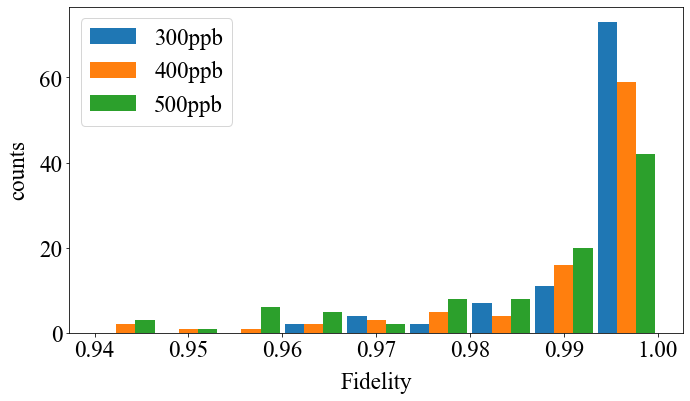

In [60]:
pathUni = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/"
pathMC = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/"
#dataCCE2250 = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Fidelityplotsprot/histogram250ppb/fid')
dataCCE2300 = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Fidelityplotsprot/histogram300ppb/fid')
dataCCE2400 = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Fidelityplotsprot/histogram400ppb/fid')
dataCCE2500 = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Fidelityplotsprot/histogram500ppb/fid')


bins = np.linspace(0.94, 1,10)
#ticks = np.linspace(0,5,9)
#plt.hist([dataCCE2250,dataCCE2300,dataCCE2350], bins,histtype = 'bar',rwidth = 0.92 ,label=['250ppb','300ppb','350ppb'] )
plt.hist([dataCCE2300,dataCCE2400,dataCCE2500], bins,histtype = 'bar',rwidth = 0.92 ,label=['300ppb','400ppb','500ppb'] )
#plt.hist(error, bins,histtype = 'bar',rwidth = 0.9 ,label=['gCCE0','gCCE2'] )
plt.legend(loc='upper left')

plt.xlabel("Fidelity",labelpad=10)
plt.ylabel("counts",labelpad=10)
#plt.xticks([0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99])
#plt.xticks([0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6])#,[ '0.95', '0.96','0.97','0.98','0.99','0.997'],rotation=-50,ha="left")
#plt.xticks(ticks)

plt.rcParams["figure.figsize"] = (11,6)
plt.rcParams.update({'font.size': 23})
ax.tick_params(axis='y', which='major', pad=-1)
plt.rcParams.update({'font.family':'Times New Roman'})
plt.savefig("histogramCCE2-twospins.svg",transparent=True)

<font size="5">Produce data</font>

In [48]:
def dataprog(t,rho,nameoffolder,pos,target,check):
    #create data
    gatecohC = timearraycoh(rho)
    log0 = entarray(rho,len(t))
    datalog= np.column_stack([t, log0])
    tarraycoh = timearraycoh(rho)
    datacoh= np.column_stack([t, tarraycoh])
    tarrayIx = timearrayIx(rho)
    dataIx= np.column_stack([t, tarrayIx])
    tarrayIz = timearrayIz(rho)
    dataIz= np.column_stack([t, tarrayIz])
    tarraySz = timearraySz(rho)
    dataSz= np.column_stack([t, tarraySz])
    tarraySx = timearraySx(rho)
    dataSx= np.column_stack([t, tarraySx])
    tarraySy = timearraySy(rho)
    dataSy= np.column_stack([t, tarraySy])
    tarrayF = timefidelity(rho,target)
    dataF = np.column_stack([t,tarrayF])
    if check == 0: #MAC
        os.mkdir('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/%s'%nameoffolder) #MAC
    #store data Sz
        datafileSz = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/%s/dataSz"%nameoffolder
        np.savetxt(datafileSz , dataSz)
    #store data Sx
        datafileSx = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/%s/dataSx"%nameoffolder
        np.savetxt(datafileSx , dataSx)
    #store data Sy
        datafileSy = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/%s/dataSy"%nameoffolder
        np.savetxt(datafileSy , dataSy)
    #store data Iz
        datafileIz = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/%s/dataIz"%nameoffolder
        np.savetxt(datafileIz , dataIz)
    #store data Ix
        datafileIx = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/%s/dataIx"%nameoffolder
        np.savetxt(datafileIx , dataIx)
    #store data log
        datafilelog = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/%s/datalog"%nameoffolder
        np.savetxt(datafilelog , datalog)
    #store data coh
        datafilecoh = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/%s/datacho"%nameoffolder
        np.savetxt(datafilecoh , datacoh)
    #store data fidelity
        datafilefid = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/%s/datafid"%nameoffolder
        np.savetxt(datafilefid , dataF)
        posArray = []
        for i in range(numberofspins):
            rb1 = pos[0][i]
            theta1 = pos[1][i]  
            phi1 =  pos[2][i] 
            rxx1 = rb1*np.sin(theta1)*np.cos(phi1)
            ryy1 = rb1*np.sin(theta1)*np.sin(phi1)
            rzz1 = rb1*np.cos(theta1)
            posArray.append([rxx1,ryy1,rzz1])
           # ax.scatter(rxx1,ryy1,rzz1)     
        posd = posArray
        posdata = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/%s/pos.txt"%nameoffolder
        np.savetxt(posdata , posd) 
        posdatasphere = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/%s/possp.txt"%nameoffolder
        np.savetxt(posdatasphere , pos) 
    elif check == 1 :
        os.mkdir('/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/%s'%nameoffolder)
    #store data Sz
        datafileSz = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/%s/dataSz"%nameoffolder
        np.savetxt(datafileSz , dataSz)
    #store data Sx
        datafileSx = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/%s/dataSx"%nameoffolder
        np.savetxt(datafileSx , dataSx)
    #store data Sy
        datafileSy = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/%s/dataSy"%nameoffolder
        np.savetxt(datafileSy , dataSy)
    #store data Iz
        datafileIz = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/%s/dataIz"%nameoffolder
        np.savetxt(datafileIz , dataIz)
    #store data Ix
        datafileIx = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/%s/dataIx"%nameoffolder
        np.savetxt(datafileIx , dataIx)
    #store data log
        datafilelog = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/%s/datalog"%nameoffolder
        np.savetxt(datafilelog , datalog)
    #store data coh
        datafilecoh = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/%s/datacho"%nameoffolder
        np.savetxt(datafilecoh , datacoh)
    #store data fidelity
        datafilefid = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/%s/datafid"%nameoffolder
        np.savetxt(datafilefid , dataF)
        posArray = []
        for i in range(numberofspins):
            rb1 = pos[0][i]
            theta1 = pos[1][i]  
            phi1 =  pos[2][i] 
            rxx1 = rb1*np.sin(theta1)*np.cos(phi1)
            ryy1 = rb1*np.sin(theta1)*np.sin(phi1)
            rzz1 = rb1*np.cos(theta1)
            posArray.append([rxx1,ryy1,rzz1])
           # ax.scatter(rxx1,ryy1,rzz1)     
        posd = posArray
        posdata = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/%s/pos.txt"%nameoffolder
        np.savetxt(posdata , posd) 
        posdatasphere = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/%s/possp.txt"%nameoffolder
        np.savetxt(posdatasphere , pos) 
    return 
    

def logarithmicneg(rho):
    newdim = rho
    newdim.dims = [[2,2],[2,2]]
    pt = partial_transpose(rho, [0,1], method='dense')
    tracenorm = pt.norm(norm='tr', sparse=False, tol=0, maxiter=100000)
    logneg = np.log2(tracenorm)
    return logneg


def entarray(rho,timepoints):
    eArray = []
    for i in range(timepoints):
        eArray.append(logarithmicneg(rho[i]))
    return eArray
        

def timearraySx(rho):
    gateArray0NV =[]
    SxNV = np.sqrt(1/2)*Qobj([[0,1],[1,0]])
    Iss = Qobj([[1,0],[0,1]])
    popNV = tensor(SxNV,Iss)
    for i in range(timepoints):
        g0nv = rho[i]
        popNV.dims = [[4],[4]]    
        SxcompNV = np.real((g0nv*popNV).tr())
        gateArray0NV.append(SxcompNV)
    gatenv= gateArray0NV
    return gatenv    

def timearraySy(rho):
    gateArray0NV =[]
    SyNV = 1/(np.sqrt(2)*j)*Qobj([[0,1],[-1,0]])
    Iss = Qobj([[1,0],[0,1]])
    popNV = tensor(SyNV,Iss)
    for i in range(timepoints):
        g0nv = rho[i]
        popNV.dims = [[4],[4]]    
        SxcompNV = np.real((g0nv*popNV).tr())
        gateArray0NV.append(SxcompNV)
    gatenv= gateArray0NV
    return gatenv  

def timearraySz(rho):
    gateArray0NV =[]
    SzNV = Qobj([[0,0],[0,-1]])
    Iss = Qobj([[1,0],[0,1]])
    popNV = tensor(SzNV,Iss)
    for i in range(timepoints):
        g0nv = rho[i]
        popNV.dims = [[4],[4]]    
        SzcompNV = np.real((g0nv*popNV).tr())
        gateArray0NV.append(SzcompNV)
    gatenv= gateArray0NV
    return gatenv
    
def timearrayIz(rho):
    tArrayIz = []
    Iz = 1/2*Qobj([[1,0],[0,-1]])
    Szzz = Qobj([[1,0],[0,1]])
    coh = tensor(Szzz,Iz)
    for i in range(timepoints):
        newdim = rho[i]
        newdim.dims = [[4],[4]]
        coh.dims = [[4],[4]]     
        ixcomp = np.real((newdim*coh).tr())
        tArrayIz.append(ixcomp)
    return  tArrayIz

def timearrayIx(rho):
    tArrayIx = []
    Ix = 1/2*Qobj([[0,1],[1,0]])
    Szzz = Qobj([[1,0],[0,1]])
    coh = tensor(Szzz,Ix)
    for i in range(timepoints):
        newdim = rho[i]
        newdim.dims = [[4],[4]]
        coh.dims = [[4],[4]]
        I1x.dims = [[4],[4]]        
        ixcomp = np.real((newdim*coh).tr())
        tArrayIx.append(ixcomp)
    return  tArrayIx 

def timearraycoh(rho):
    tArrayIx = []
    Icoh = Qobj([[0,1],[0,0]])
    Szzz = Qobj([[1,0],[0,1]])
    coh = tensor(Szzz,Icoh)
    for i in range(timepoints):
        newdim = rho[i]
        newdim.dims = [[4],[4]]
        coh.dims = [[4],[4]]
        I1x.dims = [[4],[4]]        
        ixcomp = np.abs((newdim*coh).tr())
        tArrayIx.append(ixcomp)
    return  tArrayIx 

def timefidelity(rho,target):
    tArrayIx = []
    for i in range(timepoints):
        newdim = rho[i]
        newdim.dims = [[4],[4]]
        target.dims = [[4],[4]]       
        fid = ((target.dag()*newdim).tr())/((target.dag()*target).tr())
        tArrayIx.append(fid)
    return  tArrayIx 



<font size="5">Run time evolution program</font>

In [100]:
%%time
#HERE TRY PLOT FOR NON DECOUPLING!!
#nodissipation

pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Newbathsnodec/possp.txt')
#no dis  GatesonC13/CCE2/posspno.txt'
target3 = Qobj([[1/2,0,0,1/2],[0,0,0,0],[0,0,0,0],[1/2,0,0,1/2]])
#timespace = 4.6238532110091734e-05
#timepoints = 1 #10
#t = np.linspace(4.6238532110091734e-05 ,timespace,timepoints)

timespace = 80*10**(-6)#(pent[0]+pent[1]+pent[2]+pent[3])*5#38*10**(-6)
#(pent[0]+pent[1]+pent[2]+pent[3])
timepoints = 400
t = np.linspace(0,timespace,timepoints)

#np.array([2.181818181818181442e-05 ])
# np.loadtxt('/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/Newbathsnodec/possp.txt')
dens0 = timearrayDM(rv1,numberofspins,pentnew,t,2,60*10**(-9),28*10**(-9),28*10**(-9),1e-7,'yes')
dataprog(t,dens0[2],'entanGate-nodec-new-new',pos,target3,0)

CPU times: user 6min 48s, sys: 1min 55s, total: 8min 44s
Wall time: 9h 2min 13s


In [98]:
pos = positions(numberofspins)
pentpro

[4.2767808e-07,
 1.73342078e-06,
 4.8728300000000006e-06,
 2.0215820299999997e-06,
 11.42342262,
 -0.60659784,
 -4.77631003,
 0.43448757,
 -2.03151781,
 1.45078329,
 4.23129291,
 5.6095651]

In [432]:
len(bathcheck(numberofspins,pos,22,22))/9

9.0

In [118]:
pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Newbathscorr/possp.txt')
bathCCE1 = bathchecknewCCE1(numberofspins,pos,55,55)
bathCCE2 = bathchecknewCCE2(numberofspins,pos,55,55)
bathCCE2

[[4, 5], [4, 6], [4, 8]]

In [52]:
timespace = 80*10**(-6)#(pent[0]+pent[1]+pent[2]+pent[3])*5#38*10**(-6)
#(pent[0]+pent[1]+pent[2]+pent[3])
timepoints = 3
t = np.linspace(0,timespace,timepoints)
#pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Newbathscorr/possp.txt')
#pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/posspno.txt')


In [55]:
%%time
pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Newbathscorr/possp.txt')
dens2 = timearrayDM(rv1,numberofspins,pentnew,t,0,110*10**(-9),55*10**(-9),55*10**(-9),1e-7,'yes')

dataprog(t,dens2[0],'entanGate-CCE0-new-dd',pos,target3,0) 
dataprog(t,dens2[1],'entanGate-CCE1-new-dd',pos,target3,0) 
dataprog(t,dens2[2],'entanGate-CCE2-new-dd',pos,target3,0) 

CPU times: user 932 ms, sys: 353 ms, total: 1.28 s
Wall time: 5.38 s


/var/folders/n0/ht9v1wc51jv0bjyv72hc1kd00000gn/T/ipykernel_82165/3938986771.py:110: RuntimeWarning: divide by zero encountered in log2
  logneg = np.log2(tracenorm)


In [169]:
pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Newbathscorr-DD-2/possp.txt')
#pos = positionsnodis(numberofspins)
te3 = averageDMpardec(rv1,numberofspins,pentpronew,1.6161e-06 ,2,110*10**(-9),55*10**(-9),55*10**(-9),1e-5,1000,0,1,'yes')
#te3[0]

In [170]:
logarithmicneg(te3[2])

0.4710755515564423

In [122]:
%%time
#pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Newbathscorr-DD-2/possp.txt')
pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/posspno.txt')
timespace = 40*10**(-6)#(pent[0]+pent[1]+pent[2]+pent[3])*5#38*10**(-6)
#(pent[0]+pent[1]+pent[2]+pent[3])
timepoints = 400
t = np.linspace(0,timespace,timepoints)
P1s = 'yes'
#pos = positionsnodis(numberofspins)
###############################Timearray for decoupling gate!#######################################
dens2DM = timearrayDMdecpar(rv1,numberofspins,pentpronew,t,0,50*10**(-9),34*10**(-9),34*10**(-9),1e-6,1000,Ezzlist,1,P1s)
dataprog(t,dens2DM[0],'nodis2',pos,target3,0) 
#dataprog(t,dens2DM[1],'entanGate-CCE1-hahn-1',pos,target3,0) 
#dataprog(t,dens2DM[2],'entanGate-CCE2-hahn-1',pos,target3,0) 
 #befor 3h 20min 52s
#dens2[2]

CPU times: user 1min 15s, sys: 37.2 s, total: 1min 52s
Wall time: 6min 13s


In [49]:
pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Newbathscorr-DD-2/possp.txt')
target3 = Qobj([[1/2,0,0,1/2],[0,0,0,0],[0,0,0,0],[1/2,0,0,1/2]])
P1s = 'yes'
timespace = 3.8787878787878783e-05 #40*10**(-6)#(pent[0]+pent[1]+pent[2]+pent[3])*5#38*10**(-6)
#(pent[0]+pent[1]+pent[2]+pent[3])
timepoints =2
t = np.linspace(3.676767676767676624e-05,timespace,timepoints)
#Ezzlist =0
#t = np.array([3.5151515151515144e-05,3.636363636363636e-05,3.757575757575757e-05,3.9595959595959594e-05]) 
#3.757575757575757041e-05 9.329695472468100270e-01

#pos = positionsnodis(numberofspins)
###############################Timearray for decoupling gate!#######################################
dens2DM3 = timearrayDMdecpar(rv1,numberofspins,pentpronew,t,2,50*10**(-9),34*10**(-9),34*10**(-9),1e-6,800,Ezzlist,1,P1s)
dataprog(t,dens2DM3[0],'entanGate-CCE0-hahn-1-t',pos,target3,0) 
dataprog(t,dens2DM3[1],'entanGate-CCE1-hahn-1-t',pos,target3,0) 
dataprog(t,dens2DM3[2],'entanGate-CCE2-hahn-1-t',pos,target3,0) 


In [339]:
%%time

#Decoupling Gate 25,40 #two
#dens2 = timearrayObsdecpar(rv1,numberofspins,pentpro,t,2,35*10**(-9),40*10**(-9),1e-7,200,Ezlist,5)
bathCCE1 = bathchecknewCCE1(numberofspins,pos,32,33)
bathCCE2 = bathchecknewCCE2(numberofspins,pos,32,32)
dens2 = timearrayObsdecpar(rv1,numberofspins,pentpro,t,2,bathCCE1,bathCCE2,1e-6,200,Ezlist,1,'Sx',target3)
datafile = "/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Sx-CCE2.txt"
datalog= np.column_stack([t, dens2[2]])
np.savetxt(datafile , datalog) 
#dataprog(t,dens2[2],'entanGate-CCE2-hahn2',pos,target3,0) 
 #befor 3h 20min 52st
    

CPU times: user 6.83 s, sys: 3.72 s, total: 10.6 s
Wall time: 1h 58min 57s


In [781]:
%%time
dens22 = timearrayDM(rv1,numberofspins,pent,t,2,70*10**(-9),70*10**(-9),1e-6)
dataprog(t,dens22,'entanGate-CCE2-2',pos,target3) 

CPU times: user 115 ms, sys: 9.54 ms, total: 124 ms
Wall time: 116 ms


In [489]:
%%time
dens2Sxx1 = timearraySxx(rv1,numberofspins,pent,t,2,90*10**(-9),50*10**(-9),1e-6)
#dataprog(t,dens2,'entanGate-CCE2',pos,target3) 

/tmp/ipykernel_1535856/731966197.py:51: RuntimeWarning: invalid value encountered in double_scalars
  Sxnorm = Sxarray[l]/Sx0#,out=densArray1[l],wher
/tmp/ipykernel_1535856/731966197.py:81: RuntimeWarning: invalid value encountered in double_scalars
  denom0 = (Sxarray[l]/Sx0*Sxarray[m])


CPU times: user 6h 30min 6s, sys: 17h 37min 55s, total: 1d 8min 2s
Wall time: 2h 25min 22s


In [490]:
%%time
dens2Sxx = timearraySxx(rv1,numberofspins,pent,t,2,55*10**(-9),50*10**(-9),1e-6)

/tmp/ipykernel_1535856/731966197.py:51: RuntimeWarning: invalid value encountered in double_scalars
  Sxnorm = Sxarray[l]/Sx0#,out=densArray1[l],wher
/tmp/ipykernel_1535856/731966197.py:81: RuntimeWarning: invalid value encountered in double_scalars
  denom0 = (Sxarray[l]/Sx0*Sxarray[m])


CPU times: user 13h 29min 26s, sys: 1d 16h 6min 9s, total: 2d 5h 35min 36s
Wall time: 5h 23min 1s


In [2314]:
#testfunctions!

In [493]:

#%%time
#dens2Sx = timearraySxx(rv1,numberofspins,pigate,t,2,400*10**(-9),140*10**(-9),1e-6)
nameoffolder = 'newSx2'
dataSxx2= np.column_stack([t, dens2Sxx])
os.mkdir('/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/%s'%nameoffolder)
datafileSx2 = "/home/dominikmaile/Nextcloud/programs/GatesonC13/CCE2/%s/dataSxx1"%nameoffolder
np.savetxt(datafileSx2 , dataSxx2)

<font size="5">GATE SEQUENCES</font>

In [798]:
lit = [1,2,3,4]
lit.insert(0,0)
lit
(tgphigC[0]+tgphigC[1]+tgphigC[2]+tgphigC[3]+tgphigC[4]+tgphigC[5]+tgphigC[6])*10**(-6)
sum(tg[:7])

2.671220949e-05

In [920]:
SEQdecoptnew(rv1,rv2(0),rv2(1),numberofspins,Ezz[0],Ezz[1],tgphigH2,2.09e-06,0,1,0)

7

In [857]:
%%time
Ezz = [bathstate(numberofspins),p1state(numberofspins,'no','no')]
tg = [tgphigC[0]*10**(-6),tgphigC[1]*10**(-6),tgphigC[2]*10**(-6),tgphigC[3]*10**(-6),tgphigC[4]*10**(-6),tgphigC[5]*10**(-6),tgphigC[6]*10**(-6)]
phig = [tgphigC[7],tgphigC[8],tgphigC[9],tgphigC[10],tgphigC[11],tgphigC[12]]
phag = [tgphigC[13],tgphigC[14],tgphigC[15],tgphigC[16],tgphigC[17],tgphigC[18]]
CCE = 0
initialize(CCE)
kl = 0
km = 1
Nzz = Nzz_NV(numberofspins,kl,km)
NzzC13 = Nzz_C13(rv1,numberofspins,kl,km)
LzzP1  = Lzz_P1(rv2(0),numberofspins,kl,km)
LzzP2 = Lzz_P2(rv2(1),numberofspins,kl,km)

#fidelityentSEQ(rv1,numberofspins,Ezz,tg,phig,phag)
(SEQdecoptnew(rv1,rv2(0),rv2(1),numberofspins,Ezz[0],Ezz[1],tgphigC,sum(tg[:7]),0,1,0)-
SEQdecopt(rv1,rv2(0),rv2(1),numberofspins,Ezz[0],Ezz[1],tg,phig,phag,sum(tg[:7]),0,1,1))

CPU times: user 38.9 ms, sys: 1.59 ms, total: 40.5 ms
Wall time: 40.5 ms


Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+0.00000000e+00j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
  0.+1.45477935e-11j]
 [0.+0.00000000e+00j 0.+0.00000000e+00j 0.+1.45477796e-11j
  0.+0.00000000e+00j]]

In [921]:
#tgphigH = [ 2.95974013,  2.75049269,  5.40294187,  4.9232643 ,  4.04203085,
#        2.48230969,  1.25248476,  0.41248248,  0.03471843,  0.02422345,
#       -0.30786693,  2.4275385 ,  2.69863339,  1.88767347,  1.66584826,
#        3.05376329,  1.14525667,  1.81117059,  1.288439  ]
#(r00,r11,r22,number,E,E2,pulse,t,kl,km,dec)

def SEQdecoptnew(r00,r11,r22,number,E,E2,pulse,t,kl,km,dec):
    phi = []
    pha = []
    #use that times and number of parameters depend on each other
    ntime =int(1 + (len(pulse)-1)/3)
    nphi = int((len(pulse)-1)/3 )
    npha = int((len(pulse)-1)/3 )
    ti = np.zeros(ntime)
    phi = np.zeros(nphi)
    pha = np.zeros(npha)
    
    rotpi = rot(np.pi,0)
    
    for i in range(ntime):
        ti[i] = pulse[i]*10**(-6)
        til = ti.tolist() 
        
    for i in range(ntime,nphi+ntime):
        phi[i-(ntime)] = pulse[i]
        phil = phi.tolist()
        phil.insert(0,0)
        phil.append(0)
        
    for i in range(nphi+ntime,npha+nphi+ntime):
        pha[i-(nphi+ntime)] = pulse[i]
        phal = pha.tolist()
        phal.insert(0,0)
        phal.append(0)
        
    u = 0
    tttest= sum(til)
    for i in range(len(til)):
        tte = sum(til[:i+1])
        if t >= tte:
            u = i+1 # number of pulses

            
    di = Htot(r00,r11,r22,number,E,kl,km,E2).eigenstates()
    en = di[0]
    st = di[1]
    uniarray = []
    if u == 0 : 
        unit = Unitary2(en,st,t)
        uniarray.append(unit)
    else:
        for i in range(u):
            if i == 0: 
                unith = Unitary2(en,st,til[i])
                unit =  unith
                uniarray.append(unit) ###calculates an array of necessary unitaries.
            else:
                unith = Unitary2(en,st,til[i]/2)
                unit =  unith * rotpi * unith
                uniarray.append(unit) ###calculates an array of necessary unitaries.
        
        tte2 = sum(til[:u])
        if u < len(til):
            if (t-tte2) <= til[u]/2: 
                unitt = Unitary2(en,st,t-tte2)
                uniarray.append(unitt)
            elif  0 <= (t-tte2-til[u]/2) :
                unitt = Unitary2(en,st,t-tte2-til[u]/2) * rotpi * Unitary2(en,st,til[u]/2)
                uniarray.append(unitt) ##NEWPART CONTINUE!
        elif  u == len(til):
            if t == tte2:
                unitt = Qobj(np.identity(4))
            else:
                unitt = Unitary2(en,st,(t-tte2)/2)*rotpi*Unitary2(en,st,(t-tte2)/2)
                uniarray.append(unitt)
        
                #here: decoupling after pulses!
       
    beg = Qobj(np.identity(4))

    for i in range(len(uniarray)):
         beg =  (uniarray[i] * rot(phil[i],phal[i])) * beg

            
    return  beg 

#SEQdecoptnew(tgphigH,24*10**(-6))

#sum(tgphigH[:7])

In [922]:
def SEQdecopt(r00,r11,r22,number,E,E2,tg,phig,phag,t,kl,km,dec):
    t0 = tg[0]
    t1 = tg[1]
    t2 = tg[2]
    t3 = tg[3]
    t4 = tg[4]
    t5 = tg[5]
    t6 = tg[6]
    phi0 = phig[0]
    phi1 = phig[1]
    phi2 = phig[2]
    phi3 = phig[3]
    phi4 = phig[4]
    phi5 = phig[5]
    pha0 = phag[0]
    pha1 = phag[1]
    pha2 = phag[2]
    pha3 = phag[3]
    pha4 = phag[4]
    pha5 = phag[5]

    rotpi = rot(np.pi,0) 

    di = Htot(r00,r11,r22,number,E,kl,km,E2).eigenstates()
    en = di[0]
    st = di[1]
    if t < t0:
        fer =  Unitary2(en,st,t)
    elif t0 <= t < (t0+t1/2): ##Continue here!
        U0 = Unitary2(en,st,t0)
        fer =   (Unitary2(en,st,(t-t0)) )* rot(phi0,pha0) * U0
    elif (t0+t1/2) <= t < (t0+t1):
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        #
        fer =   (Unitary2(en,st,(t-t0-t1/2))* rotpi * U1 ) * rot(phi0,pha0) *  U0
        #
    elif (t0+t1) <= t < (t0+t1+t2/2):
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        fer = ( Unitary2(en,st,t-t1-t0)*  rot(phi1,pha1) *
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0  )
        #
    elif (t0+t1+t2/2) <= t < (t0+t1+t2):
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        U2 = Unitary2(en,st,t2/2)
        #
        fer = ( (Unitary2(en,st,t-t2/2-t1-t0) * rotpi * U2 ) * rot(phi1,pha1) *
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0   )
        #
    elif (t0+t1+t2) <= t < (t0+t1+t2+t3/2):
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        U2 = Unitary2(en,st,t2/2)#####HEREE!!!!
        #
        fer =(Unitary2(en,st,(t-t2-t1-t0)) * rot(phi2,pha2)*
                (U2 * rotpi * U2) * rot(phi1,pha1) * 
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        #
    elif (t0+t1+t2+t3/2) <= t < (t0+t1+t2+t3) :
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        U2 = Unitary2(en,st,t2/2)
        U3 = Unitary2(en,st,t3/2)
        #
        fer =((Unitary2(en,st,(t-t3/2-t2-t1-t0)) * rotpi * U3) * rot(phi2,pha2) *
                (U2 * rotpi * U2) * rot(phi1,pha1) * 
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0)
        #
    
    elif (t0+t1+t2+t3) <= t < (t0+t1+t2+t3+t4/2):
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        U2 = Unitary2(en,st,t2/2)#####HEREE!!!!
        U3 = Unitary2(en,st,t3/2)
        #
        fer =(Unitary2(en,st,(t-t3-t2-t1-t0)) * rot(phi3,pha3)*
                (U3 * rotpi * U3) * rot(phi2,pha2) *
                (U2 * rotpi * U2) * rot(phi1,pha1) * 
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        #
    elif (t0+t1+t2+t3+t4/2) <= t < (t0+t1+t2+t3+t4) :
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        U2 = Unitary2(en,st,t2/2)
        U3 = Unitary2(en,st,t3/2)
        U4 = Unitary2(en,st,t4/2)
        #
        fer =((Unitary2(en,st,(t-t4/2-t3-t2-t1-t0)) * rotpi * U4) * rot(phi3,pha3) *
                (U3 * rotpi * U3) * rot(phi2,pha2) *
                (U2 * rotpi * U2) * rot(phi1,pha1) * 
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0)
        
    elif (t0+t1+t2+t3+t4) <= t < (t0+t1+t2+t3+t4+t5/2):
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        U2 = Unitary2(en,st,t2/2)#####HEREE!!!!
        U3 = Unitary2(en,st,t3/2)
        U4 = Unitary2(en,st,t4/2)
        
        
        fer =(Unitary2(en,st,(t-t4-t3-t2-t1-t0)) * rot(phi4,pha4)*
                (U4 * rotpi * U4) * rot(phi3,pha3) *              
                (U3 * rotpi * U3) * rot(phi2,pha2) *
                (U2 * rotpi * U2) * rot(phi1,pha1) * 
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        
    elif (t0+t1+t2+t3+t4+t5/2) <= t < (t0+t1+t2+t3+t4+t5) :
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        U2 = Unitary2(en,st,t2/2)
        U3 = Unitary2(en,st,t3/2)
        U4 = Unitary2(en,st,t4/2)
        U5 = Unitary2(en,st,t5/2)
        
        fer =((Unitary2(en,st,(t-t5/2-t4-t3-t2-t1-t0)) * rotpi * U5) * rot(phi4,pha4) *
                (U4 * rotpi * U4) * rot(phi3,pha3) *
                (U3 * rotpi * U3) * rot(phi2,pha2) *
                (U2 * rotpi * U2) * rot(phi1,pha1) * 
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0)

        
    elif (t0+t1+t2+t3+t4+t5) < t <= (t0+t1+t2+t3+t4+t5+t6/2):
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        U2 = Unitary2(en,st,t2/2)#####HEREE!!!!
        U3 = Unitary2(en,st,t3/2)
        U4 = Unitary2(en,st,t4/2)
        U5 = Unitary2(en,st,t5/2)
        
        
        fer =(Unitary2(en,st,(t-t5-t4-t3-t2-t1-t0)) * rot(phi5,pha5)*
                (U5 * rotpi * U5) * rot(phi4,pha4) *
                (U4 * rotpi * U4) * rot(phi3,pha3) *              
                (U3 * rotpi * U3) * rot(phi2,pha2) *
                (U2 * rotpi * U2) * rot(phi1,pha1) * 
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        
    elif (t0+t1+t2+t3+t4+t5+t6/2) < t <= (t0+t1+t2+t3+t4+t5+t6) :
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        U2 = Unitary2(en,st,t2/2)
        U3 = Unitary2(en,st,t3/2)
        U4 = Unitary2(en,st,t4/2)
        U5 = Unitary2(en,st,t5/2)
        U6 = Unitary2(en,st,t6/2)
        
        fer =((Unitary2(en,st,(t-t6/2-t5-t4-t3-t2-t1-t0)) * rotpi * U6) * rot(phi5,pha5) *
                (U5 * rotpi * U5) * rot(phi4,pha4) *
                (U4 * rotpi * U4) * rot(phi3,pha3) *              
                (U3 * rotpi * U3) * rot(phi2,pha2) *
                (U2 * rotpi * U2) * rot(phi1,pha1) * 
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        
        
    
        
    elif (t0+t1+t2+t3+t5+t6) < t :
        U0 = Unitary2(en,st,t0)
        U1 = Unitary2(en,st,t1/2)
        U2 = Unitary2(en,st,t2/2)
        U3 = Unitary2(en,st,t3/2)
        U4 = Unitary2(en,st,t4/2)
        U5 = Unitary2(en,st,t5/2)
        U6 = Unitary2(en,st,t6/2)
        if dec == 1:
            halfU = Unitary2(en,st,(t-t6-t5-t4-t3-t2-t1-t0)/2)
            lastU = halfU * rotpi * halfU
            fer = ( lastU *
                (U6 * rotpi * U6) * rot(phi5,pha5) *
                (U5 * rotpi * U5) * rot(phi4,pha4) *
                (U4 * rotpi * U4) * rot(phi3,pha3) *              
                (U3 * rotpi * U3) * rot(phi2,pha2) *
                (U2 * rotpi * U2) * rot(phi1,pha1) * 
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        elif dec == 3:
            quadU = Unitary2(en,st,(t-t6-t5-t4-t3-t2-t1-t0)/4)
            lastU =   quadU * rotpi * quadU * rotpi * quadU * rotpi * quadU  ####Change back
            fer = ( lastU *
                (U6 * rotpi * U6) * rot(phi5,pha5) *
                (U5 * rotpi * U5) * rot(phi4,pha4) *
                (U4 * rotpi * U4) * rot(phi3,pha3) *              
                (U3 * rotpi * U3) * rot(phi2,pha2) *
                (U2 * rotpi * U2) * rot(phi1,pha1) * 
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
        elif dec == 5:
            sixU = Unitary2(en,st,(t-t6-t5-t4-t3-t2-t1-t0)/6)
            lastU =  sixU * rotpi * sixU * rotpi * sixU * rotpi * sixU * rotpi * sixU * rotpi * sixU  ####Change back
            fer = ( lastU *
                (U6 * rotpi * U6) * rot(phi5,pha5) *
                (U5 * rotpi * U5) * rot(phi4,pha4) *
                (U4 * rotpi * U4) * rot(phi3,pha3) *              
                (U3 * rotpi * U3) * rot(phi2,pha2) *
                (U2 * rotpi * U2) * rot(phi1,pha1) * 
                (U1 * rotpi * U1) * rot(phi0,pha0) * U0) 
            
    if CCE == 2:
        fer.dims = [[16],[16]]
    if CCE == 1:
        fer.dims = [[8],[8]]
    elif CCE ==0:
        fer.dims = [[4],[4]]
    return fer#.tidyup(atol=1e-5)

In [923]:

pos = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/posspno.txt')


#Here we have to deal with the bath state of the strongly coupled P1 - Spin!


def initialC(l,m):
    if CCE == 2:
        init = tensor(initialNV,tensor(initialC13, tensor(initialP1(l),initialP1(m))))#the initial state is now 16 dimensional
        init.dims = [[16],[1]]
    if CCE == 1:
        init = tensor(initialNV,tensor(initialC13, initialP1(l)))  #the initial state needs to be 8 dimensional!
        init.dims = [[8],[1]]
    elif CCE ==0:
        init = tensor(initialNVC,initialC13C)  #the initial state needs to be 8 dimensional!
        init.dims = [[4],[1]]
    return init

Ezz = [bathstate(numberofspins),p1state(numberofspins,'no','no')]
tg = [tgphigC[0]*10**(-6),tgphigC[1]*10**(-6),tgphigC[2]*10**(-6),tgphigC[3]*10**(-6),tgphigC[4]*10**(-6),tgphigC[5]*10**(-6),tgphigC[6]*10**(-6)]
phig = [tgphigC[7],tgphigC[8],tgphigC[9],tgphigC[10],tgphigC[11],tgphigC[12]]
phag = [tgphigC[13],tgphigC[14],tgphigC[15],tgphigC[16],tgphigC[17],tgphigC[18]]
CCE = 0
initialize(CCE)
kl = 0
km = 1
Nzz = Nzz_NV(numberofspins,kl,km)
NzzC13 = Nzz_C13(rv1,numberofspins,kl,km)
LzzP1  = Lzz_P1(rv2(0),numberofspins,kl,km)
LzzP2 = Lzz_P2(rv2(1),numberofspins,kl,km)
t0 = tg[0]
t1 = tg[1]
t2 = tg[2]
t3 = tg[3]
t4 = tg[4]
t5 = tg[5]
t6 = tg[6]

##TEST
initialNVC = 1/np.sqrt(2)*( Qobj(basis(2,0)) +Qobj(basis(2,1)))
initialC13C = Qobj(basis(2,0))

st1 = initialC(0,1)


intstate = st1*st1.dag()

thada = 1/np.sqrt(2)*Qobj([[1,1],[1,-1]])
identi = Qobj([[1,0],[0,1]])

targetH = tensor(identi,thada)
targetH.dims = [[4],[4]]

targetCNOT = Qobj([[1/2,0,0,1/2],[0,0,0,0],[0,0,0,0],[1/2,0,0,1/2]])
#targetCNOT = Qobj([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,1]])

#CNOT  =  SEQdecopt(rv1,rv2(0),rv2(1),numberofspins,Ezz[0],Ezz[1],tg,phig,phag,(t0+t1+t2+t3+t4+t5+t6),0,1,1)
CNOT  =  SEQdecoptnew(rv1,rv2(0),rv2(1),numberofspins,Ezz[0],Ezz[1],tgphigH2,sum(tgphigH2[:8])*10**(-6),0,1,1)



finalst = CNOT*intstate*CNOT.dag()

ttar = targetCNOT

fidde= (finalst.dag()*ttar).tr()/(ttar.dag()*ttar).tr()



#CNOT

#t0+t1+t2+t3+t4+t5+t6
#sum(tgphigC[:7])
fidde

CNOT

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[-0.05310616+0.65915523j -0.53293754+0.11773291j  0.38400239-0.20507091j
  -0.22703084+0.154129j  ]
 [-0.21806561-0.14056595j -0.22162303+0.73798946j  0.14609023+0.34093033j
   0.21913594-0.39159544j]
 [-0.51846221+0.27967747j  0.06997554+0.24101352j -0.7180369 -0.02767999j
  -0.13608136+0.23480214j]
 [-0.03427088-0.38364786j -0.00293497+0.2130226j   0.23895694+0.31538651j
  -0.39050884+0.70511443j]]

In [54]:
# to calculate the gate sequences!

targetHonC13 = Qobj([[0,0,0,0],[0,1,0,0],[0,0,0,0],[0,0,0,0]])
stateC13 = Qobj([[1,0],[0,0]])
targetC13 = stateC13*stateC13.dag()
stateHonNV = 1/np.sqrt(2)*(basis(2,0)+basis(2,1))
targetHonNV = stateHonNV*stateHonNV.dag()
target2 = tensor(targetHonNV,targetC13)
target2.dims = [[4],[4]]
target3 = Qobj([[1/2,0,0,1/2],[0,0,0,0],[0,0,0,0],[1/2,0,0,1/2]])

def fidelityent(rv1,numberofspins,Ezz,tg,phig,phag):
    t0 = tg[0]
    t1 = tg[1]
    t2 = tg[2]
    t3 = tg[3]
    re = reduceddensitymatrix(rv1,rv2(0),rv2(1),numberofspins,Ezz,tg,phig,phag,t0+t1+t2+t3,0,1,1e-7).tidyup(atol=1e-10)
    re.dims=[[4],[4]]
    fid = ((target3.dag()*re).tr())/((target3.dag()*target3).tr())
    
    return fid



def fidelityentSEQ(rv1,numberofspins,Ezz,tg,phig,phag):
    t0 = tg[0]
    t1 = tg[1]
    t2 = tg[2]
    t3 = tg[3]
    t4 = tg[4]
    t5 = tg[5]
    t6 = tg[6]
    re = SEQdecopt(rv1,rv2(0),rv2(1),numberofspins,Ezz[0],Ezz[1],tg,phig,phag,t0+t1+t2+t3+t4+t5+t6,0,1,1)
    #re = reduceddensitymatrix(rv1,rv2(0),rv2(1),numberofspins,Ezz,tg,phig,phag,t0+t1+t2+t3,0,1,1e-7).tidyup(atol=1e-10)
    re.dims=[[4],[4]]
    targett = Qobj([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
    #targett = targetH
    fid = ((targett.dag()*re).tr())/((targett.dag()*targett).tr())
    
    
    return np.real(fid)



def fidelityentSEQnew(rv1,numberofspins,Ezz,tgphig):
    ntime =int(1 + (len(tgphig)-1)/3)
    tsum = 0
    for i in range(ntime):
        tsum = tsum + tgphig[i]*10**(-6)
    #tim = sum(tgphig[:7])*10**(-6)
    re = SEQdecoptnew(rv1,rv2(0),rv2(1),numberofspins,Ezz[0],Ezz[1],tgphig,tsum,0,1,1)
    #re = reduceddensitymatrix(rv1,rv2(0),rv2(1),numberofspins,Ezz,tg,phig,phag,t0+t1+t2+t3,0,1,1e-7).tidyup(atol=1e-10)
    re.dims=[[4],[4]]
    #targett = Qobj([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
    targett = targetH
    fid = ((targett.dag()*re).tr())/((targett.dag()*targett).tr())
    
    return np.real(fid)

#define function to optimize
def func(to,rv1,numberofspins, Ezz):
    if to[0]>0 and to[1] > 0:
        test1 = 1-fidelity(rv1,numberofspins,Ezz,to[0],to[1])
    else:
        test1 = [100,100]
    return test1

#define function to optimize
def funcent(tgphig,rv1,numberofspins, Ezz):
    tg = [tgphig[0]*10**(-6),tgphig[1]*10**(-6),tgphig[2]*10**(-6),tgphig[3]*10**(-6)]
    phig = [tgphig[4],tgphig[5],tgphig[6],tgphig[7]]
    phag = [tgphig[8],tgphig[9],tgphig[10],tgphig[11]]
    if (tg[0]>0 and tg[1] > 0 and tg[2] > 0 and tg[3] > 0):
        test1 = 1-fidelityent(rv1,numberofspins,Ezz,tg,phig,phag)
    else:
        test1 = 1000#[100,100]
    return test1

#
def funcentSEQ(tgphig,rv1,numberofspins,Ezz):
    tg = [tgphig[0]*10**(-6),tgphig[1]*10**(-6),tgphig[2]*10**(-6),tgphig[3]*10**(-6),tgphig[4]*10**(-6),tgphig[5]*10**(-6),tgphig[6]*10**(-6)]
    phig = [tgphig[7],tgphig[8],tgphig[9],tgphig[10],tgphig[11],tgphig[12]]
    phag = [tgphig[13],tgphig[14],tgphig[15],tgphig[16],tgphig[17],tgphig[18]]
    if (tg[0]>0 and tg[1] > 0 and tg[2] > 0 and tg[3] > 0 and tg[4] > 0 and tg[5] > 0 and tg[6] > 0 ):
        test1 = 1-fidelityentSEQ(rv1,numberofspins,Ezz,tg,phig,phag)
    else:
        test1 = 1000#[100,100]
    return test1


#define function to optimize
def funcentSEQnew(tgphig,rv1,numberofspins,Ezz):
    #tg = [tgphig[0]*10**(-6),tgphig[1]*10**(-6),tgphig[2]*10**(-6),tgphig[3]*10**(-6),tgphig[4]*10**(-6),tgphig[5]*10**(-6),tgphig[6]*10**(-6)]
    ntime =int(1 + (len(tgphig)-1)/3)
    tg = tgphig[:ntime]
    if all(x > 0 for x in tg) :
    #if (tg[0]>0 and tg[1] > 0 and tg[2] > 0 and tg[3] > 0 and tg[4] > 0 and tg[5] > 0 and tg[6] > 0 ):
        test1 = 1-fidelityentSEQnew(rv1,numberofspins,Ezz,tgphig)
    else:
        test1 = 1000#[100,100]
    return test1

def callbackf(x,f,accept):
    if f < 10**(-5):
        result = True
    else:
        result = False
    return result

def print_fun(x,f,accepted):
        print(["at minima %.4f accepted %d"%(f,int(accepted)),x])

def timerootsSEQ(rv1,numberofspins,Ezz,tgphig):
    #rd = np.sqrt(r2[0]**2+r2[1]**2+r2[2]**2)
    res = scipy.optimize.basinhopping(funcentSEQnew,tgphig,minimizer_kwargs={"method": "L-BFGS-B", "args":(rv1,numberofspins,Ezz)},niter=1000,T=0.001,stepsize = 0.0001,callback = print_fun,disp = True)
    return res
#

def timeroots(rv1,numberofspins,Ezz,tgphig):
    #rd = np.sqrt(r2[0]**2+r2[1]**2+r2[2]**2)
    res = scipy.optimize.basinhopping(funcent,tgphig,minimizer_kwargs={"method": "L-BFGS-B", "args":(rv1,numberofspins,Ezz)},niter=200,T=0.1,stepsize = 0.1)
    return res
#ret = basinhopping(func, x0, minimizer_kwargs=minimizer_kwargs,
#...                    niter=200)

#
def time(r00,number,E):
    tim = timeroots(r00,number, E)
    t1 = tim.__getitem__('x')[0]
    t2 = tim.__getitem__('x')[1]
    #t3 = tim.__getitem__('x')[2]
    #t4 = tim.__getitem__('x')[3]
    phig1 = tim.__getitem__('x')[2]
    phig2 = tim.__getitem__('x')[3]
    #phig3 = tim.__getitem__('x')[6]
    #phig4 = tim.__getitem__('x')[7]
    phag1 = tim.__getitem__('x')[4]
    phag2 = tim.__getitem__('x')[5]
    #phag3 = tim.__getitem__('x')[10]
    #phag4 = tim.__getitem__('x')[11]
    res = tim.__getitem__('fun')
    return [t1 ,t2, phig1,phig2,phag1,phag2,res]

tgphig = [ 5.01144375, 14.54532022, 12.64579981,  4.77249652,  5.02288801,
        5.93784606,  6.69369619,  0.02273749,  4.71081365,  4.76312051,
       -4.87273907,  1.17084994,  3.68006501]

tgphig2 = [ 1.14099873,  0.88893569, 11.49388998,  8.4303473 ,  3.98048722,
        6.44081719,  6.21661269,  6.27554587, 12.6369499 , -0.18477026,
       -6.02038476,  4.55389513,  6.0807136 ]

tgphigS =[ 5.10922448,  0.73821902,  0.09034704,  6.33186665,  6.80946964,
        0.42433229,  5.36723455,  2.57193696,  3.07012726, -0.60120609,
        0.42534881,  2.77793522,  2.33719808] #best so far! Sequence opt

tgphigH = [ 2.95080655,  2.80615085,  5.49000861,  4.93932465,  4.07889555,
        2.51726498,  1.28087441,  0.39692805,  0.02556202,  0.02581293,
       -0.26783164,  2.44956593,  2.73463285,  1.92989816,  1.72555202,
        3.04261177,  1.12583016,  1.85315529,  1.2697355 ] #HADAMARD GATE C!§

tgphigH2 =[ 1.47607235,  4.16613595,  3.84013825,  6.64267631,  3.39364688,
        3.02435862,  1.11747518,  0.90700407,  1.04791719, -0.09384345,
       -0.05074526, -0.70259278, -0.08021636,  3.21889705,  1.05198333,
        2.40814655,  2.68391685,  0.2271253 ,  0.87579719,  0.82465341,
        0.47185193, -0.18872675]

In [964]:
tgphig16best = [ 5.93215133,  1.71923864,  0.44408374,  4.36709751,  7.18910774,
        1.13768901,  0.3472985 ,  5.33305118,  2.48724434,  3.18604293,
        3.03530044, -0.61268944,  0.4954358 ,  2.78396946,  2.36837899,
        1.58475222]

tgphig16best2 = [6.84526282, 1.83898353, 1.70472552, 3.20941889, 6.23124171,
       0.72805551, 0.14555859, 5.42195956, 2.2592894 , 3.03520721,
       3.29634309, 2.77591101, 0.27500273, 2.88143973, 2.25220806,
       1.61347709]

tgphig16 = [ 3.18966125,  3.3010035 ,  2.94304414,  3.1025782 ,  3.31175446,
        0.23299828,  1.57265331,  2.5786682 ,  3.41349762,  2.50164058,
        4.79962723,  3.48000814, -2.43521274, -0.37077461,  1.79366089,
        2.2678483 ]

tgphigC = [ 1.84752571,  0.47288362,  5.88293291,  0.2384526 ,  5.79340108,
        1.9254067 , 10.55160687,  2.30876636, -0.29199426,  1.47757437,
        0.95290682,  2.3219625 ,  3.17191201, -1.78787007, -2.77025358,
       -2.23858052,  2.09995151, -2.25747705, -2.71279434]#CNOT GATE

In [ ]:
%%time
timeing = timerootsSEQ(rv1,numberofspins,Ezz,tgphigH2)
timeing

basinhopping step 0: f 0.00112988
['at minima 0.0011 accepted 1', array([ 1.47607235,  4.16613595,  3.84013825,  6.64267631,  3.39364688,
        3.02435862,  1.11747518,  0.90700407,  1.04791719, -0.09384345,
       -0.05074526, -0.70259278, -0.08021636,  3.21889705,  1.05198333,
        2.40814655,  2.68391685,  0.2271253 ,  0.87579719,  0.82465341,
        0.47185193, -0.18872675])]
basinhopping step 1: f 0.00112939 trial_f 0.00112939 accepted 1  lowest_f 0.00112939
found new global minimum on step 1 with function value 0.00112939
['at minima 0.0011 accepted 1', array([ 1.47607235,  4.16621547,  3.84011403,  6.64263104,  3.39365695,
        3.02426336,  1.11754391,  0.90701051,  1.04789287, -0.09382   ,
       -0.05068968, -0.70261944, -0.08022216,  3.21889064,  1.05207115,
        2.40805985,  2.68399383,  0.22713813,  0.87576697,  0.82465178,
        0.47179493, -0.18870969])]
basinhopping step 2: f 0.0011318 trial_f 0.0011318 accepted 1  lowest_f 0.00112939
['at minima 0.0011 acc

<font size="5">Benchmarking</font>

In [179]:
def Batharray(numberofspins,baths):
   # global TP1,numberofspins,rb,rxx,ryy,rzz,dis,theta,phi,pos
    bathArray = []
    os.mkdir('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/baths-new')
    #TP1 = Vol*nanzahl*p1p
   # rb = np.linspace(0,numberofspins-1,numberofspins)
   # rxx = np.linspace(0,numberofspins-1,numberofspins)
   # ryy = np.linspace(0,numberofspins-1,numberofspins)
   # rzz = np.linspace(0,numberofspins-1,numberofspins)
   # dis = np.linspace(0,numberofspins-1,numberofspins)
   # theta = np.linspace(0,numberofspins-1,numberofspins)
   # phi = np.linspace(0,numberofspins-1,numberofspins)
    for i in range(baths):
        pos = positions(numberofspins)
        bathArray.append(pos)
        datafile = '/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/baths-new/bathfile-%s'%i
        np.savetxt(datafile , bathArray[i])
    #p1pArray = np.full( fidpoints, p1p)
    #res1 = np.array(fidArrayDM).flatten()
    #fidres =  np.column_stack([p1pArray*10**9,res1])   
    return 

In [187]:
Batharray(9,100)

In [808]:
def resultstable(timepoint,gate,number,bathnumber,CCE,r1,r2):
    global pos, rv1
    numberofspins = number
    resultArray0 = []
    resultArray2 = []
    nodiss= np.load('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/bathfile-nodiss-%s.npy'%timepoint)
    target = Qobj(nodiss)
    for i in range(bathnumber):
        pos= np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/baths-new/bathfile-%s'%i)
        #pos = batharray[i]
        #redent = averageDM(rv1,number,gate,timepoint*10**(-6),CCE,r1*10**(-9),r2*10**(-9),1e-6)
        redent = averageDM(rv1,number,gate,timepoint*10**(-6),CCE,r1*10**(-9),r2*10**(-9),1e-6)
        #logar = logarithmicneg(redent[0])
        fidCCE0 = ((target.dag()*redent[0]).tr())/((target.dag()*target).tr())
        fidCCE2 = ((target.dag()*redent[2]).tr())/((target.dag()*target).tr())
        fidCCE02 = np.real(fidCCE0)
        fidCCE22 = np.real(fidCCE2)
        resultArray0.append(fidCCE02)
        resultArray2.append(fidCCE22)
    return [resultArray0,resultArray2]



def Bigbathcheck(number,r1,r2,bathnumber):
    global pos, rv1
    numberofspins = number
    resultArray = []
    nodiss= np.load('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/bathfile-nodiss.npy')
    target = Qobj(nodiss)
    for i in range(bathnumber):
        pos= np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/baths-new/bathfile-%s'%i)
        check = len(bathcheck(number,pos,r1,r2))/9
        #pos = batharray[i]
        #redent = averageDM(rv1,number,gate,timepoint,CCE,60*10**(-9),65*10**(-9),1e-6)
        #logar = logarithmicneg(redent[0])
        #fid = ((target.dag()*redent[0]).tr())/((target.dag()*target).tr())
        #fid2 = np.real(fid)
        resultArray.append(check)
    return resultArray

In [947]:
#Bigbathcheck(numberofspins,40,45,100 )

In [995]:
%%time
timepoint= 20 #in \mu s
bathnumbers = 100
CCE02 = resultstable(timepoint,pent,9,bathnumbers,2,40,45)
os.mkdir('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/gCCE2array-%s'%timepoint)
datafilegcce2 = '/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/gCCE2array-%s/gcce2'%timepoint
np.savetxt(datafilegcce2 , CCE02)

CPU times: user 6h 52min 22s, sys: 7h 17min 57s, total: 14h 10min 19s
Wall time: 4h 45min 24s


In [883]:
%%time
timepoint= 65#\mu s
bathnumbers = 100
CCE00 = resultstable(timepoint,pent,9,bathnumbers,0,50,55)
os.mkdir('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/gCCE0array-%s'%timepoint)
datafilegcce0 = '/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/gCCE0array-%s/gcce0'%timepoint
np.savetxt(datafilegcce0 , CCE00)

CPU times: user 34min 13s, sys: 32min 19s, total: 1h 6min 32s
Wall time: 18min 34s


In [195]:
#case = 60
tim = 20
exactlist = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/benchmark/exact')
CCE2list = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/benchmark/gcce2')
#CCE2list

error0 = abs(((CCE2list-exactlist)/exactlist)*100)
#error = abs(((CCE2list[1]-exactlist)/exactlist)*100)
#error0.sum()/100
#error
#error


In [29]:
#case = 60

##HERE FOR HISTOGRAMM WITH ERROR
tim = 20
#exactlist2 = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/paper/meanfieldtest-30-60/%s-microns/exactarray/exact'%tim)
#CCE0list2 = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/paper/meanfieldtest-30-60/%s-microns/gCCE0array/gcce0'%tim)
#CCE2list2 = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/paper/meanfieldtest-30-60/%s-microns/gCCE2array/gcce2'%tim)
gCCElist = np.loadtxt('/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Status-Paper/01_Paper/0_Resivision/histogramsC13/gcce2vsgcce1/gcce2vsgcce1vol2')
#/Users/dominik/Nextcloud/programs/GatesonC13/CCE2/Status-Paper/01_Paper/0_Resivision/histogramsC13
#error2 = abs(((CCE2list2[1]-exactlist2)/exactlist2)*100)
#error1 = abs(((CCE0list2[0]-exactlist2)/exactlist2)*100)
#error2.sum()/100
gCCE1l = gCCElist[:,0]
gCCE2l = gCCElist[:,1]

#error2 = abs(((CCE2list2-exactlist2)/exactlist2)*100)
error1 = abs(((gCCE1l-gCCE2l)/gCCE2l)*100)
#tt = error1.sum()/100

#2.7654520261232762
#2.65299087322209
#1.9940887455742025

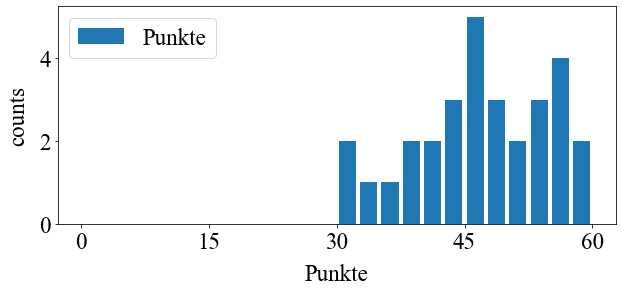

In [65]:
reslist = np.loadtxt('/Users/dominik/Documents/01_Uni/Tutorium23AnalytischeMechanik/Blätter/Klausur/Resultate/Results.txt')


# KLausur
bins = np.linspace(0, 60, 25)
ticks = np.linspace(0,60,5)
plt.hist(reslist, bins,histtype = 'bar',rwidth = 0.8 ,label=['Punkte'] )
#plt.hist([error1], bins,histtype = 'bar',rwidth = 0.8 ,label=['gCCE2'] )
#plt.hist(error, bins,histtype = 'bar',rwidth = 0.9 ,label=['gCCE0','gCCE2'] )
plt.legend(loc='upper left')

plt.xlabel("Punkte",labelpad=10)
plt.ylabel("counts",labelpad=10)
#plt.xticks([0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6])#,[ '0.95', '0.96','0.97','0.98','0.99','0.997'],rotation=-50,ha="left")
plt.xticks(ticks)

plt.rcParams["figure.figsize"] = (10,4)
plt.rcParams.update({'font.size': 23})
#ax.tick_params(axis='y', which='major', pad=-1)
plt.rcParams.update({'font.family':'Times New Roman'})
#plt.savefig("benchmarkC13-gcce2.pdf",transparent=True)

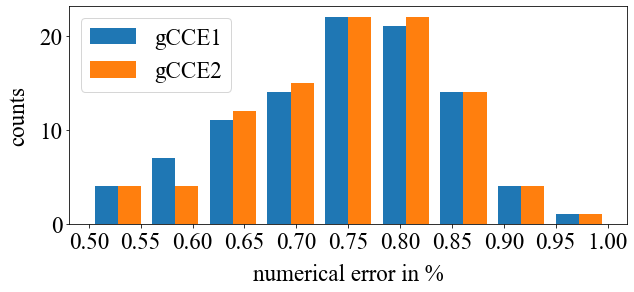

In [56]:
#histog, xedge, yedge = np.histogram(error, bins='auto')
bins = np.linspace(0.5, 1, 10)
ticks = np.linspace(0.5,1,11)
plt.hist([gCCE1l,gCCE2l], bins,histtype = 'bar',rwidth = 0.8 ,label=['gCCE1','gCCE2'] )
#plt.hist([error1], bins,histtype = 'bar',rwidth = 0.8 ,label=['gCCE2'] )
#plt.hist(error, bins,histtype = 'bar',rwidth = 0.9 ,label=['gCCE0','gCCE2'] )
plt.legend(loc='upper left')

plt.xlabel("numerical error in %",labelpad=10)
plt.ylabel("counts",labelpad=10)
#plt.xticks([0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6])#,[ '0.95', '0.96','0.97','0.98','0.99','0.997'],rotation=-50,ha="left")
plt.xticks(ticks)

plt.rcParams["figure.figsize"] = (10,4)
plt.rcParams.update({'font.size': 23})
#ax.tick_params(axis='y', which='major', pad=-1)
plt.rcParams.update({'font.family':'Times New Roman'})
plt.savefig("benchmarkC13-gcce2.pdf",transparent=True)

# rotate the axes and update
#for angle in range(0, 360):
#ax.view_init(25, 335)
#ax.view_init(25,-25)

res*100